# Техническое задание

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/13K24GVmATfSxGF0K0LcWFHBiLxJRuRyN?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Датафрейм информации о звонках `Headliner`](https://drive.google.com/file/d/1-86JPhdac5Y-YIggqYWVh9rFCDoe8Uej/view?usp=sharing)
*   [`Headliner_new_df.pkl` Датафрейм информации о новых звонках `Headliner`](https://drive.google.com/file/d/1WpncuGrBxzsNMy01ayAMlvHOmwT1NSbw/view?usp=sharing)
*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/1-GPfv4l-unOC8z903Fk326KywiNXkvCd/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-GPfv4l-unOC8z903Fk326KywiNXkvCd/view?usp=sharing)
*   [`Headliner_transcriptions_df.pkl` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1-6nvHviEZcJhQN_5ayJHWi915VZSaH85/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации записей новых звонков `Headliner`](https://drive.google.com/file/d/1-6T98ZkPLO5RIJ6tjkiqRvKyxJ3T495a/view?usp=sharing)
*   [`Headliner_work_df.pkl` Датафрейм информации о звонках `Headliner`, где есть файл записи звонка](https://drive.google.com/file/d/1-JLf5vKmdtEBOOPQANrZnXwcrev0Cstr/view?usp=sharing)
*   [`Headliner_new_work_df.pkl` Датафрейм информации о новых звонках `Headliner`, где есть файл записи звонка](https://drive.google.com/file/d/1-QbKNl8Qh1bIJM2Gl8JBIB4dHp93_uae/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Датафрейм информации о целевых звонках `Headliner`, где есть файл записи звонка](https://drive.google.com/file/d/1ri_RtFon5PbgF6RGw3Mq-dqbLaZ3CpuT/view?usp=sharing)
*   [`Headliner_targets_train_df.pkl` Датафрейм информации о целевых звонках `Headliner` для обучения нейронных сетей](https://drive.google.com/file/d/1-3jHcIqfLdtLK1JbtjeVeAINiBkGa497/view?usp=sharing)
*   [`Headliner_targets_test_df.pkl` Датафрейм информации о целевых звонках `Headliner` для тестирования нейронных сетей](https://drive.google.com/file/d/1-5QEXW_-R88uCLCX-MojTy4bDOPm7bI6/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Датафрейм информации о нецелевых звонках `Headliner`, где есть файл записи звонка](https://drive.google.com/file/d/1-2gc1pzSrRk87SFrw0Ni8OrLTI1i8EH4/view?usp=sharing)
*   [`Headliner_not_targets_train_df.pkl` Датафрейм информации о нецелевых звонках `Headliner` для обучения нейронных сетей](https://drive.google.com/file/d/1-7083vZXirMr5yDGZMOcziXfA6L-LW3i/view?usp=sharing)
*   [`Headliner_not_targets_test_df.pkl` Датафрейм информации о нецелевых звонках `Headliner` для тестирования нейронных сетей](https://drive.google.com/file/d/1-843WX57uTyBhar823GxIWZaB9uVgW1r/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Датафрейм информации о звонках `Primavera`](https://drive.google.com/file/d/16vejQ6aIN1VprZ8RuaG0Dx4SSj3eebbP/view?usp=sharing)
*   [`Primavera_new_df.pkl` Датафрейм информации о новых звонках `Primavera`](https://drive.google.com/file/d/1s4WRZaBMYUkhqpAB92ED2m-Rb_YjzMwz/view?usp=sharing)
*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-VjUxidRzurhVR5xIWagp58OVUZseU6X/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-1zEf6soPhSUZERZZ5voTe6qpX2snj7z/view?usp=sharing)
*   [`Primavera_transcriptions_df.pkl` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-95iMVyyHCY3TLw7MjTuvhKged0F7Fvk/view?usp=sharing)
*   [`Primavera_transcriptions_match_df.pkl` Файлы транскрибации записей звонков `Primavera`, о которых есть информация](https://drive.google.com/file/d/1GIe0cDfbTuvqE92TDxbZxlPZ-n9EkWIh/view?usp=sharing)
*   [`Primavera_transcriptions_not_match_df.pkl` Файлы транскрибации записей звонков `Primavera`, о которых нет информации](https://drive.google.com/file/d/1-3OX6DXIzRQ-qSX3_B7BQMzVx9YIdUtF/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации записей новых звонков `Primavera`](https://drive.google.com/file/d/1QhdQku1pQ3Z4ai_UYwq40fUhTi2m_0rr/view?usp=sharing)
*   [`Primavera_work_df.pkl` Датафрейм информации о звонках `Primavera`, где есть файл записи звонка](https://drive.google.com/file/d/1-U0xbyb6bYf2rZu-lcxFPk_pQBUGKKoB/view?usp=sharing)
*   [`Primavera_new_work_df.pkl` Датафрейм информации о новых звонках `Primavera`, где есть файл записи звонка](https://drive.google.com/file/d/1-e92lhkicDl38Z-kFom7ib8N_cAnM-Dn/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Датафрейм информации о целевых звонках `Primavera`, где есть файл записи звонка](https://drive.google.com/file/d/1-8XjyRoDg0UKCuwnBoV2uqj_l6gWgh9d/view?usp=sharing)
*   [`Primavera_targets_train_df.pkl` Датафрейм информации о целевых звонках `Primavera` для обучения нейронных сетей](https://drive.google.com/file/d/1-B8R3mOXemw7e53liPn2C4ku4W95QVYh/view?usp=sharing)
*   [`Primavera_targets_test_df.pkl` Датафрейм информации о целевых звонках `Primavera` для тестирования нейронных сетей](https://drive.google.com/file/d/1-HaVWznzdnaYdS4h9bZwIKCiCLDiOcrC/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Датафрейм информации о нецелевых звонках `Primavera`, где есть файл записи звонка](https://drive.google.com/file/d/1-JoKuKGXyuhhZ_hgnEO6M78aGO2BZvpN/view?usp=sharing)
*   [`Primavera_not_targets_train_df.pkl` Датафрейм информации о нецелевых звонках `Primavera` для обучения нейронных сетей](https://drive.google.com/file/d/1-MCt5D5Y29xwavGqcQ7gorI4l09i93T8/view?usp=sharing)
*   [`Primavera_not_targets_test_df.pkl` Датафрейм информации о нецелевых звонках `Primavera` для тестирования нейронных сетей](https://drive.google.com/file/d/1-_uoKghjLurvwOuTFKATsj0wwPHDxk92/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Датафрейм информации о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-0RLElus9y3f3xJ7PovfTDFoLh_2HnPK/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Датафрейм информации о звонках `Paveletskaya`](https://drive.google.com/file/d/1-3V7Dyjq-N3m0dc-7FztObG4PeRrMfHl/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Датафрейм информации о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1--BvnzCVq98MKO1YkVJxjinEMbSvmGc4/view?usp=sharing)
*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-YLnfTLpXNuaVeD9suFaB1_Z1GEaIlfS/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2JNbsm1m5cEVegIT9YtygT3-eEAfu-Q/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df.pkl` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-AEMld0GLwY8F9eb8Zl-i4JR0iMriDG3/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_match_df.pkl` Файлы транскрибации записей звонков `Paveletskaya_city`, о которых есть информация](https://drive.google.com/file/d/1-4YGKKq9RayDGHm08KUOl4FpO0C3nVEc/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_not_match_df.pkl` Файлы транскрибации записей звонков `Paveletskaya_city`, о которых нет информации](https://drive.google.com/file/d/1-7wTJs1QSWnpD1SOOHbvQ_BIFq1UjO8s/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-3G7vPPzDaP6Tgx4L7SdZ6BORidTQptv/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Датафрейм информации о звонках `Paveletskaya_city`, где есть файл записи звонка](https://drive.google.com/file/d/1-pDWkrUGFp0weZUwXMB1txfCtU63s9im/view?usp=sharing)
*   [`Paveletskaya_city_new_work_df.pkl` Датафрейм информации о новых звонках `Paveletskaya_city`, где есть файл записи звонка](https://drive.google.com/file/d/1-hDrQl2syW8QEUwaBfommvfHr6lu4fGD/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Датафрейм информации о целевых звонках `Paveletskaya_city`, где есть файл записи звонка](https://drive.google.com/file/d/1-c7IBJp9gX1lT6RLpczFxzIIkm4Sp9DL/view?usp=sharing)
*   [`Paveletskaya_city_targets_train_df.pkl` Датафрейм информации о целевых звонках `Paveletskaya_city` для обучения нейронных сетей](https://drive.google.com/file/d/1-e1BzIcmUwstL-1hGVenX3TDl9ns0j2c/view?usp=sharing)
*   [`Paveletskaya_city_targets_test_df.pkl` Датафрейм информации о целевых звонках `Paveletskaya_city` для тестирования нейронных сетей](https://drive.google.com/file/d/1-ew23-ZodHq7m9IJbTS7_H6jecyBMB38/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Датафрейм информации о нецелевых звонках `Paveletskaya_city`, где есть файл записи звонка](https://drive.google.com/file/d/1-k0WrNkbGyNx73DGC7ppslRpzgkSVrVV/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_train_df.pkl` Датафрейм информации о нецелевых звонках `Paveletskaya_city` для обучения нейронных сетей](https://drive.google.com/file/d/1-nwhGJiO6bDj3LvtvHW7S4QoElzYZ3UX/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_test_df.pkl` Датафрейм информации о нецелевых звонках `Paveletskaya_city` для тестирования нейронных сетей](https://drive.google.com/file/d/1-ptYsUtFVnNVjnjERcz_DOdFZ5m2mbGv/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Полный датафрейм информации о звонках](https://drive.google.com/file/d/18LdqvkasD_NMNbB025jQDyWmuTWfXrin/view?usp=sharing)
*   [`all_df.pkl` Сводный датафрейм информации о звонках](https://drive.google.com/file/d/1A1acKPGl-xRX6uRwGvhZYn2yXULuini5/view?usp=sharing)
*   [`all_new_df.pkl` Сводный датафрейм информации о новых звонках](https://drive.google.com/file/d/1mRhYnfyVeZcD2N_HNFb1CjNgqfiJQSTC/view?usp=sharing)
*   [`total_work_df.pkl` Полный датафрейм информации о звонках, где есть файл записи звонка](https://drive.google.com/file/d/1-0vMU64oquKeytJkLW_yCCdOkqMZOmkK/view?usp=sharing)
*   [`total_targets_df.pkl` Полный датафрейм информации о целевых звонках, где есть файл записи звонка](https://drive.google.com/file/d/1-2jShLR14ZYi_aavqwjPFDIz-z2UFGay/view?usp=sharing)
*   [`total_targets_train_df.pkl` Датафрейм информации о целевых звонках для обучения нейронных сетей](https://drive.google.com/file/d/1-rCrUkVH2K75WUTfqpc0BZyXHsoiasA2/view?usp=sharing)
*   [`total_targets_test_df.pkl` Датафрейм информации о целевых звонках для тестирования нейронных сетей](https://drive.google.com/file/d/1-w7foI_S1B1PhWfkEHJS0lm0AxqhSNV5/view?usp=sharing)
*   [`total_not_targets_df.pkl` Полный датафрейм информации о нецелевых звонках, где есть файл записи звонка](https://drive.google.com/file/d/1-APuLhb6xj3baNmB6QAzpF1IHcpOvJ29/view?usp=sharing)
*   [`total_not_targets_train_df.pkl` Датафрейм информации о нецелевых звонках для обучения нейронных сетей](https://drive.google.com/file/d/1-weQegetJyIOU2DArkCq7GU_qS3eNVhF/view?usp=sharing)
*   [`total_not_targets_test_df.pkl` Датафрейм информации о нецелевых звонках для тестирования нейронных сетей](https://drive.google.com/file/d/10-zWilfo-cQLTQ3Pvl5Wqxy3mPrauCKB/view?usp=sharing)
*   [`rookie_total_df.csv` Полный датафрейм информации о звонках для новичков](https://drive.google.com/file/d/1pNeeVqzjaLI5M56E9NQ5OXNdzanLiWn8/view?usp=sharing)

## Датафреймы статистик

*   [`calls_duration_statistics_df.pkl` Описательные статистики длительности звонков](https://drive.google.com/file/d/1xxBpajBj30eK3kV9mlBVYs7o_1Hr5yLJ/view?usp=sharing)
*   [`text_length_statistics_df.pkl` Описательные статистики длин текстов транскрибации звонков](https://drive.google.com/file/d/1-6JF86eqrNnLjHhh1lDTOkRr9Nt92Zsw/view?usp=sharing)

# [Модели](https://drive.google.com/drive/folders/1Dby4Pv_QNoAMt_3gkFYZ2i4sJ1pIC-2K?usp=sharing)

*   [`2023.10.15_text_model.keras`](https://drive.google.com/file/d/1EaA53dXa4ZU2DZLB2su4bf8TOPTdM_CK/view?usp=sharing)
*   [`2023.10.24_text_model.keras`](https://drive.google.com/file/d/10313ERrAk1yjZptVSN7QFaoBXFs9wh96/view?usp=sharing)
*   [`2023.10.25_text_model.keras`](https://drive.google.com/file/d/1-8ixiq6D5lH13fJo5bnzazEYB_X0OQ85/view?usp=sharing)
*   [`2023.10.24_Headliner_text_model.keras`](https://drive.google.com/file/d/1035zR2qsI7vOYF88bKNVTSp7wQ7NGIBd/view?usp=sharing)
*   [`2023.10.25_Headliner_text_model.keras`](https://drive.google.com/file/d/1-J4FU3XKGWOgWs0qSrcktgsLaDds3oQc/view?usp=sharing)
*   [`2023.10.24_Primavera_text_model.keras`](https://drive.google.com/file/d/104TNzLgOoQKlx0DOgifWT2PNcHmfET3R/view?usp=sharing)
*   [`2023.10.25_Primavera_text_model.keras`](https://drive.google.com/file/d/1-OgXK6gtJkbAoeIeUS48-WTvAjAs2DxH/view?usp=sharing)
*   [`2023.10.24_Paveletskaya_city_text_model.keras`](https://drive.google.com/file/d/108OrxOzBfyTWaXBdLJ33sJvKy3JMikQS/view?usp=sharing)
*   [`2023.10.25_Paveletskaya_city_text_model.keras`](https://drive.google.com/file/d/1-OjCiQBtnMSeKTwlXMxfCARTqIsBb_t1/view?usp=sharing)

In [529]:
#  @title Загрузка результатов тестирования моделей
model_path = '/content/drive/MyDrive/media108.ru/Модели/'
with open(model_path + '2023.10.15_text_model_results.pkl', 'rb') as f:
  text_model_results_2023_10_15 = pkl.load(f)
with open(model_path + '2023.10.24_text_model_results.pkl', 'rb') as f:
  text_model_results_2023_10_24 = pkl.load(f)
with open(model_path + '2023.10.25_text_model_results.pkl', 'rb') as f:
  text_model_results_2023_10_25 = pkl.load(f)
with open(model_path + '2023.10.24_Headliner_text_model_results.pkl', 'rb') as f:
  Headliner_text_model_2023_10_24 = pkl.load(f)
with open(model_path + '2023.10.25_Headliner_text_model_results.pkl', 'rb') as f:
  Headliner_text_model_2023_10_25 = pkl.load(f)
with open(model_path + '2023.10.24_Primavera_text_model_results.pkl', 'rb') as f:
  Primavera_text_model_2023_10_24 = pkl.load(f)
with open(model_path + '2023.10.25_Primavera_text_model_results.pkl', 'rb') as f:
  Primavera_text_model_2023_10_25 = pkl.load(f)
with open(model_path + '2023.10.24_Paveletskaya_city_text_model_results.pkl', 'rb') as f:
  Paveletskaya_city_text_model_2023_10_24 = pkl.load(f)
with open(model_path + '2023.10.25_Paveletskaya_city_text_model_results.pkl', 'rb') as f:
  Paveletskaya_city_text_model_2023_10_25 = pkl.load(f)
pd.DataFrame([text_model_results_2023_10_15,
              text_model_results_2023_10_24,
              text_model_results_2023_10_25,
              Headliner_text_model_2023_10_24,
              Headliner_text_model_2023_10_25,
              Primavera_text_model_2023_10_24,
              Primavera_text_model_2023_10_25,
              Paveletskaya_city_text_model_2023_10_24,
              Paveletskaya_city_text_model_2023_10_25])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.15_text_model.keras,0.975610,0.964163,0.9970,0.847782,0.778790,0.840206,0.804264,0.805112,0.676211,0.878351,0.800647
1,2023.10.24_text_model.keras,0.933333,0.975502,0.8346,0.715217,0.890459,0.518182,0.941176,0.730570,0.802281,0.834395,0.876923
2,2023.10.25_text_model.keras,0.977778,0.877731,0.9974,0.828261,0.673145,0.754545,0.772059,0.829016,0.634981,0.878981,0.538462
3,2023.10.24_Headliner_text_model.keras,0.617344,0.948135,0.8760,0.526087,0.939929,0.618182,0.943015,0.445596,0.912548,0.560510,0.956923
4,2023.10.25_Headliner_text_model.keras,0.657995,0.777312,0.9984,0.573913,0.678445,0.663636,0.716912,0.523316,0.752852,0.573248,0.553846
5,2023.10.24_Primavera_text_model.keras,0.839566,0.868903,0.8005,0.747826,0.830389,0.745455,0.838235,0.730570,0.806084,0.770701,0.836923
6,2023.10.25_Primavera_text_model.keras,0.932249,0.571618,0.9976,0.891304,0.446113,0.927273,0.316176,0.880829,0.604563,0.878981,0.535385
7,2023.10.24_Paveletskaya_city_text_model.keras,0.670461,0.930700,0.8372,0.591304,0.899293,0.445455,0.930147,0.544041,0.847909,0.751592,0.889231
8,2023.10.25_Paveletskaya_city_text_model.keras,0.910569,0.820349,0.9977,0.832609,0.739399,0.654545,0.761029,0.870466,0.631179,0.910828,0.790769


# 7 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


In [3]:
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 85.1 MB/s eta 0:00:00


In [4]:
import autokeras as ak

Using TensorFlow backend


In [5]:
# Установка terra-ai-datasets-framework
%%capture
!pip install terra-ai-datasets-framework

## Библиотеки и переменные

In [6]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

from sklearn.model_selection  import train_test_split
from terra_ai_datasets.create import TextClassification

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

df_path                = my_drv_path + 'media108.ru/Датафреймы/'                                          # путь к папке для датафреймов
table_path             = my_drv_path + 'media108.ru/Таблицы/'                                             # путь к папке для таблиц
model_path             = my_drv_path + 'media108.ru/Модели/'                                              # путь к папке для моделей нейронных сетей
all_dataset_path       = my_drv_path + 'media108.ru/Датасет/'                                             # путь к папке всего датасета в целом
dataset_path           = my_drv_path + 'media108.ru/Датасет/Записи звонков/'                              # путь к записям звонков
new_dataset_path       = my_drv_path + 'media108.ru/Датасет/Новые записи звонков/'                        # путь к новым записям звонков
transcription_path     = my_drv_path + 'media108.ru/Датасет/Whisper-транскрибация записей звонков/'       # путь к папке транскрибации новых записей звонков
new_transcription_path = my_drv_path + 'media108.ru/Датасет/Whisper-транскрибация новых записей звонков/' # путь к папке транскрибации новых записей звонков

## Создание рабочих датафреймов

### Загрузка датафреймов проектов

#### Оригинальный датасет

##### Информация о звонках

In [ ]:
# Загрузка Headliner_df
with open(df_path + 'Headliner_df.pkl', 'rb') as f:
  Headliner_df = pkl.load(f)

In [ ]:
# Загрузка Headliner_work_df
with open(df_path + 'Headliner_work_df.pkl', 'rb') as f:
  Headliner_work_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_df
with open(df_path + 'Primavera_df.pkl', 'rb') as f:
  Primavera_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_work_df
with open(df_path + 'Primavera_work_df.pkl', 'rb') as f:
  Primavera_work_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_df
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_df
with open(df_path + 'Paveletskaya_df.pkl', 'rb') as f:
  Paveletskaya_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_work_df
with open(df_path + 'Paveletskaya_city_work_df.pkl', 'rb') as f:
  Paveletskaya_city_work_df = pkl.load(f)

##### Файлы записей звонков

In [ ]:
# Загрузка Headliner_calls_df
with open(df_path + 'Headliner_calls_df.pkl', 'rb') as f:
  Headliner_calls_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_calls_df
with open(df_path + 'Primavera_calls_df.pkl', 'rb') as f:
  Primavera_calls_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_calls_df
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_calls_df = pkl.load(f)

##### Файлы транскрибации записей звонков

In [ ]:
# Загрузка Headliner_transcriptions_df
with open(df_path + 'Headliner_transcriptions_df.pkl', 'rb') as f:
  Headliner_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_transcriptions_df
with open(df_path + 'Primavera_transcriptions_df.pkl', 'rb') as f:
  Primavera_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_transcriptions_df
with open(df_path + 'Paveletskaya_city_transcriptions_df.pkl', 'rb') as f:
  Paveletskaya_city_transcriptions_df = pkl.load(f)

#### Дополнительный датасет

##### Информация о звонках

In [ ]:
# Загрузка Headliner_new_df
with open(df_path + 'Headliner_new_df.pkl', 'rb') as f:
  Headliner_new_df = pkl.load(f)

In [ ]:
# Загрузка Headliner_new_work_df
with open(df_path + 'Headliner_new_work_df.pkl', 'rb') as f:
  Headliner_new_work_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_df
with open(df_path + 'Primavera_new_df.pkl', 'rb') as f:
  Primavera_new_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_work_df
with open(df_path + 'Primavera_new_work_df.pkl', 'rb') as f:
  Primavera_new_work_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_df
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_work_df
with open(df_path + 'Paveletskaya_city_new_work_df.pkl', 'rb') as f:
  Paveletskaya_city_new_work_df = pkl.load(f)

##### Файлы записей звонков

In [ ]:
# Загрузка Headliner_new_calls_df
with open(df_path + 'Headliner_new_calls_df.pkl', 'rb') as f:
  Headliner_new_calls_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_calls_df
with open(df_path + 'Primavera_new_calls_df.pkl', 'rb') as f:
  Primavera_new_calls_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_calls_df
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_new_calls_df = pkl.load(f)

##### Файлы транскрибации записей звонков

In [ ]:
# Загрузка Headliner_new_transcriptions_df
with open(df_path + 'Headliner_new_transcriptions_df.pkl', 'rb') as f:
  Headliner_new_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_transcriptions_df
with open(df_path + 'Primavera_new_transcriptions_df.pkl', 'rb') as f:
  Primavera_new_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_transcriptions_df
with open(df_path + 'Paveletskaya_city_new_transcriptions_df.pkl', 'rb') as f:
  Paveletskaya_city_new_transcriptions_df = pkl.load(f)

### Сохранение датафреймов проектов

#### Оригинальный датасет

##### Информация о звонках

In [ ]:
# Сохраняем Headliner_df в файл
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

In [ ]:
# Сохраняем Primavera_df в файл
with open(df_path + 'Primavera_df.pkl', 'wb') as f:
  pkl.dump(Primavera_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_df в файл
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

In [ ]:
# Сохраняем Paveletskaya_df в файл
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

##### Файлы записей звонков

In [ ]:
# Сохраняем Headliner_calls_df в файл
with open(df_path + 'Headliner_calls_df.pkl', 'wb') as f:
  pkl.dump(Headliner_calls_df, f)

In [ ]:
# Сохраняем Primavera_calls_df в файл
with open(df_path + 'Primavera_calls_df.pkl', 'wb') as f:
  pkl.dump(Primavera_calls_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_calls_df в файл
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_calls_df, f)

##### Файлы транскрибации записей звонков

In [ ]:
# Сохраняем Headliner_transcriptions_df в файл
with open(df_path + 'Headliner_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Headliner_transcriptions_df, f)

In [ ]:
# Сохраняем Primavera_transcriptions_df в файл
with open(df_path + 'Primavera_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Primavera_transcriptions_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_df в файл
with open(df_path + 'Paveletskaya_city_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_df, f)

#### Дополнительный датасет

##### Информация о звонках

In [ ]:
# Сохраняем Headliner_new_df в файл
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

In [ ]:
# Сохраняем Primavera_new_df в файл
with open(df_path + 'Primavera_new_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_df в файл
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)

##### Файлы записей звонков

In [ ]:
# Сохраняем Headliner_new_calls_df в файл
with open(df_path + 'Headliner_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_calls_df, f)

In [ ]:
# Сохраняем Primavera_new_calls_df в файл
with open(df_path + 'Primavera_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_calls_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_calls_df в файл
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_calls_df, f)

##### Файлы транскрибации записей звонков

In [ ]:
# Сохраняем Headliner_new_transcriptions_df в файл
with open(df_path + 'Headliner_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_transcriptions_df, f)

In [ ]:
# Сохраняем Primavera_new_transcriptions_df в файл
with open(df_path + 'Primavera_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_transcriptions_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_transcriptions_df в файл
with open(df_path + 'Paveletskaya_city_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_transcriptions_df, f)

##### Сводный датафрейм

In [ ]:
# Сохраняем all_new_df в файл
with open(df_path + 'all_new_df.pkl', 'wb') as f:
  pkl.dump(all_new_df, f)

### Загрузка и сохранение сводных датафреймов

##### `all_df`

In [ ]:
# Загрузка all_df из pkl
with open(df_path + 'all_df.pkl', 'rb') as f:
  all_df = pkl.load(f)

In [ ]:
# Сохраняем all_df в pkl
with open(df_path + 'all_df.pkl', 'wb') as f:
  pkl.dump(all_df, f)

##### `all_new_df`

In [ ]:
# Загрузка all_new_df из pkl
with open(df_path + 'all_new_df.pkl', 'rb') as f:
  all_new_df = pkl.load(f)

In [ ]:
# Сохраняем all_new_df в pkl
with open(df_path + 'all_new_df.pkl', 'wb') as f:
  pkl.dump(all_new_df, f)

##### `total_df`

In [ ]:
# Загрузка total_df из pkl
with open(df_path + 'total_df.pkl', 'rb') as f:
  total_df = pkl.load(f)

In [ ]:
# Сохраняем total_df в pkl
with open(df_path + 'total_df.pkl', 'wb') as f:
  pkl.dump(total_df, f)

### Согласование датафреймов и создание выборок

#### Headliner

##### `Headliner_calls_df`

###### Загрузка

In [ ]:
# Загрузка Headliner_calls_df
with open(df_path + 'Headliner_calls_df.pkl', 'rb') as f:
  Headliner_calls_df = pkl.load(f)

In [ ]:
# Загрузка Headliner_new_calls_df
with open(df_path + 'Headliner_new_calls_df.pkl', 'rb') as f:
  Headliner_new_calls_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Headliner_calls_df и Headliner_new_calls_df
print(Headliner_calls_df.shape)
print(Headliner_new_calls_df.shape)

(2045, 5)
(1226, 5)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Headliner_calls_df vs Headliner_new_calls_df
for column in Headliner_calls_df.columns.tolist():
  if column not in Headliner_new_calls_df.columns.tolist():
    print(f"Headliner_calls_df['{column}'], тип данных: {Headliner_calls_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_calls_df vs Headliner_calls_df
for column in Headliner_new_calls_df.columns.tolist():
  if column not in Headliner_calls_df.columns.tolist():
    print(f"Headliner_new_calls_df['{column}'], тип данных: {Headliner_new_calls_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Headliner_calls_df
Headliner_calls_df.count()

Дата и время                   2045
Номер абонента                 2045
Номер сотрудника               2045
Идентификатор сессии звонка    2045
Файл записи звонка             2045
dtype: int64

In [ ]:
# Количество непустых записей в Headliner_new_calls_df
Headliner_new_calls_df.count()

Дата и время                   1226
Номер абонента                 1226
Номер сотрудника               1226
Идентификатор сессии звонка    1226
Файл записи звонка             1226
dtype: int64

###### Типы данных

In [ ]:
Headliner_calls_df_dtypes = Headliner_calls_df.dtypes.to_dict()
Headliner_new_calls_df_dtypes = Headliner_new_calls_df.dtypes.to_dict()
for key in Headliner_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Headliner_calls_df_dtypes[key]):15s} {Headliner_new_calls_df_dtypes[key]}")

Дата и время                                  object          datetime64[ns]
Номер абонента                                object          int64
Номер сотрудника                              object          int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


In [ ]:
# Приводим тип данных столбца 'Дата и время' в Headliner_calls_df
Headliner_calls_df['Дата и время'] = pd.to_datetime(Headliner_calls_df['Дата и время'])

In [ ]:
# Приводим тип данных столбца 'Номер абонента' в Headliner_calls_df
Headliner_calls_df = Headliner_calls_df.astype({'Номер абонента': int})

In [ ]:
# Приводим тип данных столбца 'Номер сотрудника'
Headliner_calls_df = Headliner_calls_df.astype({'Номер сотрудника': int})

In [ ]:
Headliner_calls_df_dtypes = Headliner_calls_df.dtypes.to_dict()
Headliner_new_calls_df_dtypes = Headliner_new_calls_df.dtypes.to_dict()
for key in Headliner_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Headliner_calls_df_dtypes[key]):15s} {Headliner_new_calls_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


###### Сохранение

In [ ]:
# Сохраняем Headliner_calls_df в pkl
with open(df_path + 'Headliner_calls_df.pkl', 'wb') as f:
  pkl.dump(Headliner_calls_df, f)

In [ ]:
# Сохраняем Headliner_new_calls_df в pkl
with open(df_path + 'Headliner_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_calls_df, f)

##### `Headliner_transcriptions_df`

###### Загрузка

In [ ]:
# Загрузка Headliner_transcriptions_df
with open(df_path + 'Headliner_transcriptions_df.pkl', 'rb') as f:
  Headliner_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Headliner_new_transcriptions_df
with open(df_path + 'Headliner_new_transcriptions_df.pkl', 'rb') as f:
  Headliner_new_transcriptions_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Headliner_transcriptions_df и Headliner_new_transcriptions_df
print(Headliner_transcriptions_df.shape)
print(Headliner_new_transcriptions_df.shape)

(2045, 6)
(1226, 6)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Headliner_transcriptions_df vs Headliner_new_transcriptions_df
for column in Headliner_transcriptions_df.columns.tolist():
  if column not in Headliner_new_transcriptions_df.columns.tolist():
    print(f"Headliner_transcriptions_df['{column}'], тип данных: {Headliner_transcriptions_df[column].dtypes}")

Headliner_transcriptions_df['Транскрибатор'], тип данных: object
Headliner_transcriptions_df['Файл транскрибации звонка'], тип данных: object


In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_transcriptions_df vs Headliner_transcriptions_df
for column in Headliner_new_transcriptions_df.columns.tolist():
  if column not in Headliner_transcriptions_df.columns.tolist():
    print(f"Headliner_new_transcriptions_df['{column}'], тип данных: {Headliner_new_transcriptions_df[column].dtypes}")

Headliner_new_transcriptions_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Headliner_new_transcriptions_df['Текст whisper-транскрибации записи звонка'], тип данных: object


In [ ]:
# Удаляем столбец 'Транскрибатор' в Headliner_transcriptions_df
Headliner_transcriptions_df = Headliner_transcriptions_df.drop(columns=['Транскрибатор'])

In [ ]:
# Переименовываем столбец 'Файл транскрибации звонка' в 'Файл whisper-транскрибации записи звонка' в Headliner_transcriptions_df
Headliner_transcriptions_df = Headliner_transcriptions_df.rename(columns={'Файл транскрибации звонка': 'Файл whisper-транскрибации записи звонка'})

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка']
Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Расшифровки_Записи звонков_хедлайнер/2023-05-08_16-14-10.247769_from_74955199580_to_74997552563_session_2918538922_talk_whisper_large.txt
1    Расшифровки_Записи звонков_хедлайнер/2023-05-09_11-53-48.291185_from_79910665524_to_74997552563_session_2919161802_talk_whisper_large.txt
2        Расшифровки_Записи звонков_хедлайнер/2023-05-09_17-51-30.193682_from_79670165153_to_0188880_session_2919520238_talk_whisper_large.txt
3    Расшифровки_Записи звонков_хедлайнер/2023-05-09_18-34-04.371381_from_79274431546_to_74997552563_session_2919550530_talk_whisper_large.txt
4    Расшифровки_Записи звонков_хедлайнер/2023-05-09_20-19-21.050197_from_79274432048_to_74997552563_session_2919615074_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем к файлам относительные пути в Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка']
Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка'] = Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка'].apply(lambda x: 'Whisper-транскрибация записей звонков/' + x)

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка']
Headliner_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_хедлайнер/2023-05-08_16-14-10.247769_from_74955199580_to_74997552563_session_2918538922_talk_whisper_large.txt
1    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_хедлайнер/2023-05-09_11-53-48.291185_from_79910665524_to_74997552563_session_2919161802_talk_whisper_large.txt
2        Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_хедлайнер/2023-05-09_17-51-30.193682_from_79670165153_to_0188880_session_2919520238_talk_whisper_large.txt
3    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_хедлайнер/2023-05-09_18-34-04.371381_from_79274431546_to_74997552563_session_2919550530_talk_whisper_large.txt
4    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_хедлайнер/2023-05-09_20-19-21.050197_from_79274432048_to_74997552563_session_2919615074_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем столбец 'Текст whisper-транскрибации записи звонка' в Headliner_transcriptions_df
Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка'] = 'нет текста'

In [ ]:
# Добавляем тексты whisper-транскрибации записей звонков в Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка']
for row in range(Headliner_transcriptions_df.shape[0]):
  with open(all_dataset_path + Headliner_transcriptions_df.loc[row, ['Файл whisper-транскрибации записи звонка']].values[0], 'rb') as f:
    contents = f.read()
  Headliner_transcriptions_df.loc[row, ['Текст whisper-транскрибации записи звонка']] = contents.decode('utf-16').strip()

In [ ]:
# Верифицируем количество текстов whisper-транскрибации записей звонков в Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка']
Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка'][Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count()

0

In [ ]:
# Смотрим тексты whisper-транскрибации записей звонков в Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка']
Headliner_transcriptions_df['Текст whisper-транскрибации записи звонка'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. У

In [ ]:
# Смотрим несовпадающие столбцы Headliner_transcriptions_df vs Headliner_new_transcriptions_df
for column in Headliner_transcriptions_df.columns.tolist():
  if column not in Headliner_new_transcriptions_df.columns.tolist():
    print(f"Headliner_transcriptions_df['{column}'], тип данных: {Headliner_transcriptions_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_transcriptions_df vs Headliner_transcriptions_df
for column in Headliner_new_transcriptions_df.columns.tolist():
  if column not in Headliner_transcriptions_df.columns.tolist():
    print(f"Headliner_new_transcriptions_df['{column}'], тип данных: {Headliner_new_transcriptions_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Headliner_transcriptions_df
Headliner_transcriptions_df.count()

Дата и время                                 2045
Номер абонента                               2045
Номер сотрудника                             2045
Идентификатор сессии звонка                  2045
Файл whisper-транскрибации записи звонка     2045
Текст whisper-транскрибации записи звонка    2045
dtype: int64

In [ ]:
# Количество непустых записей в Headliner_new_transcriptions_df
Headliner_new_transcriptions_df.count()

Дата и время                                 1226
Номер абонента                               1226
Номер сотрудника                             1226
Идентификатор сессии звонка                  1226
Файл whisper-транскрибации записи звонка     1226
Текст whisper-транскрибации записи звонка    1226
dtype: int64

###### Типы данных

In [ ]:
Headliner_transcriptions_df_dtypes = Headliner_transcriptions_df.dtypes.to_dict()
Headliner_new_transcriptions_df_dtypes = Headliner_new_transcriptions_df.dtypes.to_dict()
for key in Headliner_transcriptions_df_dtypes.keys():
  print(f"{key:45s} {str(Headliner_transcriptions_df_dtypes[key]):15s} {Headliner_new_transcriptions_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл whisper-транскрибации записи звонка      object          object
Текст whisper-транскрибации записи звонка     object          object


###### Сохранение

In [ ]:
# Сохраняем Headliner_transcriptions_df в pkl
with open(df_path + 'Headliner_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Headliner_transcriptions_df, f)

In [ ]:
# Сохраняем Headliner_new_transcriptions_df в pkl
with open(df_path + 'Headliner_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_transcriptions_df, f)

##### `Headliner_df`

###### Загрузка

In [ ]:
# Загрузка Headliner_df
with open(df_path + 'Headliner_df.pkl', 'rb') as f:
  Headliner_df = pkl.load(f)

In [ ]:
# Загрузка Headliner_new_df
with open(df_path + 'Headliner_new_df.pkl', 'rb') as f:
  Headliner_new_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Headliner_df и Headliner_new_df
print(Headliner_df.shape)
print(Headliner_new_df.shape)

(4759, 75)
(1542, 78)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Headliner_df vs Headliner_new_df
for column in Headliner_df.columns.tolist():
  if column not in Headliner_new_df.columns.tolist():
    print(f"Headliner_df['{column}'], тип данных: {Headliner_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_df vs Headliner_df
for column in Headliner_new_df.columns.tolist():
  if column not in Headliner_df.columns.tolist():
    print(f"Headliner_new_df['{column}'], тип данных: {Headliner_new_df[column].dtypes}")

Headliner_new_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Headliner_new_df['Текст whisper-транскрибации записи звонка'], тип данных: object
Headliner_new_df['Класс'], тип данных: object


In [ ]:
# Добавляем столбцы 'Файл whisper-транскрибации записи звонка' и 'Текст whisper-транскрибации записи звонка' в Headliner_df
Headliner_df = Headliner_df.merge(Headliner_transcriptions_df[['Идентификатор сессии звонка',
                                                               'Файл whisper-транскрибации записи звонка',
                                                               'Текст whisper-транскрибации записи звонка']],
                                  how='outer',
                                  on=['Идентификатор сессии звонка'])

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Headliner_df
print(Headliner_df['Файл whisper-транскрибации записи звонка'].count())
print(Headliner_df['Файл whisper-транскрибации записи звонка'].shape[0])

2045
4759


In [ ]:
# Запоняем пустоты в столбце 'Файл whisper-транскрибации записи звонка' значением 'нет файла' в Headliner_df
Headliner_df['Файл whisper-транскрибации записи звонка'] = Headliner_df['Файл whisper-транскрибации записи звонка'].fillna('нет файла')

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Headliner_df
print(Headliner_df['Файл whisper-транскрибации записи звонка'].count())
print(Headliner_df['Файл whisper-транскрибации записи звонка'].shape[0])

4759
4759


In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Headliner_df
print(Headliner_df['Текст whisper-транскрибации записи звонка'].count())
print(Headliner_df['Текст whisper-транскрибации записи звонка'].shape[0])

2045
4759


In [ ]:
# Запоняем пустоты в столбце 'Текст whisper-транскрибации записи звонка' значением 'нет текста' в Headliner_df
Headliner_df['Текст whisper-транскрибации записи звонка'] = Headliner_df['Текст whisper-транскрибации записи звонка'].fillna('нет текста')

In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Headliner_df
print(Headliner_df['Текст whisper-транскрибации записи звонка'].count())
print(Headliner_df['Текст whisper-транскрибации записи звонка'].shape[0])

4759
4759


In [ ]:
# Добавляем столбец 'Класс' в Headliner_df
Headliner_df['Класс'] = 'Нецелевой'

In [ ]:
# Теги целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*|.*первичный целевой.*'
for teg in Headliner_df['Теги'].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки в Headliner_df
Headliner_df.loc[Headliner_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Добавляем столбец 'Проект' в Headliner_df и Headliner_new_df
Headliner_df['Проект'] = 'Headliner'
Headliner_new_df['Проект'] = 'Headliner'

In [ ]:
# Сортируем Headliner_df и Headliner_new_df по столбцу 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.sort_values('Идентификатор сессии звонка')
Headliner_new_df = Headliner_new_df.sort_values('Идентификатор сессии звонка')

In [ ]:
# Индексируем Headliner_df и Headliner_new_df по порядку
Headliner_df.index = range(Headliner_df.shape[0])
Headliner_new_df.index = range(Headliner_new_df.shape[0])

In [ ]:
# Упорядочиваем столбцы в Headliner_df и Headliner_new_df
Headliner_new_df = Headliner_new_df[Headliner_df.columns]

In [ ]:
# Смотрим несовпадающие столбцы Headliner_df vs Headliner_new_df
for column in Headliner_df.columns.tolist():
  if column not in Headliner_new_df.columns.tolist():
    print(f"Headliner_df['{column}'], тип данных: {Headliner_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_df vs Headliner_df
for column in Headliner_new_df.columns.tolist():
  if column not in Headliner_df.columns.tolist():
    print(f"Headliner_new_df['{column}'], тип данных: {Headliner_new_df[column].dtypes}")

In [ ]:
# Размеры Headliner_df и Headliner_new_df
print(Headliner_df.shape)
print(Headliner_new_df.shape)

(4759, 79)
(1542, 79)


###### Количество записей

In [ ]:
# Количество непустых записей в Headliner_df
Headliner_df.count()

Статус                                       4759
Тип                                          4759
Дата и время                                 4759
Номер абонента                               4759
Рекламная кампания                           4759
Длительность звонка                          4759
Длительность ожидания ответа                 4759
Сотрудник                                    4759
UTM-метка Campaign                           4759
Теги                                         4759
Номер обращения                              4759
UTM-метка Term                               4759
Причина завершения                           4759
Виртуальный номер                            4759
UTM-метка Source                             4759
UTM-метка Medium                             4759
UTM-метка Content                            4759
Client ID Яндекс.Метрика                     4759
Первая рекламная кампания                    4759
ID посетителя                                4759


In [ ]:
# Количество непустых записей в Headliner_new_df
Headliner_new_df.count()

Статус                                       1542
Тип                                          1542
Дата и время                                 1542
Номер абонента                               1542
Рекламная кампания                           1542
Длительность звонка                          1542
Длительность ожидания ответа                 1542
Сотрудник                                    1542
UTM-метка Campaign                           1542
Теги                                         1542
Номер обращения                              1542
UTM-метка Term                               1542
Причина завершения                           1542
Виртуальный номер                            1542
UTM-метка Source                             1542
UTM-метка Medium                             1542
UTM-метка Content                            1542
Client ID Яндекс.Метрика                     1542
Первая рекламная кампания                    1542
ID посетителя                                1542


###### Типы данных

In [ ]:
Headliner_df_dtypes = Headliner_df.dtypes.to_dict()
Headliner_new_df_dtypes = Headliner_new_df.dtypes.to_dict()
for key in Headliner_df_dtypes.keys():
  if Headliner_df_dtypes[key] != Headliner_new_df_dtypes[key]:
    print(f"{key:45s} {str(Headliner_df_dtypes[key]):15s} {Headliner_new_df_dtypes[key]}")

ID счетчика Яндекс.Метрика                    int64           object
OS-метка campaign-id                          int64           object
OS-метка ad-id                                int64           object


In [ ]:
# Приводим тип данных столбца 'ID счетчика Яндекс.Метрика' в Headliner_df
Headliner_df = Headliner_df.astype({'ID счетчика Яндекс.Метрика': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка campaign-id' в Headliner_df
Headliner_df = Headliner_df.astype({'OS-метка campaign-id': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка ad-id' в Headliner_df
Headliner_df = Headliner_df.astype({'OS-метка ad-id': str})

In [ ]:
Headliner_df_dtypes = Headliner_df.dtypes.to_dict()
Headliner_new_df_dtypes = Headliner_new_df.dtypes.to_dict()
for key in Headliner_df_dtypes.keys():
  if Headliner_df_dtypes[key] != Headliner_new_df_dtypes[key]:
    print(f"{key:45s} {str(Headliner_df_dtypes[key]):15s} {Headliner_new_df_dtypes[key]}")

###### Количественный анализ данных

In [ ]:
# Нет файлов записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Файл записи звонка'][Headliner_df['Файл записи звонка'] == 'нет файла'].count())
print(Headliner_new_df['Файл записи звонка'][Headliner_new_df['Файл записи звонка'] == 'нет файла'].count())

2714
316


In [ ]:
# Есть файлы записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Файл записи звонка'][Headliner_df['Файл записи звонка'] != 'нет файла'].count())
print(Headliner_new_df['Файл записи звонка'][Headliner_new_df['Файл записи звонка'] != 'нет файла'].count())

2045
1226


In [ ]:
# Нет файлов whisper-транскрибации записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Файл whisper-транскрибации записи звонка'][Headliner_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())
print(Headliner_new_df['Файл whisper-транскрибации записи звонка'][Headliner_new_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())

2714
316


In [ ]:
# Есть файлы whisper-транскрибации записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Файл whisper-транскрибации записи звонка'][Headliner_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())
print(Headliner_new_df['Файл whisper-транскрибации записи звонка'][Headliner_new_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())

2045
1226


In [ ]:
# Нет текстов whisper-транскрибации записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Текст whisper-транскрибации записи звонка'][Headliner_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())
print(Headliner_new_df['Текст whisper-транскрибации записи звонка'][Headliner_new_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())

2714
316


In [ ]:
# Есть тексты whisper-транскрибации записей звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Текст whisper-транскрибации записи звонка'][Headliner_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())
print(Headliner_new_df['Текст whisper-транскрибации записи звонка'][Headliner_new_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())

2045
1226


In [ ]:
# Количество целевых звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Целевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Целевой'].count())

505
194


In [ ]:
# Количество нецелевых звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Класс'][Headliner_df['Класс'] != 'Целевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] != 'Целевой'].count())

4254
1348


In [ ]:
# Количество нецелевых звонков в Headliner_df и Headliner_new_df
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Нецелевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Нецелевой'].count())

4254
1348


###### Сохранение

In [ ]:
# Сохраняем Headliner_df в pkl
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

In [ ]:
# Сохраняем Headliner_new_df в pkl
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

##### `Headliner_work_df`

In [ ]:
Headliner_work_df = Headliner_df[Headliner_df['Файл записи звонка'] != 'нет файла']
Headliner_work_df.index = range(Headliner_work_df.shape[0])
Headliner_work_df.shape

(2045, 79)

In [ ]:
# Сохраняем Headliner_work_df в pkl
with open(df_path + 'Headliner_work_df.pkl', 'wb') as f:
  pkl.dump(Headliner_work_df, f)

##### `Headliner_new_work_df`

In [ ]:
Headliner_new_work_df = Headliner_new_df[Headliner_new_df['Файл записи звонка'] != 'нет файла']
Headliner_new_work_df.index = range(Headliner_new_work_df.shape[0])
Headliner_new_work_df.shape

(1226, 79)

In [ ]:
# Сохраняем Headliner_new_work_df в pkl
with open(df_path + 'Headliner_new_work_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_work_df, f)

##### `Headliner_targets_df`

In [ ]:
print(Headliner_work_df.shape)
print(Headliner_new_work_df.shape)
print(pd.concat([Headliner_work_df, Headliner_new_work_df]).shape)

(2045, 79)
(1226, 79)
(3271, 79)


In [ ]:
print(Headliner_work_df[Headliner_work_df['Класс'] == 'Целевой'].shape)
print(Headliner_new_work_df[Headliner_new_work_df['Класс'] == 'Целевой'].shape)
print(pd.concat([Headliner_work_df, Headliner_new_work_df])[pd.concat([Headliner_work_df, Headliner_new_work_df])['Класс'] == 'Целевой'].shape)

(356, 79)
(194, 79)
(550, 79)


In [ ]:
Headliner_targets_df = pd.concat([Headliner_work_df, Headliner_new_work_df])[pd.concat([Headliner_work_df, Headliner_new_work_df])['Класс'] == 'Целевой']
Headliner_targets_df.index = range(Headliner_targets_df.shape[0])
Headliner_targets_df.shape

(550, 79)

In [ ]:
# Сохраняем Headliner_targets_df в pkl
with open(df_path + 'Headliner_targets_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_df, f)

##### `Headliner_targets_train_df`

In [ ]:
print(Headliner_targets_df.shape)

(550, 79)


In [ ]:
Headliner_targets_train_df = Headliner_targets_df[:440]
Headliner_targets_train_df.index = range(Headliner_targets_train_df.shape[0])
Headliner_targets_train_df.shape

(440, 79)

In [ ]:
# Сохраняем Headliner_targets_train_df в pkl
with open(df_path + 'Headliner_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_train_df, f)

##### `Headliner_targets_test_df`

In [ ]:
print(Headliner_targets_df.shape)

(550, 79)


In [ ]:
Headliner_targets_test_df = Headliner_targets_df[440:]
Headliner_targets_test_df.index = range(Headliner_targets_test_df.shape[0])
Headliner_targets_test_df.shape

(110, 79)

In [ ]:
# Сохраняем Headliner_targets_test_df в pkl
with open(df_path + 'Headliner_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_test_df, f)

##### `Headliner_not_targets_df`

In [ ]:
print(Headliner_work_df.shape)
print(Headliner_new_work_df.shape)
print(pd.concat([Headliner_work_df, Headliner_new_work_df]).shape)

(2045, 79)
(1226, 79)
(3271, 79)


In [ ]:
print(Headliner_work_df[Headliner_work_df['Класс'] != 'Целевой'].shape)
print(Headliner_new_work_df[Headliner_new_work_df['Класс'] != 'Целевой'].shape)
print(pd.concat([Headliner_work_df, Headliner_new_work_df])[pd.concat([Headliner_work_df, Headliner_new_work_df])['Класс'] != 'Целевой'].shape)

(1689, 79)
(1032, 79)
(2721, 79)


In [ ]:
Headliner_not_targets_df = pd.concat([Headliner_work_df, Headliner_new_work_df])[pd.concat([Headliner_work_df, Headliner_new_work_df])['Класс'] != 'Целевой']
Headliner_not_targets_df.index = range(Headliner_not_targets_df.shape[0])
Headliner_not_targets_df.shape

(2721, 79)

In [ ]:
# Сохраняем Headliner_not_targets_df в pkl
with open(df_path + 'Headliner_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_df, f)

##### `Headliner_not_targets_train_df`

In [ ]:
print(Headliner_not_targets_df.shape)

(2721, 79)


In [ ]:
Headliner_not_targets_train_df = Headliner_not_targets_df[:2177]
Headliner_not_targets_train_df.index = range(Headliner_not_targets_train_df.shape[0])
Headliner_not_targets_train_df.shape

(2177, 79)

In [ ]:
# Сохраняем Headliner_not_targets_train_df в pkl
with open(df_path + 'Headliner_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_train_df, f)

##### `Headliner_not_targets_test_df`

In [ ]:
print(Headliner_not_targets_df.shape)

(2721, 79)


In [ ]:
Headliner_not_targets_test_df = Headliner_not_targets_df[2177:]
Headliner_not_targets_test_df.index = range(Headliner_not_targets_test_df.shape[0])
Headliner_not_targets_test_df.shape

(544, 79)

In [ ]:
# Сохраняем Headliner_not_targets_test_df в pkl
with open(df_path + 'Headliner_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_test_df, f)

#### Primavera

##### `Primavera_calls_df`

###### Загрузка

In [ ]:
# Загрузка Primavera_calls_df
with open(df_path + 'Primavera_calls_df.pkl', 'rb') as f:
  Primavera_calls_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_calls_df
with open(df_path + 'Primavera_new_calls_df.pkl', 'rb') as f:
  Primavera_new_calls_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Primavera_calls_df и Primavera_new_calls_df
print(Primavera_calls_df.shape)
print(Primavera_new_calls_df.shape)

(1983, 5)
(767, 5)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Primavera_calls_df vs Primavera_new_calls_df
for column in Primavera_calls_df.columns.tolist():
  if column not in Primavera_new_calls_df.columns.tolist():
    print(f"Primavera_calls_df['{column}'], тип данных: {Primavera_calls_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_calls_df vs Primavera_calls_df
for column in Primavera_new_calls_df.columns.tolist():
  if column not in Primavera_calls_df.columns.tolist():
    print(f"Primavera_new_calls_df['{column}'], тип данных: {Primavera_new_calls_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Primavera_calls_df
Primavera_calls_df.count()

Дата и время                   1983
Номер абонента                 1983
Номер сотрудника               1983
Идентификатор сессии звонка    1983
Файл записи звонка             1983
dtype: int64

In [ ]:
# Количество непустых записей в Primavera_new_calls_df
Primavera_new_calls_df.count()

Дата и время                   767
Номер абонента                 767
Номер сотрудника               767
Идентификатор сессии звонка    767
Файл записи звонка             767
dtype: int64

###### Типы данных

In [ ]:
Primavera_calls_df_dtypes = Primavera_calls_df.dtypes.to_dict()
Primavera_new_calls_df_dtypes = Primavera_new_calls_df.dtypes.to_dict()
for key in Primavera_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Primavera_calls_df_dtypes[key]):15s} {Primavera_new_calls_df_dtypes[key]}")

Дата и время                                  object          datetime64[ns]
Номер абонента                                object          int64
Номер сотрудника                              object          int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


In [ ]:
# Приводим тип данных столбца 'Дата и время' в Primavera_calls_df
Primavera_calls_df['Дата и время'] = pd.to_datetime(Primavera_calls_df['Дата и время'])

In [ ]:
# Приводим тип данных столбца 'Номер абонента' в Primavera_calls_df
Primavera_calls_df = Primavera_calls_df.astype({'Номер абонента': int})

In [ ]:
# Приводим тип данных столбца 'Номер сотрудника'
Primavera_calls_df = Primavera_calls_df.astype({'Номер сотрудника': int})

In [ ]:
Primavera_calls_df_dtypes = Primavera_calls_df.dtypes.to_dict()
Primavera_new_calls_df_dtypes = Primavera_new_calls_df.dtypes.to_dict()
for key in Primavera_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Primavera_calls_df_dtypes[key]):15s} {Primavera_new_calls_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


###### Сохранение

In [ ]:
# Сохраняем Primavera_calls_df в pkl
with open(df_path + 'Primavera_calls_df.pkl', 'wb') as f:
  pkl.dump(Primavera_calls_df, f)

In [ ]:
# Сохраняем Primavera_new_calls_df в pkl
with open(df_path + 'Primavera_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_calls_df, f)

##### `Primavera_transcriptions_df`

###### Загрузка

In [ ]:
# Загрузка Primavera_transcriptions_df
with open(df_path + 'Primavera_transcriptions_df.pkl', 'rb') as f:
  Primavera_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_transcriptions_df
with open(df_path + 'Primavera_new_transcriptions_df.pkl', 'rb') as f:
  Primavera_new_transcriptions_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Primavera_transcriptions_df и Primavera_new_transcriptions_df
print(Primavera_transcriptions_df.shape)
print(Primavera_new_transcriptions_df.shape)

(1983, 6)
(767, 6)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Primavera_transcriptions_df vs Primavera_new_transcriptions_df
for column in Primavera_transcriptions_df.columns.tolist():
  if column not in Primavera_new_transcriptions_df.columns.tolist():
    print(f"Primavera_transcriptions_df['{column}'], тип данных: {Primavera_transcriptions_df[column].dtypes}")

Primavera_transcriptions_df['Транскрибатор'], тип данных: object
Primavera_transcriptions_df['Файл транскрибации звонка'], тип данных: object


In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_transcriptions_df vs Primavera_transcriptions_df
for column in Primavera_new_transcriptions_df.columns.tolist():
  if column not in Primavera_transcriptions_df.columns.tolist():
    print(f"Primavera_new_transcriptions_df['{column}'], тип данных: {Primavera_new_transcriptions_df[column].dtypes}")

Primavera_new_transcriptions_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Primavera_new_transcriptions_df['Текст whisper-транскрибации записи звонка'], тип данных: object


In [ ]:
# Удаляем столбец 'Транскрибатор' в Primavera_transcriptions_df
Primavera_transcriptions_df = Primavera_transcriptions_df.drop(columns=['Транскрибатор'])

In [ ]:
# Переименовываем столбец 'Файл транскрибации звонка' в 'Файл whisper-транскрибации записи звонка' в Primavera_transcriptions_df
Primavera_transcriptions_df = Primavera_transcriptions_df.rename(columns={'Файл транскрибации звонка': 'Файл whisper-транскрибации записи звонка'})

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка']
Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Расшифровки_Записи звонков_primavera/2023-04-07_08-37-12.159811_from_79169245539_to_0197872_session_2861446698_talk_whisper_large.txt
1    Расшифровки_Записи звонков_primavera/2023-04-07_11-11-00.578033_from_79168630327_to_0197872_session_2861874202_talk_whisper_large.txt
2    Расшифровки_Записи звонков_primavera/2023-04-07_11-39-20.205581_from_79168630327_to_0197878_session_2861973030_talk_whisper_large.txt
3    Расшифровки_Записи звонков_primavera/2023-04-07_13-16-04.805425_from_79017716131_to_0197878_session_2862271810_talk_whisper_large.txt
4    Расшифровки_Записи звонков_primavera/2023-04-07_15-06-47.669158_from_79251823056_to_0111642_session_2862592034_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем к файлам относительные пути в Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка']
Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка'] = Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка'].apply(lambda x: 'Whisper-транскрибация записей звонков/' + x)

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка']
Primavera_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_primavera/2023-04-07_08-37-12.159811_from_79169245539_to_0197872_session_2861446698_talk_whisper_large.txt
1    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_primavera/2023-04-07_11-11-00.578033_from_79168630327_to_0197872_session_2861874202_talk_whisper_large.txt
2    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_primavera/2023-04-07_11-39-20.205581_from_79168630327_to_0197878_session_2861973030_talk_whisper_large.txt
3    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_primavera/2023-04-07_13-16-04.805425_from_79017716131_to_0197878_session_2862271810_talk_whisper_large.txt
4    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_primavera/2023-04-07_15-06-47.669158_from_79251823056_to_0111642_session_2862592034_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем столбец 'Текст whisper-транскрибации записи звонка' в Primavera_transcriptions_df
Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка'] = 'нет текста'

In [ ]:
# Добавляем тексты whisper-транскрибации записей звонков в Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка']
for row in range(Primavera_transcriptions_df.shape[0]):
  with open(all_dataset_path + Primavera_transcriptions_df.loc[row, ['Файл whisper-транскрибации записи звонка']].values[0], 'rb') as f:
    contents = f.read()
  Primavera_transcriptions_df.loc[row, ['Текст whisper-транскрибации записи звонка']] = contents.decode('utf-16').strip()

In [ ]:
# Верифицируем количество текстов whisper-транскрибации записей звонков в Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка']
Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка'][Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count()

0

In [ ]:
# Смотрим тексты whisper-транскрибации записей звонков в Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка']
Primavera_transcriptions_df['Текст whisper-транскрибации записи звонка'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Надежда, доброе утро. Доброе утро. Расскажите, пожалуйста, Сергея Васильевича можно услышать? Простите, вы позвонили в единый контакт-центр. Ой, извините, что-то не... извините. Всё, доброе ут

In [ ]:
# Смотрим несовпадающие столбцы Primavera_transcriptions_df vs Primavera_new_transcriptions_df
for column in Primavera_transcriptions_df.columns.tolist():
  if column not in Primavera_new_transcriptions_df.columns.tolist():
    print(f"Primavera_transcriptions_df['{column}'], тип данных: {Primavera_transcriptions_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_transcriptions_df vs Primavera_transcriptions_df
for column in Primavera_new_transcriptions_df.columns.tolist():
  if column not in Primavera_transcriptions_df.columns.tolist():
    print(f"Primavera_new_transcriptions_df['{column}'], тип данных: {Primavera_new_transcriptions_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Primavera_transcriptions_df
Primavera_transcriptions_df.count()

Дата и время                                 1983
Номер абонента                               1983
Номер сотрудника                             1983
Идентификатор сессии звонка                  1983
Файл whisper-транскрибации записи звонка     1983
Текст whisper-транскрибации записи звонка    1983
dtype: int64

In [ ]:
# Количество непустых записей в Primavera_new_transcriptions_df
Primavera_new_transcriptions_df.count()

Дата и время                                 767
Номер абонента                               767
Номер сотрудника                             767
Идентификатор сессии звонка                  767
Файл whisper-транскрибации записи звонка     767
Текст whisper-транскрибации записи звонка    767
dtype: int64

###### Типы данных

In [ ]:
Primavera_transcriptions_df_dtypes = Primavera_transcriptions_df.dtypes.to_dict()
Primavera_new_transcriptions_df_dtypes = Primavera_new_transcriptions_df.dtypes.to_dict()
for key in Primavera_transcriptions_df_dtypes.keys():
  print(f"{key:45s} {str(Primavera_transcriptions_df_dtypes[key]):15s} {Primavera_new_transcriptions_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл whisper-транскрибации записи звонка      object          object
Текст whisper-транскрибации записи звонка     object          object


###### Сохранение

In [ ]:
# Сохраняем Primavera_transcriptions_df в pkl
with open(df_path + 'Primavera_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Primavera_transcriptions_df, f)

In [ ]:
# Сохраняем Primavera_new_transcriptions_df в pkl
with open(df_path + 'Primavera_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_transcriptions_df, f)

##### `Primavera_df`

###### Загрузка

In [ ]:
# Загрузка Primavera_df
with open(df_path + 'Primavera_df.pkl', 'rb') as f:
  Primavera_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_new_df
with open(df_path + 'Primavera_new_df.pkl', 'rb') as f:
  Primavera_new_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Primavera_df и Primavera_new_df
print(Primavera_df.shape)
print(Primavera_new_df.shape)

(3506, 75)
(1523, 78)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Primavera_new_df
for column in Primavera_df.columns.tolist():
  if column not in Primavera_new_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_df vs Primavera_df
for column in Primavera_new_df.columns.tolist():
  if column not in Primavera_df.columns.tolist():
    print(f"Primavera_new_df['{column}'], тип данных: {Primavera_new_df[column].dtypes}")

Primavera_new_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Primavera_new_df['Текст whisper-транскрибации записи звонка'], тип данных: object
Primavera_new_df['Класс'], тип данных: object


In [ ]:
# Создаём датафрейм Primavera_transcriptions_match_df, соответствующий Primavera_df по звонкам
mask = Primavera_transcriptions_df['Идентификатор сессии звонка'].isin(Primavera_df['Идентификатор сессии звонка'])
Primavera_transcriptions_match_df = Primavera_transcriptions_df.loc[mask].sort_values('Идентификатор сессии звонка')
Primavera_transcriptions_match_df.shape

(1517, 6)

In [ ]:
# Сохраняем Primavera_transcriptions_match_df в pkl
with open(df_path + 'Primavera_transcriptions_match_df.pkl', 'wb') as f:
  pkl.dump(Primavera_transcriptions_match_df, f)

In [ ]:
# Создаём датафрейм Primavera_transcriptions_not_match_df, не соответствующий Primavera_df по звонкам
Primavera_transcriptions_not_match_df = Primavera_transcriptions_df.loc[~mask].sort_values('Идентификатор сессии звонка')
Primavera_transcriptions_not_match_df.shape

(466, 6)

In [ ]:
# Сохраняем Primavera_transcriptions_not_match_df в pkl
with open(df_path + 'Primavera_transcriptions_not_match_df.pkl', 'wb') as f:
  pkl.dump(Primavera_transcriptions_not_match_df, f)

In [ ]:
# Добавляем столбцы 'Файл whisper-транскрибации записи звонка' и 'Текст whisper-транскрибации записи звонка' в Primavera_df
Primavera_df = Primavera_df.merge(Primavera_transcriptions_match_df[['Идентификатор сессии звонка',
                                                                     'Файл whisper-транскрибации записи звонка',
                                                                     'Текст whisper-транскрибации записи звонка']],
                                  how='outer',
                                  on=['Идентификатор сессии звонка'])

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Primavera_df
print(Primavera_df['Файл whisper-транскрибации записи звонка'].count())
print(Primavera_df['Файл whisper-транскрибации записи звонка'].shape[0])

1517
3506


In [ ]:
# Запоняем пустоты в столбце 'Файл whisper-транскрибации записи звонка' значением 'нет файла' в Primavera_df
Primavera_df['Файл whisper-транскрибации записи звонка'] = Primavera_df['Файл whisper-транскрибации записи звонка'].fillna('нет файла')

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Primavera_df
print(Primavera_df['Файл whisper-транскрибации записи звонка'].count())
print(Primavera_df['Файл whisper-транскрибации записи звонка'].shape[0])

3506
3506


In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Primavera_df
print(Primavera_df['Текст whisper-транскрибации записи звонка'].count())
print(Primavera_df['Текст whisper-транскрибации записи звонка'].shape[0])

1517
3506


In [ ]:
# Запоняем пустоты в столбце 'Текст whisper-транскрибации записи звонка' значением 'нет текста' в Primavera_df
Primavera_df['Текст whisper-транскрибации записи звонка'] = Primavera_df['Текст whisper-транскрибации записи звонка'].fillna('нет текста')

In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Primavera_df
print(Primavera_df['Текст whisper-транскрибации записи звонка'].count())
print(Primavera_df['Текст whisper-транскрибации записи звонка'].shape[0])

3506
3506


In [ ]:
# Добавляем столбец 'Класс' в Primavera_df
Primavera_df['Класс'] = 'Нецелевой'

In [ ]:
# Приводим тип данных столбца 'Теги' в Primavera_df
Primavera_df = Primavera_df.astype({'Теги': str})

In [ ]:
# Теги целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*|.*первичный целевой.*'
for teg in Primavera_df['Теги'].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки в Primavera_df
Primavera_df.loc[Primavera_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Добавляем столбец 'Проект' в Primavera_df и Primavera_new_df
Primavera_df['Проект'] = 'Primavera'
Primavera_new_df['Проект'] = 'Primavera'

In [ ]:
# Сортируем Primavera_df и Primavera_new_df по столбцу 'Идентификатор сессии звонка'
Primavera_df = Primavera_df.sort_values('Идентификатор сессии звонка')
Primavera_new_df = Primavera_new_df.sort_values('Идентификатор сессии звонка')

In [ ]:
# Индексируем Primavera_df и Primavera_new_df по порядку
Primavera_df.index = range(Primavera_df.shape[0])
Primavera_new_df.index = range(Primavera_new_df.shape[0])

In [ ]:
# Упорядочиваем столбцы в Primavera_df и Primavera_new_df
Primavera_new_df = Primavera_new_df[Primavera_df.columns]

In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Primavera_new_df
for column in Primavera_df.columns.tolist():
  if column not in Primavera_new_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_df vs Primavera_df
for column in Primavera_new_df.columns.tolist():
  if column not in Primavera_df.columns.tolist():
    print(f"Primavera_new_df['{column}'], тип данных: {Primavera_new_df[column].dtypes}")

In [ ]:
# Размеры Primavera_df и Primavera_new_df
print(Primavera_df.shape)
print(Primavera_new_df.shape)

(3506, 79)
(1523, 79)


###### Количество записей

In [ ]:
# Количество непустых записей в Primavera_df
Primavera_df.count()

Статус                                       3506
Тип                                          3506
Дата и время                                 3506
Номер абонента                               3506
Рекламная кампания                           3506
Длительность звонка                          3506
Длительность ожидания ответа                 3506
Сотрудник                                    3506
UTM-метка Campaign                           3506
Теги                                         3506
Номер обращения                              3506
UTM-метка Term                               3506
Причина завершения                           3506
Виртуальный номер                            3506
UTM-метка Source                             3506
UTM-метка Medium                             3506
UTM-метка Content                            3506
Client ID Яндекс.Метрика                     3506
Первая рекламная кампания                    3506
ID посетителя                                3506


In [ ]:
# Количество непустых записей в Primavera_new_df
Primavera_new_df.count()

Статус                                       1523
Тип                                          1523
Дата и время                                 1523
Номер абонента                               1523
Рекламная кампания                           1523
Длительность звонка                          1523
Длительность ожидания ответа                 1523
Сотрудник                                    1523
UTM-метка Campaign                           1523
Теги                                         1523
Номер обращения                              1523
UTM-метка Term                               1523
Причина завершения                           1523
Виртуальный номер                            1523
UTM-метка Source                             1523
UTM-метка Medium                             1523
UTM-метка Content                            1523
Client ID Яндекс.Метрика                     1523
Первая рекламная кампания                    1523
ID посетителя                                1523


###### Типы данных

In [ ]:
Primavera_df_dtypes = Primavera_df.dtypes.to_dict()
Primavera_new_df_dtypes = Primavera_new_df.dtypes.to_dict()
for key in Primavera_df_dtypes.keys():
  if Primavera_df_dtypes[key] != Primavera_new_df_dtypes[key]:
    print(f"{key:45s} {str(Primavera_df_dtypes[key]):15s} {Primavera_new_df_dtypes[key]}")

ID счетчика Яндекс.Метрика                    int64           object
OS-метка campaign-id                          int64           object
OS-метка ad-id                                int64           object


In [ ]:
# Приводим тип данных столбца 'ID счетчика Яндекс.Метрика' в Primavera_df
Primavera_df = Primavera_df.astype({'ID счетчика Яндекс.Метрика': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка campaign-id' в Primavera_df
Primavera_df = Primavera_df.astype({'OS-метка campaign-id': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка ad-id' в Primavera_df
Primavera_df = Primavera_df.astype({'OS-метка ad-id': str})

In [ ]:
Primavera_df_dtypes = Primavera_df.dtypes.to_dict()
Primavera_new_df_dtypes = Primavera_new_df.dtypes.to_dict()
for key in Primavera_df_dtypes.keys():
  if Primavera_df_dtypes[key] != Primavera_new_df_dtypes[key]:
    print(f"{key:45s} {str(Primavera_df_dtypes[key]):15s} {Primavera_new_df_dtypes[key]}")

###### Количественный анализ данных

In [ ]:
# Нет файлов записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Файл записи звонка'][Primavera_df['Файл записи звонка'] == 'нет файла'].count())
print(Primavera_new_df['Файл записи звонка'][Primavera_new_df['Файл записи звонка'] == 'нет файла'].count())

1989
756


In [ ]:
# Есть файлы записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Файл записи звонка'][Primavera_df['Файл записи звонка'] != 'нет файла'].count())
print(Primavera_new_df['Файл записи звонка'][Primavera_new_df['Файл записи звонка'] != 'нет файла'].count())

1517
767


In [ ]:
# Нет файлов whisper-транскрибации записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Файл whisper-транскрибации записи звонка'][Primavera_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())
print(Primavera_new_df['Файл whisper-транскрибации записи звонка'][Primavera_new_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())

1989
756


In [ ]:
# Есть файлы whisper-транскрибации записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Файл whisper-транскрибации записи звонка'][Primavera_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())
print(Primavera_new_df['Файл whisper-транскрибации записи звонка'][Primavera_new_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())

1517
767


In [ ]:
# Нет текстов whisper-транскрибации записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Текст whisper-транскрибации записи звонка'][Primavera_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())
print(Primavera_new_df['Текст whisper-транскрибации записи звонка'][Primavera_new_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())

1989
756


In [ ]:
# Есть тексты whisper-транскрибации записей звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Текст whisper-транскрибации записи звонка'][Primavera_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())
print(Primavera_new_df['Текст whisper-транскрибации записи звонка'][Primavera_new_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())

1517
767


In [ ]:
# Количество целевых звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Целевой'].count())
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Целевой'].count())

917
336


In [ ]:
# Количество нецелевых звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Класс'][Primavera_df['Класс'] != 'Целевой'].count())
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] != 'Целевой'].count())

2589
1187


In [ ]:
# Количество нецелевых звонков в Primavera_df и Primavera_new_df
print(Primavera_df['Класс'][Primavera_df['Класс'] == 'Нецелевой'].count())
print(Primavera_new_df['Класс'][Primavera_new_df['Класс'] == 'Нецелевой'].count())

2589
1187


###### Сохранение

In [ ]:
# Сохраняем Primavera_df в pkl
with open(df_path + 'Primavera_df.pkl', 'wb') as f:
  pkl.dump(Primavera_df, f)

In [ ]:
# Сохраняем Primavera_new_df в pkl
with open(df_path + 'Primavera_new_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_df, f)

##### `Primavera_work_df`

In [ ]:
Primavera_work_df = Primavera_df[Primavera_df['Файл записи звонка'] != 'нет файла']
Primavera_work_df.index = range(Primavera_work_df.shape[0])
Primavera_work_df.shape

(1517, 79)

In [ ]:
# Сохраняем Primavera_work_df в pkl
with open(df_path + 'Primavera_work_df.pkl', 'wb') as f:
  pkl.dump(Primavera_work_df, f)

##### `Primavera_new_work_df`

In [ ]:
Primavera_new_work_df = Primavera_new_df[Primavera_new_df['Файл записи звонка'] != 'нет файла']
Primavera_new_work_df.index = range(Primavera_new_work_df.shape[0])
Primavera_new_work_df.shape

(767, 79)

In [ ]:
# Сохраняем Primavera_new_work_df в pkl
with open(df_path + 'Primavera_new_work_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_work_df, f)

##### `Primavera_targets_df`

In [ ]:
print(Primavera_work_df.shape)
print(Primavera_new_work_df.shape)
print(pd.concat([Primavera_work_df, Primavera_new_work_df]).shape)

(1517, 79)
(767, 79)
(2284, 79)


In [ ]:
print(Primavera_work_df[Primavera_work_df['Класс'] == 'Целевой'].shape)
print(Primavera_new_work_df[Primavera_new_work_df['Класс'] == 'Целевой'].shape)
print(pd.concat([Primavera_work_df, Primavera_new_work_df])[pd.concat([Primavera_work_df, Primavera_new_work_df])['Класс'] == 'Целевой'].shape)

(656, 79)
(313, 79)
(969, 79)


In [ ]:
Primavera_targets_df = pd.concat([Primavera_work_df, Primavera_new_work_df])[pd.concat([Primavera_work_df, Primavera_new_work_df])['Класс'] == 'Целевой']
Primavera_targets_df.index = range(Primavera_targets_df.shape[0])
Primavera_targets_df.shape

(969, 79)

In [ ]:
# Сохраняем Primavera_targets_df в pkl
with open(df_path + 'Primavera_targets_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_df, f)

##### `Primavera_targets_train_df`

In [ ]:
print(Primavera_targets_df.shape)

(969, 79)


In [ ]:
Primavera_targets_train_df = Primavera_targets_df[:776]
Primavera_targets_train_df.index = range(Primavera_targets_train_df.shape[0])
Primavera_targets_train_df.shape

(776, 79)

In [ ]:
# Сохраняем Primavera_targets_train_df в pkl
with open(df_path + 'Primavera_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_train_df, f)

##### `Primavera_targets_test_df`

In [ ]:
print(Primavera_targets_df.shape)

(969, 79)


In [ ]:
Primavera_targets_test_df = Primavera_targets_df[776:]
Primavera_targets_test_df.index = range(Primavera_targets_test_df.shape[0])
Primavera_targets_test_df.shape

(193, 79)

In [ ]:
# Сохраняем Primavera_targets_test_df в pkl
with open(df_path + 'Primavera_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_test_df, f)

##### `Primavera_not_targets_df`

In [ ]:
print(Primavera_work_df.shape)
print(Primavera_new_work_df.shape)
print(pd.concat([Primavera_work_df, Primavera_new_work_df]).shape)

(1517, 79)
(767, 79)
(2284, 79)


In [ ]:
print(Primavera_work_df[Primavera_work_df['Класс'] != 'Целевой'].shape)
print(Primavera_new_work_df[Primavera_new_work_df['Класс'] != 'Целевой'].shape)
print(pd.concat([Primavera_work_df, Primavera_new_work_df])[pd.concat([Primavera_work_df, Primavera_new_work_df])['Класс'] != 'Целевой'].shape)

(861, 79)
(454, 79)
(1315, 79)


In [ ]:
Primavera_not_targets_df = pd.concat([Primavera_work_df, Primavera_new_work_df])[pd.concat([Primavera_work_df, Primavera_new_work_df])['Класс'] != 'Целевой']
Primavera_not_targets_df.index = range(Primavera_not_targets_df.shape[0])
Primavera_not_targets_df.shape

(1315, 79)

In [ ]:
# Сохраняем Primavera_not_targets_df в pkl
with open(df_path + 'Primavera_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_df, f)

##### `Primavera_not_targets_train_df`

In [ ]:
print(Primavera_not_targets_df.shape)

(1315, 79)


In [ ]:
Primavera_not_targets_train_df = Primavera_not_targets_df[:1052]
Primavera_not_targets_train_df.index = range(Primavera_not_targets_train_df.shape[0])
Primavera_not_targets_train_df.shape

(1052, 79)

In [ ]:
# Сохраняем Primavera_not_targets_train_df в pkl
with open(df_path + 'Primavera_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_train_df, f)

##### `Primavera_not_targets_test_df`

In [ ]:
print(Primavera_not_targets_df.shape)

(1315, 79)


In [ ]:
Primavera_not_targets_test_df = Primavera_not_targets_df[1052:]
Primavera_not_targets_test_df.index = range(Primavera_not_targets_test_df.shape[0])
Primavera_not_targets_test_df.shape

(263, 79)

In [ ]:
# Сохраняем Primavera_not_targets_test_df в pkl
with open(df_path + 'Primavera_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_test_df, f)

#### Paveletskaya_city

##### `Paveletskaya_city_calls_df`

###### Загрузка

In [ ]:
# Загрузка Paveletskaya_city_calls_df
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_calls_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_calls_df
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_new_calls_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Paveletskaya_city_calls_df и Paveletskaya_city_new_calls_df
print(Paveletskaya_city_calls_df.shape)
print(Paveletskaya_city_new_calls_df.shape)

(1000, 5)
(1413, 5)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_calls_df vs Paveletskaya_city_new_calls_df
for column in Paveletskaya_city_calls_df.columns.tolist():
  if column not in Paveletskaya_city_new_calls_df.columns.tolist():
    print(f"Paveletskaya_city_calls_df['{column}'], тип данных: {Paveletskaya_city_calls_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_calls_df vs Paveletskaya_city_calls_df
for column in Paveletskaya_city_new_calls_df.columns.tolist():
  if column not in Paveletskaya_city_calls_df.columns.tolist():
    print(f"Paveletskaya_city_new_calls_df['{column}'], тип данных: {Paveletskaya_city_new_calls_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Paveletskaya_city_calls_df
Paveletskaya_city_calls_df.count()

Дата и время                   1000
Номер абонента                 1000
Номер сотрудника               1000
Идентификатор сессии звонка    1000
Файл записи звонка             1000
dtype: int64

In [ ]:
# Количество непустых записей в Paveletskaya_city_new_calls_df
Paveletskaya_city_new_calls_df.count()

Дата и время                   1413
Номер абонента                 1413
Номер сотрудника               1413
Идентификатор сессии звонка    1413
Файл записи звонка             1413
dtype: int64

###### Типы данных

In [ ]:
Paveletskaya_city_calls_df_dtypes = Paveletskaya_city_calls_df.dtypes.to_dict()
Paveletskaya_city_new_calls_df_dtypes = Paveletskaya_city_new_calls_df.dtypes.to_dict()
for key in Paveletskaya_city_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Paveletskaya_city_calls_df_dtypes[key]):15s} {Paveletskaya_city_new_calls_df_dtypes[key]}")

Дата и время                                  object          datetime64[ns]
Номер абонента                                object          int64
Номер сотрудника                              object          int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


In [ ]:
# Приводим тип данных столбца 'Дата и время' в Paveletskaya_city_calls_df
Paveletskaya_city_calls_df['Дата и время'] = pd.to_datetime(Paveletskaya_city_calls_df['Дата и время'])

In [ ]:
# Приводим тип данных столбца 'Номер абонента' в Paveletskaya_city_calls_df
Paveletskaya_city_calls_df = Paveletskaya_city_calls_df.astype({'Номер абонента': int})

In [ ]:
# Приводим тип данных столбца 'Номер сотрудника'
Paveletskaya_city_calls_df = Paveletskaya_city_calls_df.astype({'Номер сотрудника': int})

In [ ]:
Paveletskaya_city_calls_df_dtypes = Paveletskaya_city_calls_df.dtypes.to_dict()
Paveletskaya_city_new_calls_df_dtypes = Paveletskaya_city_new_calls_df.dtypes.to_dict()
for key in Paveletskaya_city_calls_df_dtypes.keys():
  print(f"{key:45s} {str(Paveletskaya_city_calls_df_dtypes[key]):15s} {Paveletskaya_city_new_calls_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл записи звонка                            object          object


###### Сохранение

In [ ]:
# Сохраняем Paveletskaya_city_calls_df в pkl
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_calls_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_calls_df в pkl
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_calls_df, f)

##### `Paveletskaya_city_transcriptions_df`

###### Загрузка

In [ ]:
# Загрузка Paveletskaya_city_transcriptions_df
with open(df_path + 'Paveletskaya_city_transcriptions_df.pkl', 'rb') as f:
  Paveletskaya_city_transcriptions_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_transcriptions_df
with open(df_path + 'Paveletskaya_city_new_transcriptions_df.pkl', 'rb') as f:
  Paveletskaya_city_new_transcriptions_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Paveletskaya_city_transcriptions_df и Paveletskaya_city_new_transcriptions_df
print(Paveletskaya_city_transcriptions_df.shape)
print(Paveletskaya_city_new_transcriptions_df.shape)

(1000, 6)
(1413, 6)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_transcriptions_df vs Paveletskaya_city_new_transcriptions_df
for column in Paveletskaya_city_transcriptions_df.columns.tolist():
  if column not in Paveletskaya_city_new_transcriptions_df.columns.tolist():
    print(f"Paveletskaya_city_transcriptions_df['{column}'], тип данных: {Paveletskaya_city_transcriptions_df[column].dtypes}")

Paveletskaya_city_transcriptions_df['Транскрибатор'], тип данных: object
Paveletskaya_city_transcriptions_df['Файл транскрибации звонка'], тип данных: object


In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_transcriptions_df vs Paveletskaya_city_transcriptions_df
for column in Paveletskaya_city_new_transcriptions_df.columns.tolist():
  if column not in Paveletskaya_city_transcriptions_df.columns.tolist():
    print(f"Paveletskaya_city_new_transcriptions_df['{column}'], тип данных: {Paveletskaya_city_new_transcriptions_df[column].dtypes}")

Paveletskaya_city_new_transcriptions_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Paveletskaya_city_new_transcriptions_df['Текст whisper-транскрибации записи звонка'], тип данных: object


In [ ]:
# Удаляем столбец 'Транскрибатор' в Paveletskaya_city_transcriptions_df
Paveletskaya_city_transcriptions_df = Paveletskaya_city_transcriptions_df.drop(columns=['Транскрибатор'])

In [ ]:
# Переименовываем столбец 'Файл транскрибации звонка' в 'Файл whisper-транскрибации записи звонка' в Paveletskaya_city_transcriptions_df
Paveletskaya_city_transcriptions_df = Paveletskaya_city_transcriptions_df.rename(columns={'Файл транскрибации звонка': 'Файл whisper-транскрибации записи звонка'})

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка']
Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Расшифровки_Записи звонков_павелецкая сити/2023-06-17_13-44-17.539114_from_79066743768_to_74950216267_session_3029352265_talk_whisper_large.txt
1    Расшифровки_Записи звонков_павелецкая сити/2023-06-17_14-08-51.827169_from_74993205445_to_74955141111_session_3029390475_talk_whisper_large.txt
2    Расшифровки_Записи звонков_павелецкая сити/2023-06-17_16-16-05.571252_from_79680303488_to_74950216267_session_3029596520_talk_whisper_large.txt
3    Расшифровки_Записи звонков_павелецкая сити/2023-06-17_12-54-28.210462_from_79803286601_to_74950216267_session_3029638181_talk_whisper_large.txt
4    Расшифровки_Записи звонков_павелецкая сити/2023-06-17_14-21-31.493157_from_79259041087_to_74950216267_session_3029730813_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем к файлам относительные пути в Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка']
Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка'] = Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка'].apply(lambda x: 'Whisper-транскрибация записей звонков/' + x)

In [ ]:
# Смотрим файлы whisper-транскрибации записей звонков в Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка']
Paveletskaya_city_transcriptions_df['Файл whisper-транскрибации записи звонка'].head()

0    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_павелецкая сити/2023-06-17_13-44-17.539114_from_79066743768_to_74950216267_session_3029352265_talk_whisper_large.txt
1    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_павелецкая сити/2023-06-17_14-08-51.827169_from_74993205445_to_74955141111_session_3029390475_talk_whisper_large.txt
2    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_павелецкая сити/2023-06-17_16-16-05.571252_from_79680303488_to_74950216267_session_3029596520_talk_whisper_large.txt
3    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_павелецкая сити/2023-06-17_12-54-28.210462_from_79803286601_to_74950216267_session_3029638181_talk_whisper_large.txt
4    Whisper-транскрибация записей звонков/Расшифровки_Записи звонков_павелецкая сити/2023-06-17_14-21-31.493157_from_79259041087_to_74950216267_session_3029730813_talk_whisper_large.txt
Name: Файл whisper-транскрибации записи звонка, dtype: object

In [ ]:
# Добавляем столбец 'Текст whisper-транскрибации записи звонка' в Paveletskaya_city_transcriptions_df
Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка'] = 'нет текста'

In [ ]:
# Добавляем тексты whisper-транскрибации записей звонков в Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка']
for row in range(Paveletskaya_city_transcriptions_df.shape[0]):
  with open(all_dataset_path + Paveletskaya_city_transcriptions_df.loc[row, ['Файл whisper-транскрибации записи звонка']].values[0], 'rb') as f:
    contents = f.read()
  Paveletskaya_city_transcriptions_df.loc[row, ['Текст whisper-транскрибации записи звонка']] = contents.decode('utf-16').strip()

In [ ]:
# Верифицируем количество текстов whisper-транскрибации записей звонков в Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка']
Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count()

0

In [ ]:
# Смотрим тексты whisper-транскрибации записей звонков в Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка']
Paveletskaya_city_transcriptions_df['Текст whisper-транскрибации записи звонка'].head()

0    Здравствуйте! Вы позвонили в компанию ЭМР-Групп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания ЭМР-Групп, меня зовут Ольга, здравствуйте. Здравствуйте, Ольга, звонок от Румбери на линии Дмитрий, интересует Павелецкая сеть, 2-й квартал 23, встреча с тобой 3 евро, интересует около 60 квадратов, наличный расчет в бюджете около 30 плюс-минус. Да. Спасибо. Дмитрий? Да-да. Здравствуйте, мне сказали, что вас не стоит поискать Павелецкая сеть, это все верно? Да. Единственное, что я хотел сказать, знаете, что мы сможем с вами переговорить на эту тему, просто я буквально сейчас через несколько минут должен буду положить трубку. Если во вторник с утра, с первого дня, вы меня наберете по этому вопросу, можно будет так сделать? Так, во вторник, да? Да, и мне предварительно, если можно, скинуть локацию, н

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_transcriptions_df vs Paveletskaya_city_new_transcriptions_df
for column in Paveletskaya_city_transcriptions_df.columns.tolist():
  if column not in Paveletskaya_city_new_transcriptions_df.columns.tolist():
    print(f"Paveletskaya_city_transcriptions_df['{column}'], тип данных: {Paveletskaya_city_transcriptions_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_transcriptions_df vs Paveletskaya_city_transcriptions_df
for column in Paveletskaya_city_new_transcriptions_df.columns.tolist():
  if column not in Paveletskaya_city_transcriptions_df.columns.tolist():
    print(f"Paveletskaya_city_new_transcriptions_df['{column}'], тип данных: {Paveletskaya_city_new_transcriptions_df[column].dtypes}")

###### Количество записей

In [ ]:
# Количество непустых записей в Paveletskaya_city_transcriptions_df
Paveletskaya_city_transcriptions_df.count()

Дата и время                                 1000
Номер абонента                               1000
Номер сотрудника                             1000
Идентификатор сессии звонка                  1000
Файл whisper-транскрибации записи звонка     1000
Текст whisper-транскрибации записи звонка    1000
dtype: int64

In [ ]:
# Количество непустых записей в Paveletskaya_city_new_transcriptions_df
Paveletskaya_city_new_transcriptions_df.count()

Дата и время                                 1413
Номер абонента                               1413
Номер сотрудника                             1413
Идентификатор сессии звонка                  1413
Файл whisper-транскрибации записи звонка     1413
Текст whisper-транскрибации записи звонка    1413
dtype: int64

###### Типы данных

In [ ]:
Paveletskaya_city_transcriptions_df_dtypes = Paveletskaya_city_transcriptions_df.dtypes.to_dict()
Paveletskaya_city_new_transcriptions_df_dtypes = Paveletskaya_city_new_transcriptions_df.dtypes.to_dict()
for key in Paveletskaya_city_transcriptions_df_dtypes.keys():
  print(f"{key:45s} {str(Paveletskaya_city_transcriptions_df_dtypes[key]):15s} {Paveletskaya_city_new_transcriptions_df_dtypes[key]}")

Дата и время                                  datetime64[ns]  datetime64[ns]
Номер абонента                                int64           int64
Номер сотрудника                              int64           int64
Идентификатор сессии звонка                   int64           int64
Файл whisper-транскрибации записи звонка      object          object
Текст whisper-транскрибации записи звонка     object          object


###### Сохранение

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_df в pkl
with open(df_path + 'Paveletskaya_city_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_transcriptions_df в pkl
with open(df_path + 'Paveletskaya_city_new_transcriptions_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_transcriptions_df, f)

##### `Paveletskaya_city_df`

###### Загрузка

In [ ]:
# Загрузка Paveletskaya_city_df
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_df
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(9327, 75)
(1518, 78)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_df vs Paveletskaya_city_new_df
for column in Paveletskaya_city_df.columns.tolist():
  if column not in Paveletskaya_city_new_df.columns.tolist():
    print(f"Paveletskaya_city_df['{column}'], тип данных: {Paveletskaya_city_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_df vs Paveletskaya_city_df
for column in Paveletskaya_city_new_df.columns.tolist():
  if column not in Paveletskaya_city_df.columns.tolist():
    print(f"Paveletskaya_city_new_df['{column}'], тип данных: {Paveletskaya_city_new_df[column].dtypes}")

Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'], тип данных: object
Paveletskaya_city_new_df['Класс'], тип данных: object


In [ ]:
# Создаём датафрейм Paveletskaya_city_transcriptions_match_df, соответствующий Paveletskaya_city_df по звонкам
mask = Paveletskaya_city_transcriptions_df['Идентификатор сессии звонка'].isin(Paveletskaya_city_df['Идентификатор сессии звонка'])
Paveletskaya_city_transcriptions_match_df = Paveletskaya_city_transcriptions_df.loc[mask].sort_values('Идентификатор сессии звонка')
Paveletskaya_city_transcriptions_match_df.shape

(992, 6)

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_match_df в pkl
with open(df_path + 'Paveletskaya_city_transcriptions_match_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_match_df, f)

In [ ]:
# Создаём датафрейм Paveletskaya_city_transcriptions_not_match_df, не соответствующий Paveletskaya_city_df по звонкам
Paveletskaya_city_transcriptions_not_match_df = Paveletskaya_city_transcriptions_df.loc[~mask].sort_values('Идентификатор сессии звонка')
Paveletskaya_city_transcriptions_not_match_df.shape

(8, 6)

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_not_match_df в pkl
with open(df_path + 'Paveletskaya_city_transcriptions_not_match_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_not_match_df, f)

In [ ]:
# Добавляем столбцы 'Файл whisper-транскрибации записи звонка' и 'Текст whisper-транскрибации записи звонка' в Paveletskaya_city_df
Paveletskaya_city_df = Paveletskaya_city_df.merge(Paveletskaya_city_transcriptions_match_df[['Идентификатор сессии звонка',
                                                                                             'Файл whisper-транскрибации записи звонка',
                                                                                             'Текст whisper-транскрибации записи звонка']],
                                                  how='outer',
                                                  on=['Идентификатор сессии звонка'])

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Paveletskaya_city_df
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'].count())
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'].shape[0])

992
9327


In [ ]:
# Запоняем пустоты в столбце 'Файл whisper-транскрибации записи звонка' значением 'нет файла' в Paveletskaya_city_df
Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'] = Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'].fillna('нет файла')

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Paveletskaya_city_df
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'].count())
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'].shape[0])

9327
9327


In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Paveletskaya_city_df
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'].count())
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'].shape[0])

992
9327


In [ ]:
# Запоняем пустоты в столбце 'Текст whisper-транскрибации записи звонка' значением 'нет текста' в Paveletskaya_city_df
Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'] = Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'].fillna('нет текста')

In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Paveletskaya_city_df
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'].count())
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'].shape[0])

9327
9327


In [ ]:
# Добавляем столбец 'Класс' в Paveletskaya_city_df
Paveletskaya_city_df['Класс'] = 'Нецелевой'

In [ ]:
# Теги целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*|.*первичный целевой.*'
for teg in Paveletskaya_city_df['Теги'].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки в Paveletskaya_city_df
Paveletskaya_city_df.loc[Paveletskaya_city_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Добавляем столбец 'Проект' в Paveletskaya_city_df и Paveletskaya_city_new_df
Paveletskaya_city_df['Проект'] = 'Paveletskaya_city'
Paveletskaya_city_new_df['Проект'] = 'Paveletskaya_city'

In [ ]:
# Сортируем Paveletskaya_city_df и Paveletskaya_city_new_df по столбцу 'Идентификатор сессии звонка'
Paveletskaya_city_df = Paveletskaya_city_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_city_new_df = Paveletskaya_city_new_df.sort_values('Идентификатор сессии звонка')

In [ ]:
# Индексируем Paveletskaya_city_df и Paveletskaya_city_new_df по порядку
Paveletskaya_city_df.index = range(Paveletskaya_city_df.shape[0])
Paveletskaya_city_new_df.index = range(Paveletskaya_city_new_df.shape[0])

In [ ]:
# Упорядочиваем столбцы в Paveletskaya_city_df и Paveletskaya_city_new_df
Paveletskaya_city_new_df = Paveletskaya_city_new_df[Paveletskaya_city_df.columns]

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_df vs Paveletskaya_city_new_df
for column in Paveletskaya_city_df.columns.tolist():
  if column not in Paveletskaya_city_new_df.columns.tolist():
    print(f"Paveletskaya_city_df['{column}'], тип данных: {Paveletskaya_city_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_df vs Paveletskaya_city_df
for column in Paveletskaya_city_new_df.columns.tolist():
  if column not in Paveletskaya_city_df.columns.tolist():
    print(f"Paveletskaya_city_new_df['{column}'], тип данных: {Paveletskaya_city_new_df[column].dtypes}")

In [ ]:
# Размеры Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(9327, 79)
(1518, 79)


###### Количество записей

In [ ]:
# Количество непустых записей в Paveletskaya_city_df
Paveletskaya_city_df.count()

Статус                                       9327
Тип                                          9327
Дата и время                                 9327
Номер абонента                               9327
Рекламная кампания                           9327
Длительность звонка                          9327
Длительность ожидания ответа                 9327
Сотрудник                                    9327
UTM-метка Campaign                           9327
Теги                                         9327
Номер обращения                              9327
UTM-метка Term                               9327
Причина завершения                           9327
Виртуальный номер                            9327
UTM-метка Source                             9327
UTM-метка Medium                             9327
UTM-метка Content                            9327
Client ID Яндекс.Метрика                     9327
Первая рекламная кампания                    9327
ID посетителя                                9327


In [ ]:
# Количество непустых записей в Paveletskaya_city_new_df
Paveletskaya_city_new_df.count()

Статус                                       1518
Тип                                          1518
Дата и время                                 1518
Номер абонента                               1518
Рекламная кампания                           1518
Длительность звонка                          1518
Длительность ожидания ответа                 1518
Сотрудник                                    1518
UTM-метка Campaign                           1518
Теги                                         1518
Номер обращения                              1518
UTM-метка Term                               1518
Причина завершения                           1518
Виртуальный номер                            1518
UTM-метка Source                             1518
UTM-метка Medium                             1518
UTM-метка Content                            1518
Client ID Яндекс.Метрика                     1518
Первая рекламная кампания                    1518
ID посетителя                                1518


###### Типы данных

In [ ]:
Paveletskaya_city_df_dtypes = Paveletskaya_city_df.dtypes.to_dict()
Paveletskaya_city_new_df_dtypes = Paveletskaya_city_new_df.dtypes.to_dict()
for key in Paveletskaya_city_df_dtypes.keys():
  if Paveletskaya_city_df_dtypes[key] != Paveletskaya_city_new_df_dtypes[key]:
    print(f"{key:45s} {str(Paveletskaya_city_df_dtypes[key]):15s} {Paveletskaya_city_new_df_dtypes[key]}")

Идентификатор звонка во внешней системе       int64           object
ID счетчика Яндекс.Метрика                    int64           object
OS-метка campaign-id                          int64           object
OS-метка ad-id                                int64           object


In [ ]:
# Приводим тип данных столбца 'Идентификатор звонка во внешней системе' в Paveletskaya_city_new_df
Paveletskaya_city_new_df = Paveletskaya_city_new_df.astype({'Идентификатор звонка во внешней системе': int})

In [ ]:
# Приводим тип данных столбца 'ID счетчика Яндекс.Метрика' в Paveletskaya_city_df
Paveletskaya_city_df = Paveletskaya_city_df.astype({'ID счетчика Яндекс.Метрика': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка campaign-id' в Paveletskaya_city_df
Paveletskaya_city_df = Paveletskaya_city_df.astype({'OS-метка campaign-id': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка ad-id' в Paveletskaya_city_df
Paveletskaya_city_df = Paveletskaya_city_df.astype({'OS-метка ad-id': str})

In [ ]:
Paveletskaya_city_df_dtypes = Paveletskaya_city_df.dtypes.to_dict()
Paveletskaya_city_new_df_dtypes = Paveletskaya_city_new_df.dtypes.to_dict()
for key in Paveletskaya_city_df_dtypes.keys():
  if Paveletskaya_city_df_dtypes[key] != Paveletskaya_city_new_df_dtypes[key]:
    print(f"{key:45s} {str(Paveletskaya_city_df_dtypes[key]):15s} {Paveletskaya_city_new_df_dtypes[key]}")

###### Количественный анализ данных

In [ ]:
# Нет файлов записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Файл записи звонка'][Paveletskaya_city_df['Файл записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл записи звонка'][Paveletskaya_city_new_df['Файл записи звонка'] == 'нет файла'].count())

8335
105


In [ ]:
# Есть файлы записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Файл записи звонка'][Paveletskaya_city_df['Файл записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл записи звонка'][Paveletskaya_city_new_df['Файл записи звонка'] != 'нет файла'].count())

992
1413


In [ ]:
# Нет файлов whisper-транскрибации записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())

8335
105


In [ ]:
# Есть файлы whisper-транскрибации записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())

992
1413


In [ ]:
# Нет текстов whisper-транскрибации записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())
print(Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())

8335
105


In [ ]:
# Есть тексты whisper-транскрибации записей звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())
print(Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())

992
1413


In [ ]:
# Количество целевых звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Целевой'].count())

505
486


In [ ]:
# Количество нецелевых звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] != 'Целевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] != 'Целевой'].count())

8822
1032


In [ ]:
# Количество нецелевых звонков в Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Нецелевой'].count())

8822
1032


###### Сохранение

In [ ]:
# Сохраняем Paveletskaya_city_df в pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

In [ ]:
# Сохраняем Paveletskaya_city_new_df в pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)

##### `Paveletskaya_df`

###### Загрузка

In [ ]:
# Загрузка Paveletskaya_df
with open(df_path + 'Paveletskaya_df.pkl', 'rb') as f:
  Paveletskaya_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_df
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_new_df
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

###### Размеры

In [ ]:
# Размеры Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(1211, 75)
(9327, 79)
(1518, 79)


###### Столбцы

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_df vs Paveletskaya_city_new_df
for column in Paveletskaya_df.columns.tolist():
  if column not in Paveletskaya_city_new_df.columns.tolist():
    print(f"Paveletskaya_df['{column}'], тип данных: {Paveletskaya_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_df vs Paveletskaya_df
for column in Paveletskaya_city_new_df.columns.tolist():
  if column not in Paveletskaya_df.columns.tolist():
    print(f"Paveletskaya_city_new_df['{column}'], тип данных: {Paveletskaya_city_new_df[column].dtypes}")

Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'], тип данных: object
Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'], тип данных: object
Paveletskaya_city_new_df['Класс'], тип данных: object
Paveletskaya_city_new_df['Проект'], тип данных: object


In [ ]:
# Создаём датафрейм Paveletskaya_transcriptions_match_df, соответствующий Paveletskaya_df по звонкам
mask = Paveletskaya_city_transcriptions_df['Идентификатор сессии звонка'].isin(Paveletskaya_df['Идентификатор сессии звонка'])
Paveletskaya_transcriptions_match_df = Paveletskaya_city_transcriptions_df.loc[mask].sort_values('Идентификатор сессии звонка')
Paveletskaya_transcriptions_match_df.shape

(8, 6)

In [ ]:
# Добавляем столбцы 'Файл whisper-транскрибации записи звонка' и 'Текст whisper-транскрибации записи звонка' в Paveletskaya_df
Paveletskaya_df = Paveletskaya_df.merge(Paveletskaya_transcriptions_match_df[['Идентификатор сессии звонка',
                                                                              'Файл whisper-транскрибации записи звонка',
                                                                              'Текст whisper-транскрибации записи звонка']],
                                        how='outer',
                                        on=['Идентификатор сессии звонка'])

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Paveletskaya_df
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'].count())
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'].shape[0])

8
1211


In [ ]:
# Запоняем пустоты в столбце 'Файл whisper-транскрибации записи звонка' значением 'нет файла' в Paveletskaya_df
Paveletskaya_df['Файл whisper-транскрибации записи звонка'] = Paveletskaya_df['Файл whisper-транскрибации записи звонка'].fillna('нет файла')

In [ ]:
# Смотрим долю непустых записей в столбце 'Файл whisper-транскрибации записи звонка' в Paveletskaya_df
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'].count())
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'].shape[0])

1211
1211


In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Paveletskaya_df
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'].count())
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'].shape[0])

8
1211


In [ ]:
# Запоняем пустоты в столбце 'Текст whisper-транскрибации записи звонка' значением 'нет текста' в Paveletskaya_df
Paveletskaya_df['Текст whisper-транскрибации записи звонка'] = Paveletskaya_df['Текст whisper-транскрибации записи звонка'].fillna('нет текста')

In [ ]:
# Смотрим долю непустых записей в столбце 'Текст whisper-транскрибации записи звонка' в Paveletskaya_df
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'].count())
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'].shape[0])

1211
1211


In [ ]:
# Смотрим размер Paveletskaya_city_transcriptions_match_df
Paveletskaya_city_transcriptions_match_df.shape

(992, 6)

In [ ]:
# Обновляем датафрейм Paveletskaya_city_transcriptions_match_df
Paveletskaya_city_transcriptions_match_df = pd.concat([Paveletskaya_city_transcriptions_match_df, Paveletskaya_transcriptions_match_df])
Paveletskaya_city_transcriptions_match_df.index = range(Paveletskaya_city_transcriptions_match_df.shape[0])
Paveletskaya_city_transcriptions_match_df.shape

(1000, 6)

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_match_df в pkl
with open(df_path + 'Paveletskaya_city_transcriptions_match_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_match_df, f)

In [ ]:
# Смотрим размер Paveletskaya_city_transcriptions_not_match_df
Paveletskaya_city_transcriptions_not_match_df.shape

(8, 6)

In [ ]:
# Обновляем датафрейм Paveletskaya_city_transcriptions_match_df
Paveletskaya_city_transcriptions_not_match_df = Paveletskaya_city_transcriptions_not_match_df[~Paveletskaya_city_transcriptions_not_match_df['Идентификатор сессии звонка'].isin(Paveletskaya_city_transcriptions_match_df['Идентификатор сессии звонка'])]
Paveletskaya_city_transcriptions_not_match_df.shape

(0, 6)

In [ ]:
# Сохраняем Paveletskaya_city_transcriptions_not_match_df в pkl
with open(df_path + 'Paveletskaya_city_transcriptions_not_match_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_transcriptions_not_match_df, f)

In [ ]:
# Добавляем столбец 'Класс' в Paveletskaya_df
Paveletskaya_df['Класс'] = 'Нецелевой'

In [ ]:
# Теги целевых звонков
target_teg_list = []
pattern = '.*Целевой_М108.*|.*первичный целевой.*'
for teg in Paveletskaya_df['Теги'].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки в Paveletskaya_df
Paveletskaya_df.loc[Paveletskaya_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Добавляем столбец 'Проект' в Paveletskaya_df
Paveletskaya_df['Проект'] = 'Paveletskaya'

In [ ]:
# Сортируем Paveletskaya_df по столбцу 'Идентификатор сессии звонка'
Paveletskaya_df = Paveletskaya_df.sort_values('Идентификатор сессии звонка')

In [ ]:
# Индексируем Paveletskaya_df по порядку
Paveletskaya_df.index = range(Paveletskaya_df.shape[0])

In [ ]:
# Упорядочиваем столбцы в Paveletskaya_df
Paveletskaya_df = Paveletskaya_df[Paveletskaya_city_df.columns]

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_df vs Paveletskaya_city_new_df
for column in Paveletskaya_df.columns.tolist():
  if column not in Paveletskaya_city_new_df.columns.tolist():
    print(f"Paveletskaya_df['{column}'], тип данных: {Paveletskaya_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_df vs Paveletskaya_df
for column in Paveletskaya_city_new_df.columns.tolist():
  if column not in Paveletskaya_df.columns.tolist():
    print(f"Paveletskaya_city_new_df['{column}'], тип данных: {Paveletskaya_city_new_df[column].dtypes}")

In [ ]:
# Размеры Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(1211, 79)
(9327, 79)
(1518, 79)


###### Количество записей

In [ ]:
# Количество непустых записей в Paveletskaya_df
Paveletskaya_df.count()

Статус                                       1211
Тип                                          1211
Дата и время                                 1211
Номер абонента                               1211
Рекламная кампания                           1211
Длительность звонка                          1211
Длительность ожидания ответа                 1211
Сотрудник                                    1211
UTM-метка Campaign                           1211
Теги                                         1211
Номер обращения                              1211
UTM-метка Term                               1211
Причина завершения                           1211
Виртуальный номер                            1211
UTM-метка Source                             1211
UTM-метка Medium                             1211
UTM-метка Content                            1211
Client ID Яндекс.Метрика                     1211
Первая рекламная кампания                    1211
ID посетителя                                1211


In [ ]:
# Количество непустых записей в Paveletskaya_city_df
Paveletskaya_city_df.count()

Статус                                       9327
Тип                                          9327
Дата и время                                 9327
Номер абонента                               9327
Рекламная кампания                           9327
Длительность звонка                          9327
Длительность ожидания ответа                 9327
Сотрудник                                    9327
UTM-метка Campaign                           9327
Теги                                         9327
Номер обращения                              9327
UTM-метка Term                               9327
Причина завершения                           9327
Виртуальный номер                            9327
UTM-метка Source                             9327
UTM-метка Medium                             9327
UTM-метка Content                            9327
Client ID Яндекс.Метрика                     9327
Первая рекламная кампания                    9327
ID посетителя                                9327


In [ ]:
# Количество непустых записей в Paveletskaya_city_new_df
Paveletskaya_city_new_df.count()

Статус                                       1518
Тип                                          1518
Дата и время                                 1518
Номер абонента                               1518
Рекламная кампания                           1518
Длительность звонка                          1518
Длительность ожидания ответа                 1518
Сотрудник                                    1518
UTM-метка Campaign                           1518
Теги                                         1518
Номер обращения                              1518
UTM-метка Term                               1518
Причина завершения                           1518
Виртуальный номер                            1518
UTM-метка Source                             1518
UTM-метка Medium                             1518
UTM-метка Content                            1518
Client ID Яндекс.Метрика                     1518
Первая рекламная кампания                    1518
ID посетителя                                1518


###### Типы данных

In [ ]:
Paveletskaya_df_dtypes = Paveletskaya_df.dtypes.to_dict()
Paveletskaya_city_new_df_dtypes = Paveletskaya_city_new_df.dtypes.to_dict()
for key in Paveletskaya_df_dtypes.keys():
  if Paveletskaya_df_dtypes[key] != Paveletskaya_city_new_df_dtypes[key]:
    print(f"{key:45s} {str(Paveletskaya_df_dtypes[key]):15s} {Paveletskaya_city_new_df_dtypes[key]}")

ID счетчика Яндекс.Метрика                    int64           object
OS-метка campaign-id                          int64           object
OS-метка ad-id                                int64           object


In [ ]:
# Приводим тип данных столбца 'ID счетчика Яндекс.Метрика' в Paveletskaya_df
Paveletskaya_df = Paveletskaya_df.astype({'ID счетчика Яндекс.Метрика': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка campaign-id' в Paveletskaya_df
Paveletskaya_df = Paveletskaya_df.astype({'OS-метка campaign-id': str})

In [ ]:
# Приводим тип данных столбца 'OS-метка ad-id' в Paveletskaya_df
Paveletskaya_df = Paveletskaya_df.astype({'OS-метка ad-id': str})

In [ ]:
Paveletskaya_df_dtypes = Paveletskaya_df.dtypes.to_dict()
Paveletskaya_city_new_df_dtypes = Paveletskaya_city_new_df.dtypes.to_dict()
for key in Paveletskaya_df_dtypes.keys():
  if Paveletskaya_df_dtypes[key] != Paveletskaya_city_new_df_dtypes[key]:
    print(f"{key:45s} {str(Paveletskaya_df_dtypes[key]):15s} {Paveletskaya_city_new_df_dtypes[key]}")

###### Количественный анализ данных

In [ ]:
# Нет файлов записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Файл записи звонка'][Paveletskaya_df['Файл записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_df['Файл записи звонка'][Paveletskaya_city_df['Файл записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл записи звонка'][Paveletskaya_city_new_df['Файл записи звонка'] == 'нет файла'].count())

1203
8335
105


In [ ]:
# Есть файлы записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Файл записи звонка'][Paveletskaya_df['Файл записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_df['Файл записи звонка'][Paveletskaya_city_df['Файл записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл записи звонка'][Paveletskaya_city_new_df['Файл записи звонка'] != 'нет файла'].count())

8
992
1413


In [ ]:
# Нет файлов whisper-транскрибации записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'] == 'нет файла'].count())

1203
8335
105


In [ ]:
# Есть файлы whisper-транскрибации записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())
print(Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Файл whisper-транскрибации записи звонка'] != 'нет файла'].count())

8
992
1413


In [ ]:
# Нет текстов whisper-транскрибации записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())
print(Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'] == 'нет текста'].count())

1203
8335
105


In [ ]:
# Есть тексты whisper-транскрибации записей звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())
print(Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())
print(Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_df['Текст whisper-транскрибации записи звонка'] != 'нет текста'].count())

8
992
1413


In [ ]:
# Количество целевых звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Целевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Целевой'].count())

0
505
486


In [ ]:
# Количество нецелевых звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] != 'Целевой'].count())
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] != 'Целевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] != 'Целевой'].count())

1211
8822
1032


In [ ]:
# Количество нецелевых звонков в Paveletskaya_df, Paveletskaya_city_df и Paveletskaya_city_new_df
print(Paveletskaya_df['Класс'][Paveletskaya_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_city_df['Класс'][Paveletskaya_city_df['Класс'] == 'Нецелевой'].count())
print(Paveletskaya_city_new_df['Класс'][Paveletskaya_city_new_df['Класс'] == 'Нецелевой'].count())

1211
8822
1032


###### Сохранение

In [ ]:
# Сохраняем Paveletskaya_df в pkl
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

##### `Paveletskaya_city_work_df`

In [ ]:
Paveletskaya_city_work_df = pd.concat([Paveletskaya_city_df[Paveletskaya_city_df['Файл записи звонка'] != 'нет файла'],
                                       Paveletskaya_df[Paveletskaya_df['Файл записи звонка'] != 'нет файла']])
Paveletskaya_city_work_df.index = range(Paveletskaya_city_work_df.shape[0])
Paveletskaya_city_work_df.shape

(1000, 79)

In [ ]:
# Сохраняем Paveletskaya_city_work_df в pkl
with open(df_path + 'Paveletskaya_city_work_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_work_df, f)

##### `Paveletskaya_city_new_work_df`

In [ ]:
Paveletskaya_city_new_work_df = Paveletskaya_city_new_df[Paveletskaya_city_new_df['Файл записи звонка'] != 'нет файла']
Paveletskaya_city_new_work_df.index = range(Paveletskaya_city_new_work_df.shape[0])
Paveletskaya_city_new_work_df.shape

(1413, 79)

In [ ]:
# Сохраняем Paveletskaya_city_new_work_df в pkl
with open(df_path + 'Paveletskaya_city_new_work_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_work_df, f)

##### `Paveletskaya_city_targets_df`

In [ ]:
print(Paveletskaya_city_work_df.shape)
print(Paveletskaya_city_new_work_df.shape)
print(pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df]).shape)

(1000, 79)
(1413, 79)
(2413, 79)


In [ ]:
print(Paveletskaya_city_work_df[Paveletskaya_city_work_df['Класс'] == 'Целевой'].shape)
print(Paveletskaya_city_new_work_df[Paveletskaya_city_new_work_df['Класс'] == 'Целевой'].shape)
print(pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])[pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])['Класс'] == 'Целевой'].shape)

(301, 79)
(485, 79)
(786, 79)


In [ ]:
Paveletskaya_city_targets_df = pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])[pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])['Класс'] == 'Целевой']
Paveletskaya_city_targets_df.index = range(Paveletskaya_city_targets_df.shape[0])
Paveletskaya_city_targets_df.shape

(786, 79)

In [ ]:
# Сохраняем Paveletskaya_city_targets_df в pkl
with open(df_path + 'Paveletskaya_city_targets_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_df, f)

##### `Paveletskaya_city_targets_train_df`

In [ ]:
print(Paveletskaya_city_targets_df.shape)

(786, 79)


In [ ]:
Paveletskaya_city_targets_train_df = Paveletskaya_city_targets_df[:629]
Paveletskaya_city_targets_train_df.index = range(Paveletskaya_city_targets_train_df.shape[0])
Paveletskaya_city_targets_train_df.shape

(629, 79)

In [ ]:
# Сохраняем Paveletskaya_city_targets_train_df в pkl
with open(df_path + 'Paveletskaya_city_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_train_df, f)

##### `Paveletskaya_city_targets_test_df`

In [ ]:
print(Paveletskaya_city_targets_df.shape)

(786, 79)


In [ ]:
Paveletskaya_city_targets_test_df = Paveletskaya_city_targets_df[629:]
Paveletskaya_city_targets_test_df.index = range(Paveletskaya_city_targets_test_df.shape[0])
Paveletskaya_city_targets_test_df.shape

(157, 79)

In [ ]:
# Сохраняем Paveletskaya_city_targets_test_df в pkl
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_test_df, f)

##### `Paveletskaya_city_not_targets_df`

In [ ]:
print(Paveletskaya_city_work_df.shape)
print(Paveletskaya_city_new_work_df.shape)
print(pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df]).shape)

(1000, 79)
(1413, 79)
(2413, 79)


In [ ]:
print(Paveletskaya_city_work_df[Paveletskaya_city_work_df['Класс'] != 'Целевой'].shape)
print(Paveletskaya_city_new_work_df[Paveletskaya_city_new_work_df['Класс'] != 'Целевой'].shape)
print(pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])[pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])['Класс'] != 'Целевой'].shape)

(699, 79)
(928, 79)
(1627, 79)


In [ ]:
Paveletskaya_city_not_targets_df = pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])[pd.concat([Paveletskaya_city_work_df, Paveletskaya_city_new_work_df])['Класс'] != 'Целевой']
Paveletskaya_city_not_targets_df.index = range(Paveletskaya_city_not_targets_df.shape[0])
Paveletskaya_city_not_targets_df.shape

(1627, 79)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_df, f)

##### `Paveletskaya_city_not_targets_train_df`

In [ ]:
print(Paveletskaya_city_not_targets_df.shape)

(1627, 79)


In [ ]:
Paveletskaya_city_not_targets_train_df = Paveletskaya_city_not_targets_df[:1302]
Paveletskaya_city_not_targets_train_df.index = range(Paveletskaya_city_not_targets_train_df.shape[0])
Paveletskaya_city_not_targets_train_df.shape

(1302, 79)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_train_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_train_df, f)

##### `Paveletskaya_city_not_targets_test_df`

In [ ]:
print(Paveletskaya_city_not_targets_df.shape)

(1627, 79)


In [ ]:
Paveletskaya_city_not_targets_test_df = Paveletskaya_city_not_targets_df[1302:]
Paveletskaya_city_not_targets_test_df.index = range(Paveletskaya_city_not_targets_test_df.shape[0])
Paveletskaya_city_not_targets_test_df.shape

(325, 79)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_test_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_test_df, f)

### Сводные датафреймы

#### `all_df`

In [ ]:
# Смотрим размеры датафреймов
print(Headliner_df.shape)
print(Primavera_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_df.shape)

(4759, 79)
(3506, 79)
(9327, 79)
(1211, 79)


In [ ]:
# Соединяем датафреймы
all_df = pd.concat([Headliner_df, Primavera_df, Paveletskaya_city_df, Paveletskaya_df])
all_df.index = range(all_df.shape[0])
all_df.shape

(18803, 79)

In [ ]:
# Сохраняем all_df в pkl
with open(df_path + 'all_df.pkl', 'wb') as f:
  pkl.dump(all_df, f)

#### `all_new_df`

In [ ]:
# Смотрим размеры датафреймов
print(Headliner_new_df.shape)
print(Primavera_new_df.shape)
print(Paveletskaya_city_new_df.shape)

(1542, 79)
(1523, 79)
(1518, 79)


In [ ]:
# Соединяем датафреймы
all_new_df = pd.concat([Headliner_new_df, Primavera_new_df, Paveletskaya_city_new_df])
all_new_df.index = range(all_new_df.shape[0])
all_new_df.shape

(4583, 79)

In [ ]:
# Сохраняем all_new_df в pkl
with open(df_path + 'all_new_df.pkl', 'wb') as f:
  pkl.dump(all_new_df, f)

#### `total_df`

In [ ]:
# Смотрим размеры датафреймов
print(all_df.shape)
print(all_new_df.shape)

(18803, 79)
(4583, 79)


In [ ]:
# Соединяем датафреймы
total_df = pd.concat([all_df, all_new_df])
total_df.index = range(total_df.shape[0])
total_df.shape

(23386, 79)

In [ ]:
# Сохраняем total_df в pkl
with open(df_path + 'total_df.pkl', 'wb') as f:
  pkl.dump(total_df, f)

#### `total_work_df`

In [ ]:
total_work_df = total_df[total_df['Файл записи звонка'] != 'нет файла']
total_work_df.index = range(total_work_df.shape[0])
total_work_df.shape

(7968, 79)

In [ ]:
# Сохраняем total_work_df в pkl
with open(df_path + 'total_work_df.pkl', 'wb') as f:
  pkl.dump(total_work_df, f)

#### `total_targets_df`

In [ ]:
total_targets_df = total_work_df[total_work_df['Класс'] == 'Целевой']
total_targets_df.index = range(total_targets_df.shape[0])
total_targets_df.shape

(2305, 79)

In [ ]:
# Сохраняем total_targets_df в pkl
with open(df_path + 'total_targets_df.pkl', 'wb') as f:
  pkl.dump(total_targets_df, f)

#### `total_targets_train_df`

In [ ]:
total_targets_train_df = pd.concat([Headliner_targets_train_df,
                                    Primavera_targets_train_df,
                                    Paveletskaya_city_targets_train_df])
total_targets_train_df.index = range(total_targets_train_df.shape[0])
total_targets_train_df.shape

(1845, 79)

In [ ]:
# Сохраняем total_targets_train_df в pkl
with open(df_path + 'total_targets_train_df.pkl', 'wb') as f:
  pkl.dump(total_targets_train_df, f)

#### `total_targets_test_df`

In [ ]:
total_targets_test_df = pd.concat([Headliner_targets_test_df,
                                   Primavera_targets_test_df,
                                   Paveletskaya_city_targets_test_df])
total_targets_test_df.index = range(total_targets_test_df.shape[0])
total_targets_test_df.shape

(460, 79)

In [ ]:
# Сохраняем total_targets_test_df в pkl
with open(df_path + 'total_targets_test_df.pkl', 'wb') as f:
  pkl.dump(total_targets_test_df, f)

#### `total_not_targets_df`

In [ ]:
total_not_targets_df = total_work_df[total_work_df['Класс'] != 'Целевой']
total_not_targets_df.index = range(total_not_targets_df.shape[0])
total_not_targets_df.shape

(5663, 79)

In [ ]:
# Сохраняем total_not_targets_df в pkl
with open(df_path + 'total_not_targets_df.pkl', 'wb') as f:
  pkl.dump(total_not_targets_df, f)

#### `total_not_targets_train_df`

In [ ]:
total_not_targets_train_df = pd.concat([Headliner_not_targets_train_df,
                                        Primavera_not_targets_train_df,
                                        Paveletskaya_city_not_targets_train_df])
total_not_targets_train_df.index = range(total_not_targets_train_df.shape[0])
total_not_targets_train_df.shape

(4531, 79)

In [ ]:
# Сохраняем total_not_targets_train_df в pkl
with open(df_path + 'total_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(total_not_targets_train_df, f)

#### `total_not_targets_test_df`

In [ ]:
total_not_targets_test_df = pd.concat([Headliner_not_targets_test_df,
                                       Primavera_not_targets_test_df,
                                       Paveletskaya_city_not_targets_test_df])
total_not_targets_test_df.index = range(total_not_targets_test_df.shape[0])
total_not_targets_test_df.shape

(1132, 79)

In [ ]:
# Сохраняем total_not_targets_test_df в pkl
with open(df_path + 'total_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(total_not_targets_test_df, f)

### Датафрейм для новичков

In [ ]:
# Загрузка total_df из pkl
with open(df_path + 'total_df.pkl', 'rb') as f:
  total_df = pkl.load(f)

In [ ]:
# Датафрейм для новичков
rookie_total_df = total_df.drop(columns=['Файл whisper-транскрибации записи звонка', 'Текст whisper-транскрибации записи звонка'])

In [ ]:
# Сохраняем датафрейм для новичков в csv
rookie_total_df.to_csv(df_path + 'rookie_total_df.csv', index=False)

In [ ]:
# Загружаем датафрейм для новичков из csv
rookie_total_df =  pd.read_csv(df_path + 'rookie_total_df.csv')
rookie_total_df.shape

(23386, 77)

## Тестирование модели нейронной сети прошлой недели

In [ ]:
model_results = dict()

In [ ]:
model_results['model'] = '2023.10.15_text_model.keras'

### Загрузка модели нейронной сети

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(model_path + '2023.10.15_text_model.keras')

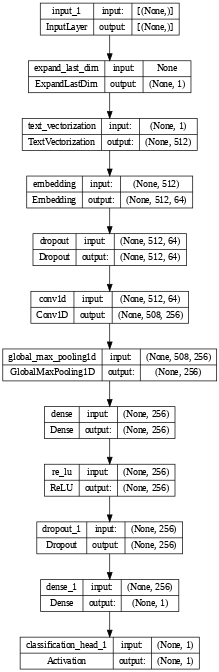

In [ ]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

### Данные, использованные в обучении нейронной сети

In [ ]:
# Загрузка датафреймов целевых и нецелевых звонков
with open(df_path + 'targets_df.pkl', 'rb') as f:
  targets_df = pkl.load(f)

with open(df_path + 'not_targets_df.pkl', 'rb') as f:
  not_targets_df = pkl.load(f)

In [ ]:
print(targets_df.shape)
print(not_targets_df.shape)

(1312, 78)
(3209, 78)


In [ ]:
targets_sample = targets_df['Текст транскрибации звонка Whisper'].head(1).values
not_targets_sample = not_targets_df['Текст транскрибации звонка Whisper'].head(1).values
targets = targets_df['Текст транскрибации звонка Whisper'].values
not_targets = not_targets_df['Текст транскрибации звонка Whisper'].values

In [ ]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1312
3209


#### `targets_sample`

In [ ]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [ ]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[3.1454156e-16]]
0


#### `not_targets_sample`

In [ ]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [ ]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9999855]]
1


#### `targets`

In [ ]:
targets[-1]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Здравствуйте! Вы звоните в компанию Эмергрупп. Меня зовут Ирина. Здравствуйте! Здравствуйте! Тебе клиент зовут Михаил. Интересы ДжК Ковелевской сети. Трехкомнатная квартира, бюджет от 36 миллионов. Серьезно? Да, конечно. Алло? Алло. Здравствуйте, Михаил! Вас соединили с застройщиком объекта Ковелевская сеть и консультировать у нас менеджеры. Одну минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Хорошо. Михаил, добрый день. Меня зовут Дмитрий. Жилой комплекс Ковелевской сети. Чем могу быть вам полезен? Здравствуйте! Я не знаю. Сказали, вы должны консультировать про улицу Думенский. Какая улица там? Улица Дубинская. Станция метрополитика. Значит, у вас будет готово второй квартал, да? Ко

In [ ]:
pred = model.predict(targets, verbose=0)
len(pred)

1312

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 97.56%


In [ ]:
model_results['targets_train'] = true_count/len(pred)

#### `not_targets`

In [ ]:
not_targets[-1]

'Здравствуйте! Вы позвонили в компанию ЭМР-Групп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Продолжение следует...'

In [ ]:
pred = model.predict(not_targets, verbose=0)
len(pred)

3209

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 96.42%


In [ ]:
model_results['not_targets_train'] = true_count/len(pred)

In [ ]:
model_results['val_accuracy'] = 0.9970

### Тестовые данные

In [ ]:
# Загрузка датафрейма
with open(df_path + 'all_new_df.pkl', 'rb') as f:
  all_new_df = pkl.load(f)

In [ ]:
all_new_df.shape

(4583, 79)

In [ ]:
all_new_df = all_new_df[all_new_df['Файл записи звонка'] != 'нет файла']
all_new_df.shape

(3406, 79)

In [ ]:
test_targets_sample = all_new_df['Текст whisper-транскрибации записи звонка'][all_new_df['Класс'] == 'Целевой'].head(1).values
test_not_targets_sample = all_new_df['Текст whisper-транскрибации записи звонка'][all_new_df['Класс'] != 'Целевой'].head(1).values
test_targets = all_new_df['Текст whisper-транскрибации записи звонка'][all_new_df['Класс'] == 'Целевой'].values
test_not_targets = all_new_df['Текст whisper-транскрибации записи звонка'][all_new_df['Класс'] != 'Целевой'].values

In [ ]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
992
2414


#### `test_targets_sample`

In [ ]:
test_targets_sample[0]

'Здравствуйте, вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста дождитесь ответа оператора. Жилой комплекс «Хедлайнер», меня зовут Елена, здравствуйте. Здравствуйте, примите клиента по жилому комплексу «Хедлайнер». Зовут Ольга Владимировна, 900, 1 комнатная квартира, 15400. Письмо маленькому, пожалуйста. Да, спасибо. Спасибо. Ольга Владимировна, добрый день, меня зовут Алена, чем могу вам помочь? Связались с вами, чтобы посмотреть квартал, какой-то, не запомнила, но там рядом, неплохо что ли... Жилой комплекс «Хедлайнер» мы называем. А, да, «Хедлайнер», ну это его... По чём-то он самый дешёвый, если есть данные, и вообще в идеале-то, конечно, 3 евро, вот как кухня застильная и 2 комнаты. Хорошо. Стартовый, наверное, самый минимальный вход в проект – это студия 30 метров в бюджете от 17 миллионов 600, 1 комнатная квартира от 21 миллиона, готовая квартира от 22 миллионов, 1 комнатная и евро 3-комнатная в формате, который вы спрашиваете. Если мы говорим про 

In [ ]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.02068406]]
0


#### `test_not_targets_sample`

In [ ]:
test_not_targets_sample[0]

'Здравствуйте. К сожалению, наш офис не работает в это время.'

In [ ]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


#### `test_targets`

In [ ]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(test_targets, verbose=0)
len(pred)

992

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 84.78%


In [ ]:
model_results['targets_test'] = true_count/len(pred)

#### `test_not_targets`

In [ ]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

2414

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 77.88%


In [ ]:
model_results['not_targets_test'] = true_count/len(pred)

### Тестовые данные Headliner

In [ ]:
# Загрузка датафрейма
with open(df_path + 'Headliner_new_work_df.pkl', 'rb') as f:
  Headliner_new_work_df = pkl.load(f)

In [ ]:
Headliner_new_work_df.shape

(1226, 79)

In [ ]:
Headliner_test_targets_sample = Headliner_new_work_df['Текст whisper-транскрибации записи звонка'][Headliner_new_work_df['Класс'] == 'Целевой'].head(1).values
Headliner_test_not_targets_sample = Headliner_new_work_df['Текст whisper-транскрибации записи звонка'][Headliner_new_work_df['Класс'] != 'Целевой'].head(1).values
Headliner_test_targets = Headliner_new_work_df['Текст whisper-транскрибации записи звонка'][Headliner_new_work_df['Класс'] == 'Целевой'].values
Headliner_test_not_targets = Headliner_new_work_df['Текст whisper-транскрибации записи звонка'][Headliner_new_work_df['Класс'] != 'Целевой'].values

In [ ]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
194
1032


#### `Headliner_test_targets_sample`

In [ ]:
Headliner_test_targets_sample[0]

'Здравствуйте, вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста дождитесь ответа оператора. Жилой комплекс «Хедлайнер», меня зовут Елена, здравствуйте. Здравствуйте, примите клиента по жилому комплексу «Хедлайнер». Зовут Ольга Владимировна, 900, 1 комнатная квартира, 15400. Письмо маленькому, пожалуйста. Да, спасибо. Спасибо. Ольга Владимировна, добрый день, меня зовут Алена, чем могу вам помочь? Связались с вами, чтобы посмотреть квартал, какой-то, не запомнила, но там рядом, неплохо что ли... Жилой комплекс «Хедлайнер» мы называем. А, да, «Хедлайнер», ну это его... По чём-то он самый дешёвый, если есть данные, и вообще в идеале-то, конечно, 3 евро, вот как кухня застильная и 2 комнаты. Хорошо. Стартовый, наверное, самый минимальный вход в проект – это студия 30 метров в бюджете от 17 миллионов 600, 1 комнатная квартира от 21 миллиона, готовая квартира от 22 миллионов, 1 комнатная и евро 3-комнатная в формате, который вы спрашиваете. Если мы говорим про 

In [ ]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.02068406]]
0


#### `Headliner_test_not_targets_sample`

In [ ]:
Headliner_test_not_targets_sample[0]

'Здравствуйте. К сожалению, наш офис не работает в это время.'

In [ ]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


#### `Headliner_test_targets`

In [ ]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [ ]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

194

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 84.02%


In [ ]:
model_results['targets_test_Headliner'] = true_count/len(pred)

#### `Headliner_test_not_targets`

In [ ]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [ ]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

1032

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 80.43%


In [ ]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

### Тестовые данные Primavera

In [ ]:
# Загрузка датафрейма
with open(df_path + 'Primavera_new_work_df.pkl', 'rb') as f:
  Primavera_new_work_df = pkl.load(f)

In [ ]:
Primavera_new_work_df.shape

(767, 79)

In [ ]:
Primavera_test_targets_sample = Primavera_new_work_df['Текст whisper-транскрибации записи звонка'][Primavera_new_work_df['Класс'] == 'Целевой'].head(1).values
Primavera_test_not_targets_sample = Primavera_new_work_df['Текст whisper-транскрибации записи звонка'][Primavera_new_work_df['Класс'] != 'Целевой'].head(1).values
Primavera_test_targets = Primavera_new_work_df['Текст whisper-транскрибации записи звонка'][Primavera_new_work_df['Класс'] == 'Целевой'].values
Primavera_test_not_targets = Primavera_new_work_df['Текст whisper-транскрибации записи звонка'][Primavera_new_work_df['Класс'] != 'Целевой'].values

In [ ]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
313
454


#### `Primavera_test_targets_sample`

In [ ]:
Primavera_test_targets_sample[0]

'Клубный город на реке Примавера. Здравствуйте, Светлана. Да, здрасте. Есть квартиры? Да, да. Как обращаться к вам? Вячеслав. Вячеслав, вас менеджер проконсультирует минуту. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Обращаем ваше внимание. Примавера. Клубный город на реке. Меня Владимир зовут. Здравствуйте, Вячеслав. Всем могу быть полезен? Да, здрасте. Предъявление на вас, что квартиры до 20 миллионов, ну, как хотелось бы, до 15. Ну, либо однушка, либо двушка. Просите на двушку, наверное. Вячеслав, скажите, до 13 миллионов, вы сказали? Нет, до 17-ти. А, так. У нас просто двухкомнатные, где отдельная спальня и кухня. Они начинаются от 27 миллионов. Есть форматы Евро, двухкомнатные, где отдельная спальня и кухня-гостиная. Они начинаются от 19 миллионов 300 тысяч. Вам такие форматы подходят? Это самые дальние по сдаче, корпус. Да, совершенно верно. У нас сейчас в продаже две очереди, Россиния и Вивальди. Россия, ключи до декабря 2024 года, а

In [ ]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00963661]]
0


#### `Primavera_test_not_targets_sample`

In [ ]:
Primavera_test_not_targets_sample[0]

'Кловный город на реке Примавера. Здравствуйте, Анастасия. Девушка, здравствуйте. А у вас есть такой врач? Сейчас скажу. А ваш врач, это жилой комплекс. Ой, извините.'

In [ ]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99999994]]
1


#### `Primavera_test_targets`

In [ ]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [ ]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

313

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 80.51%


In [ ]:
model_results['targets_test_Primavera'] = true_count/len(pred)

#### `Primavera_test_not_targets`

In [ ]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [ ]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

454

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 67.62%


In [ ]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

### Тестовые данные Paveletskaya_city

In [ ]:
# Загрузка датафрейма
with open(df_path + 'Paveletskaya_city_new_work_df.pkl', 'rb') as f:
  Paveletskaya_city_new_work_df = pkl.load(f)

In [ ]:
Paveletskaya_city_new_work_df.shape

(1413, 79)

In [ ]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_new_work_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_work_df['Класс'] == 'Целевой'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_new_work_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_work_df['Класс'] != 'Целевой'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_new_work_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_work_df['Класс'] == 'Целевой'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_new_work_df['Текст whisper-транскрибации записи звонка'][Paveletskaya_city_new_work_df['Класс'] != 'Целевой'].values

In [ ]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
485
928


#### `Paveletskaya_city_test_targets_sample`

In [ ]:
Paveletskaya_city_test_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмаргрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмаргрупп. Светлана, здравствуйте. Здравствуйте! Звонок в портал лотереалов. Клиент на линии интересуется студиями. Имя Виктор, ЖК Павелецкая Сити. Да, переключайте. Виктор, здравствуйте. Меня зовут Светлана, компания Эмаргрупп. Вы подбираете жилую недвижимость и рассматриваете наш жилой комплекс в Павелецкой Сити. Все верно? Город Москва. Да, да, конечно. Виктор, я вас переключу на офис продажи. Оставайтесь на линии. По окончании разговора, пожалуйста, оцените качество отслуживания. Спасибо. Виктор, добрый день. Я жилая комплекс Павелецкой Сити. А вы, как всегда, охотничьи студии. Все верно? Здравствуйте. Вас так плохо слышно. Прививайтесь. К сожалению, у нас электронная телефония. Скажите, так лучше 

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.68057615]]
1


#### `Paveletskaya_city_test_not_targets_sample`

In [ ]:
Paveletskaya_city_test_not_targets_sample[0]

'Субтитры делал DimaTorzok'

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99999946]]
1


#### `Paveletskaya_city_test_targets`

In [ ]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

485

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.84%


In [ ]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

#### `Paveletskaya_city_test_not_targets`

In [ ]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

928

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 80.06%


In [ ]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

### Датафрейм с результатами тестирования модели

In [ ]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.15_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [ ]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.15_text_model.keras,0.97561,0.964163,0.997,0.847782,0.77879,0.840206,0.804264,0.805112,0.676211,0.878351,0.800647


## Подбор архитектур нейронных сетей

### Весь датасет для обучения

#### Классификация текстов `autokeras`

##### Подготовка датасета к обучению

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
train_df = pd.concat([total_targets_train_df, total_not_targets_train_df])
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)
print(train_df.shape)

(629, 79)
(1302, 79)
(1931, 79)


In [ ]:
x = train_df['Текст whisper-транскрибации записи звонка'].values
x[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [ ]:
train_df['Класс'] = train_df['Класс'].apply(lambda x: '0' if x == 'Целевой' else '1')
train_df = train_df.astype({'Класс': int})
y = train_df['Класс'].values
y[0]

0

In [ ]:
classes_names = ['Целевой', 'Нецелевой']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

##### `autokeras`

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 01m 43s]
val_accuracy: 0.8260188102722168

Best val_accuracy So Far: 0.8683385848999023
Total elapsed time: 00h 12m 10s
Epoch 1/20
319/319 [==============================] - 45s 138ms/step - loss: 0.3757 - accuracy: 0.8271 - val_loss: 0.3240 - val_accuracy: 0.8691
Epoch 2/20
319/319 [==============================] - 39s 122ms/step - loss: 0.2869 - accuracy: 0.8824 - val_loss: 0.3093 - val_accuracy: 0.8738
Epoch 3/20
319/319 [==============================] - 41s 127ms/step - loss: 0.2242 - accuracy: 0.9082 - val_loss: 0.3243 - val_accuracy: 0.8777
Epoch 4/20
319/319 [==============================] - 38s 118ms/step - loss: 0.1606 - accuracy: 0.9429 - val_loss: 0.4050 - val_accuracy: 0.8519
Epoch 5/20
319/319 [==============================] - 40s 125ms/step - loss: 0.1051 - accuracy: 0.9637 - val_loss: 0.5860 - val_accuracy: 0.8252
Epoch 6/20
319/319 [==============================] - 51s 159ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.6445 - val_accur

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.24_text_model.keras')

#### Классификация текстов `terra_ai_datasets` + `autokeras`

##### `terra_ai_datasets`

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [ ]:
# Создаём каталоги для текстового датасета
os.makedirs('Звонки_текст', exist_ok=True)
os.makedirs('Звонки_текст/Целевой', exist_ok=True)
os.makedirs('Звонки_текст/Нецелевой', exist_ok=True)

In [ ]:
# Записываем текстовые файлы
total_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Целевой/targets.txt', index=False, header=None)
total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Нецелевой/not_targets.txt', index=False, header=None)

In [ ]:
dataset = TextClassification(source_path=['Звонки_текст'],
                             train_size=0.8,
                             preprocessing='None',
                             mode='Length and step',
                             length=100,
                             step=10,
                             one_hot_encoding=False,
                             pymorphy=False)

04:41:33 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.visualize()

Класс: Целевой


'Дмитрий это Юрий Мы с вами знакомы Да Юрий Слушаю вас У вас есть дом Да у меня есть Сын задает вопрос Двухкомнатную квартиру если купить где нибудь по соседству со мной сколько сейчас будет стоить Вы имеете в виду хотели бы где то поближе к своей квартире Ну да В Евгении или еще где то Если смотреть в Евгении то именно двухкомнатные варианты Сейчас одну секунду сориентирую Именно две спальни Просто он с вами разговаривал а с моего телефона звонил В итоге я сейчас отвечаю Я вас понял Если смотреть в Евгении то минимальный сейчас 63 метра квадратных на'


Класс: Нецелевой


'пишите там периодически потому что ну всякое бывает там водку скину я не знаю на больничном еще что то Да по поводу кладовки мне там сразу прям сообщите как только появится вон там что еще работаете А вы с кем общались Менеджер у вас еще работает вы не знаете Ой Господи как же это важно Кто Кто был Мне сейчас уже даже в ничего 20 й год а вся быта когда я подписала Вот я даже начала сегодня искать вот и это самое Виталия и Дарья Виталия и Дарья Я начала искать в телефоне у меня телефон уже поменялся с'

In [ ]:
dataset.summary()

,1_Text,2_Classification
0,бы уточнить кое что У меня приобретена квартира в корпусе Marlon И ходят слухи что вы там со дня на день начинаете выдавать ключи Хотела уточнить более точную информацию Как будет выдача ключей запись выдачи ключей Алло Вы меня слышите Вам придет смс сообщение Я вас слышу В мобильном приложении клиента откроется запись Перед этим придет смс сообщение что открылась запись на осмотр квартиры в вашем корпусе Понятно А какие то примерные дедлайны июня июль есть или нет Я просто отпуск планирую я поэтому и спрашиваю У нас нет никакой информации но сдача объекта если до конца июня значит примерно,Нецелевой
1,по стоимости от 19 миллионов до 100 тысяч Вы для себя какой вариант рассматривали Ну что то небольшое Мы в Краснодаре продаем дом Клуб мне говорят на пике Примавера меня зовут Шуйкина Юлия добрый день Юлия добрый день меня зовут Анна мы бы хотели подъехать посмотреть ваш корпус интересуетесь покупкой квартиры Угу так Анна поняла А вы где сейчас Ну мы можем минут через 10 15 в СТБ мы были А давайте подъезжайте Вам нужно адрес скинуть или вы знаете как подъехать А как забиваем просто вот в продажу забиваем или как правильно Можно набить да офис продаж Примавера и,Целевой
2,вы мне предлагаете еще раз уточняем порядки покупки оплаты и так далее и тогда либо я говорю спасибо но меня это не устраивает либо как бы сказать все свои полномочия передаю моему юристу который будет с вами оформлять документы переводить деньги ну и все прочее Я ничем вас не обидел Нет Александр все отлично Все отлично Значит мы проведем воскресенье с вами вместе таинственно любовно экзотично ну и так далее Все Значит до воскресенья До воскресенья Александр Всего доброго Всего доброго Спасибо за обращение Здравствуйте меня зовут Татьяна я представляю компанию MerGroup Оставили заявку на обратный звонок Здравствуйте вы позвонили,Нецелевой
3,Виталий я наберу чтобы мы с вами подочнее определились по дню Сейчас вам направлю свою визитку у вас появится мой прямой контакт я могу вам направить ее в WhatsApp могу даже направить на телефон Нет меня в этом телефоне не поддерживают просто отправьте Просто номер телефона с смсом потому что в этом телефоне не поддерживают WhatsApp Так хорошо а я правильно понимаю что давайте сверим последние 4 цифры вашего номера чтобы у меня был корректный системе Секунду 6691 6691 да все верно Виталий Так по тогда а куда направить эту информацию по видам расстройки Ну это я потом пока видам,Целевой
4,в Москвинской офисе Так я Заходи Здравствуйте Сергей здравствуйте Меня зовут Дарья Какие вопросы у вас Дарья знаете Екатерину какую Какую вам Екатерину Да Антон Морозов не написал У вас много Екатерин Вторую наверное У нас просто нет Екатерины в нашем отделе А что на конкретном он написал Для какой цели вам нужна Екатерина У нас сегодня назначен просмотр футболиста Мы приехали из Архангельска посмотреть Антона Морозова вы знаете такого Ну это мой коллега конечно Его сейчас нет Он посоветовал нам обратиться к Екатерине Давайте наверное я с Антоном Давайте делаем так Дарья Меня зовут Сергей Отставить Морозова отставить Екатерину,Нецелевой



Кол-во примеров в train выборке: 165629
Кол-во примеров в val выборке: 41408

Список классов и количество примеров:


,Целевой,Нецелевой
train,105582,60047
val,26387,15021


In [ ]:
dataset.create(use_generator=False)

04:44:18 | Формирование массивов train - Text - 1_Text: 100%|██████████| 165629/165629 [00:13<00:00, 11837.59it/s]
04:44:35 | Формирование массивов train - Classification - 2_Classification: 100%|██████████| 165629/165629 [00:11<00:00, 13945.07it/s]
04:44:53 | Формирование массивов val - Text - 1_Text: 100%|██████████| 41408/41408 [00:02<00:00, 16722.39it/s]
04:44:56 | Формирование массивов val - Classification - 2_Classification: 100%|██████████| 41408/41408 [00:02<00:00, 15901.06it/s]


In [ ]:
# Сохраняем dataset в pkl
with open(model_path + '2023.10.25_total_dataset.pkl', 'wb') as f:
  pkl.dump((dataset.X['train']['input_1'],
            dataset.X['val']['input_1'],
            dataset.Y['train']['output_1'],
            dataset.Y['val']['output_1']), f)

##### `autokeras`

In [ ]:
# Загружаем dataset из pkl
with open(model_path + '2023.10.25_total_dataset.pkl', 'rb') as f:
  x_train, x_val, y_train, y_val = pkl.load(f)

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 47m 53s]
val_accuracy: 0.979569137096405

Best val_accuracy So Far: 0.9975608587265015
Total elapsed time: 01h 25m 43s
Epoch 1/20
10352/10352 [==============================] - 111s 11ms/step - loss: 0.2913 - accuracy: 0.8782 - val_loss: 0.1004 - val_accuracy: 0.9631
Epoch 2/20
10352/10352 [==============================] - 85s 8ms/step - loss: 0.0918 - accuracy: 0.9662 - val_loss: 0.0468 - val_accuracy: 0.9848
Epoch 3/20
10352/10352 [==============================] - 85s 8ms/step - loss: 0.0604 - accuracy: 0.9781 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 4/20
10352/10352 [==============================] - 85s 8ms/step - loss: 0.0450 - accuracy: 0.9842 - val_loss: 0.0156 - val_accuracy: 0.9952
Epoch 5/20
10352/10352 [==============================] - 85s 8ms/step - loss: 0.0372 - accuracy: 0.9870 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 6/20
10352/10352 [==============================] - 84s 8ms/step - loss: 0.0312 - accuracy: 0.9892 - val_loss: 0.018

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.25_text_model.keras')

### Датасет для обучения Headliner

#### Классификация текстов `autokeras`

##### Подготовка датасета к обучению

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
train_df = pd.concat([Headliner_targets_train_df, Headliner_not_targets_train_df])
print(Headliner_targets_train_df.shape)
print(Headliner_not_targets_train_df.shape)
print(train_df.shape)

(440, 79)
(2177, 79)
(2617, 79)


In [ ]:
x = train_df['Текст whisper-транскрибации записи звонка'].values
x[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [ ]:
train_df['Класс'] = train_df['Класс'].apply(lambda x: '0' if x == 'Целевой' else '1')
train_df = train_df.astype({'Класс': int})
y = train_df['Класс'].values
y[0]

0

In [ ]:
classes_names = ['Целевой', 'Нецелевой']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

##### `autokeras`

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 01m 03s]
val_accuracy: 0.8416030406951904

Best val_accuracy So Far: 0.9007633328437805
Total elapsed time: 00h 05m 50s
Epoch 1/20
131/131 [==============================] - 18s 125ms/step - loss: 0.3487 - accuracy: 0.8562 - val_loss: 0.2800 - val_accuracy: 0.8721
Epoch 2/20
131/131 [==============================] - 16s 124ms/step - loss: 0.2310 - accuracy: 0.9021 - val_loss: 0.2501 - val_accuracy: 0.8779
Epoch 3/20
131/131 [==============================] - 17s 129ms/step - loss: 0.1811 - accuracy: 0.9236 - val_loss: 0.2472 - val_accuracy: 0.8798
Epoch 4/20
131/131 [==============================] - 16s 123ms/step - loss: 0.1304 - accuracy: 0.9508 - val_loss: 0.2712 - val_accuracy: 0.8836
Epoch 5/20
131/131 [==============================] - 17s 127ms/step - loss: 0.0905 - accuracy: 0.9666 - val_loss: 0.2894 - val_accuracy: 0.8874
Epoch 6/20
131/131 [==============================] - 17s 130ms/step - loss: 0.0490 - accuracy: 0.9857 - val_loss: 0.3534 - val_accur

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.24_Headliner_text_model.keras')

#### Классификация текстов `terra_ai_datasets` + `autokeras`

##### `terra_ai_datasets`

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_train_df.pkl', 'rb') as f:
  Headliner_targets_train_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_train_df.pkl', 'rb') as f:
  Headliner_not_targets_train_df = pkl.load(f)

In [ ]:
print(Headliner_targets_train_df.shape)
print(Headliner_not_targets_train_df.shape)

(440, 79)
(2177, 79)


In [ ]:
# Создаём каталоги для текстового датасета
os.makedirs('Звонки_текст', exist_ok=True)
os.makedirs('Звонки_текст/Целевой', exist_ok=True)
os.makedirs('Звонки_текст/Нецелевой', exist_ok=True)

In [ ]:
# Записываем текстовые файлы
Headliner_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Целевой/targets.txt', index=False, header=None)
Headliner_not_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Нецелевой/not_targets.txt', index=False, header=None)

In [ ]:
dataset = TextClassification(source_path=['Звонки_текст'],
                             train_size=0.8,
                             preprocessing='None',
                             mode='Length and step',
                             length=100,
                             step=10,
                             one_hot_encoding=False,
                             pymorphy=False)

07:08:13 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.visualize()

Класс: Целевой


'с вами третью очередь в даче которой конец 2024 года Здесь больше вариантов Как я сказала есть минимальные студии 30 метров Не интересуют вас студии или интересны Нет я просто хотела бы допустим если чуть больше 30 метров почему бы и нет Хорошо тогда скажу Минимальный бюджет по комплексу вхождения в хедлайнер это студия 30 метров Допустим это будет 47 этаж этажи только видовые высотные остались То есть низкий к сожалению не смогу предложить в минимальном бюджете И 17 593 тысячи это стоимость студии Я понимаю но это походит просто по этажности хотелось бы как раз чуть чуть пониже Это'


Класс: Нецелевой


'посмотрите Ну вы думаете что я такой я же не ашитектор понимаете я я всего лишь обычный обыватель да А кто знает я же не знаю Ну по мне конечно там разные Может ашитектор По мне разные конечно клиенты у вас бывают ясное дело Нет я я если и потребуется перепланировка если нужно будет обращаться к кому то ну в принципе в этот раз не так сложно но тем не менее тоже дополнительные там времени ресурсы там деньги на какие то ресурсы может Поэтому если и так сложно то наверное не ставь вообще вообще в это влезать В любом случае'

In [ ]:
dataset.summary()

,1_Text,2_Classification
0,83 Да Анна Да Анна Хорошо Анна тогда можем чтобы не тратить ваше время Да да Мы просто пока интересуемся но если что мы вам перезвоним если принимем решение Хорошо Спасибо Да конечно Ну в среднем это получается ориентировочно 220 300 тысяч за квадратный метр А какая квадратная структура От 5 квадратных метров до даже 13 5 Ага всё я поняла Но я жду информацию примерно Да я вам просто Да Анна дело в том что сейчас на встречах но я как закончу я вам сегодня перешлю Да официант я вас не тороплю ничего страшного да Всё главное не забудьте,Нецелевой
1,когда можно Ну суть такая как я понимаю То есть застройщик взял их вправлять Не до делки правильно я понял Да То есть застройщик допустим если у вас квартира была замечания застройщик выбирает ключи и отдает подрядчику дальше на устранение А ну да да да Подрядчик устраняет ключи передаются обратно застройщику и застройщик уже приглашает посторонно ну то есть клиента Вот такие вещи То есть на осмотр да Ну просто тут вы знаете из за чего весь звонок Потому что прошло уже там практически 3 месяца Ну звонка не дождались поэтому решили сами позвонить Ну все верно просто зависит от,Нецелевой
2,здравствуйте меня зовут Юра Юрий Александрович Вы интересуетесь покупкой квартиры верно Юрий Александрович Да приобретением да Да я вас для подробной консультации соединю сейчас с менеджером отдела продаж одну минуту подождите Вы сколько мне будете перекидывать меня уже задолбало это Я не могу я не могу Алло алло Алло Здравствуйте Да не спешите отдышитесь Да здравствуйте я не слышала да Я слышу что отдышаться не можете Не не не слушаю вас да здравствуйте Да здравствуйте меня просто вас перекинули до приобретения недвижимости Ага Хэдлайнера да Вы с проектом знакомы К сожалению меня как раз с вас перекинули меня просто кидают,Нецелевой
3,вас за звонок Пожалуйста дождитесь ответа оператора Добрый день ЖК хэрлайнер Лилия Здравствуйте Вам аккуратно передали все эти вопросы Что я не поняла Вам передали все эти вопросы Нет мне не передали все эти вопросы Если вас интересует покупка недвижимости я вас сейчас соединю для подробной консультации с менеджером отдела продаж Подскажите как вас зовут Да конечно Равиль Равиль я вас перевожу на менеджера Одну минуту Алло Алло здравствуйте Да Равиль здравствуйте Меня зовут Влада я являюсь менеджером по продажам проекта Хэрлайнер Чем могу помочь вам Смотрите вам кратко передали все эти вопросы Нет А хотел бы трехкомнатную квартиру Нет,Целевой
4,Вот это же там недостатки У меня такого нет но я имею ввиду по меткам так сказать нет сейчас посмотрим еще Не ну подкидку уже Не я понял я сейчас факт еще открою я просто паблицу снимать смотрел сначала реестр Там так без подробностей так сказать Балкон ручка была нормальная потом я приходила она сломана а вот недавно была ну может быть неделю две назад в Роте отремонтировал кто то А вот ключи на объекте да сейчас находятся Нет ключи у вас один ключ у нас Ну в смысле ну здесь да на объекте в руляшке конечно Так Давайте уточню,Нецелевой



Кол-во примеров в train выборке: 46072
Кол-во примеров в val выборке: 11519

Список классов и количество примеров:


,Целевой,Нецелевой
train,21343,24729
val,5440,6079


In [ ]:
dataset.create(use_generator=False)

07:08:59 | Формирование массивов train - Text - 1_Text: 100%|██████████| 46072/46072 [00:04<00:00, 11341.55it/s]
07:09:04 | Формирование массивов train - Classification - 2_Classification: 100%|██████████| 46072/46072 [00:02<00:00, 15811.88it/s]
07:09:08 | Формирование массивов val - Text - 1_Text: 100%|██████████| 11519/11519 [00:00<00:00, 16939.07it/s]
07:09:09 | Формирование массивов val - Classification - 2_Classification: 100%|██████████| 11519/11519 [00:00<00:00, 15994.97it/s]


In [ ]:
# Сохраняем dataset в pkl
with open(model_path + '2023.10.25_Headliner_dataset.pkl', 'wb') as f:
  pkl.dump((dataset.X['train']['input_1'],
            dataset.X['val']['input_1'],
            dataset.Y['train']['output_1'],
            dataset.Y['val']['output_1']), f)

##### `autokeras`

In [ ]:
# Загружаем dataset из pkl
with open(model_path + '2023.10.25_Headliner_dataset.pkl', 'rb') as f:
  x_train, x_val, y_train, y_val = pkl.load(f)

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 14m 24s]
val_accuracy: 0.9966142773628235

Best val_accuracy So Far: 0.9980900883674622
Total elapsed time: 00h 22m 16s
Epoch 1/20
2880/2880 [==============================] - 43s 15ms/step - loss: 0.2475 - accuracy: 0.8887 - val_loss: 0.0444 - val_accuracy: 0.9853
Epoch 2/20
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0372 - accuracy: 0.9872 - val_loss: 0.0164 - val_accuracy: 0.9936
Epoch 3/20
2880/2880 [==============================] - 25s 9ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0112 - val_accuracy: 0.9961
Epoch 4/20
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0138 - val_accuracy: 0.9952
Epoch 5/20
2880/2880 [==============================] - 24s 8ms/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0164 - val_accuracy: 0.9957
Epoch 6/20
2880/2880 [==============================] - 22s 8ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0090 - val_accu

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.25_Headliner_text_model.keras')

### Датасет для обучения Primavera

#### Классификация текстов `autokeras`

##### Подготовка датасета к обучению

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
train_df = pd.concat([Primavera_targets_train_df, Primavera_not_targets_train_df])
print(Primavera_targets_train_df.shape)
print(Primavera_not_targets_train_df.shape)
print(train_df.shape)

(776, 79)
(1052, 79)
(1828, 79)


In [ ]:
x = train_df['Текст whisper-транскрибации записи звонка'].values
x[0]

'Клубный город на реке Примавера. Надеюсь, это доброе утро. Доброе утро, да. Я бы хотела узнать по поводу квартиры. Да, извини, у вас офис продаж? По поводу приобретения квартиры. Будьте добры, как вам указано? Можно обращаться? Ирина. Ирина, вас благодарю с офисом продаж. Соденяем ноты, пожалуйста. Спасибо. Ирина, доброе утро. Клубный город на реке Примавера. Доброе утро. Да. Я бы хотела узнать по поводу приобретения квартиры. Какие метры примерно у квартиры есть? Какой этаж вообще в доме? Ну, сколько этажей в доме? Все подробнее. Да, Ирина, подскажите, пожалуйста, что для себя подбираете? Нам нужны двухкомнатную квартиру. Двухкомнатную квартиру. Где-то там 53-60 где-нибудь так квадратных метров. Так, хорошо. Вы на какой-то определенный бюджет рассматриваете? Ну, примерно там 20 миллионов. Замечательно. С нашим проектом знакомы? Нет, я бы хотела узнать подробнее. Замечательно. Давайте я вам немножко вкратце расскажу, а потом уже тогда по вариантам предложу вам. Располагаем, где мы, на

In [ ]:
train_df['Класс'] = train_df['Класс'].apply(lambda x: '0' if x == 'Целевой' else '1')
train_df = train_df.astype({'Класс': int})
y = train_df['Класс'].values
y[0]

0

In [ ]:
classes_names = ['Целевой', 'Нецелевой']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

##### `autokeras`

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 00m 44s]
val_accuracy: 0.8005464673042297

Best val_accuracy So Far: 0.8251366019248962
Total elapsed time: 00h 04m 11s
Epoch 1/20
92/92 [==============================] - 13s 133ms/step - loss: 0.5235 - accuracy: 0.7565 - val_loss: 0.4200 - val_accuracy: 0.8115
Epoch 2/20
92/92 [==============================] - 10s 105ms/step - loss: 0.4033 - accuracy: 0.8269 - val_loss: 0.3878 - val_accuracy: 0.8306
Epoch 3/20
92/92 [==============================] - 12s 129ms/step - loss: 0.3429 - accuracy: 0.8639 - val_loss: 0.4122 - val_accuracy: 0.8142
Epoch 4/20
92/92 [==============================] - 9s 102ms/step - loss: 0.2485 - accuracy: 0.9029 - val_loss: 0.4717 - val_accuracy: 0.8142
Epoch 5/20
92/92 [==============================] - 14s 148ms/step - loss: 0.1480 - accuracy: 0.9576 - val_loss: 0.6266 - val_accuracy: 0.7732
Epoch 6/20
92/92 [==============================] - 13s 139ms/step - loss: 0.0806 - accuracy: 0.9815 - val_loss: 0.6928 - val_accuracy: 0.7896
E

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.24_Primavera_text_model.keras')

#### Классификация текстов `terra_ai_datasets` + `autokeras`

##### `terra_ai_datasets`

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_train_df.pkl', 'rb') as f:
  Primavera_targets_train_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_train_df.pkl', 'rb') as f:
  Primavera_not_targets_train_df = pkl.load(f)

In [ ]:
print(Primavera_targets_train_df.shape)
print(Primavera_not_targets_train_df.shape)

(776, 79)
(1052, 79)


In [ ]:
# Создаём каталоги для текстового датасета
os.makedirs('Звонки_текст', exist_ok=True)
os.makedirs('Звонки_текст/Целевой', exist_ok=True)
os.makedirs('Звонки_текст/Нецелевой', exist_ok=True)

In [ ]:
# Записываем текстовые файлы
Primavera_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Целевой/targets.txt', index=False, header=None)
Primavera_not_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Нецелевой/not_targets.txt', index=False, header=None)

In [ ]:
dataset = TextClassification(source_path=['Звонки_текст'],
                             train_size=0.8,
                             preprocessing='None',
                             mode='Length and step',
                             length=100,
                             step=10,
                             one_hot_encoding=False,
                             pymorphy=False)

07:47:31 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.visualize()

Класс: Целевой


'внести какую то определенную ипотеку Вот еще честно говоря даже не знаем какой там фрактент и что Это у вас в офисе скорее всего да будут Мы можем да мы можем собственно расчеты провести в офисе Если мы с вами говорим про ставки то у нас есть программа как семейные ипотеки ставка 5 5 и стандартные условия это 11 3 И есть программы субсидированные 6 5 на весь срок и есть еще субсидирование государственное где ставка будет 7 8 в зависимости от скидки и в зависимости от линита Да потому что по госпограммам допустим если есть до 15 миллионов то'


Класс: Нецелевой


'я поняла Все верно Хорошо отлично Смотрите Александр мы можем с вами заново завершать если у вас вопросов не осталось дальше я вам все направлю на почту то есть то что там ознакомительная информация будет и уже 7 числа мы с вами в 12 сейчас ну примерно в это время дополнительно еще раз позвонимся и обговорим возможность приехать на встречу через день через два ну по времени также обсудим Да давайте так бы просто Угу отлично Хорошо Александр если вопросов нет я вам пожелаю хорошего дня спасибо за твой звонок хорошего настроения Скажите а почта я не подключал вам почту'

In [ ]:
dataset.summary()

,1_Text,2_Classification
0,район Также есть действующая ЧКЛОФ арена Это инструктивное здание где можно спортом позаниматься юношелством и детям Там более 30 видов спорта В дополнение к этому застройщик уже в этом году открывает теннисный центр Там будет 6 закрытых кортов где в большой теннис можно будет поиграть И также будет строительство дворца спорта Это бассейн тренажерные залы Ну и сама набережная Она достаточно функциональная объемная большая Там 17 гектар площадью и 3 5 км ее длина Она включает в себя и спортивные маршруты беговые дорожки велодорожки все такие игровые площадки зоны для отдыха В целом могу записать вас в розыск продаж Мы,Целевой
1,реке Примавыру Здравствуйте Анастасия Здравствуйте Аманин ты у меня сфотографировался Вот заказчик нужный Извиняюсь как вас представить Анжелика Минуту Обращаем ваше внимание что в целях контроля качества услуг разговор может быть записан Вот так Клубный город на реке Примавыру Меня зовут Антон Анжелика Добрый день Чем могу быть полезен Здравствуйте Хотела бы поинтересоваться по поводу вашего ЖК Там квартал в Ивальве Есть еще квартиры Фонтаны или здравствуйте У нас две очереди сейчас в Порто Франзаве Обе очереди строят И первая и вторая Вот как раз в комплексе Ивальве корпус Тут у нас семь корпусов Зайдет во втором квартале 2025 года,Нецелевой
2,то не сложился у нас диалог очень предвзято очень неприятно И в общем мы не получили информации это раз Во вторых мы все как бы испортили настроение Это два Мне кажется это просто как то недопустимо вообще В принципе такого не должно быть Мы хотели вас опознать в известности Как то есть ваш руководство Свяжитесь меня с кем нибудь я не знаю просто я хочу сообщить вам об этом Мы не узнали ни о концепции абсолютно ничего Я вас понимаю но в любом случае данный вопрос мы урегулируем Ну это вообще просто это такое хамство вот просто ну я очень,Целевой
3,бюджет Тогда могу вам предложить вариант квартиры по этажности предпочтения Ну прям вот значимых предпочтений нет Выше 7 го было бы неплохо Но выше 3 го 4 го вообще было бы хорошо Верхние не надо прям самые верхние Если мы говорим про самую минимальную стоимость у нас можно рассмотреть сейчас 6 й корпус Квартира на 5 м этаже будет 66 7 квадратных метров Стоимость у нее 27 миллионов 140 тысяч Видовые характеристики у этой квартиры во двор Двор у нас закрыт и без машин благоустроенный По стороне света это запад Панорамное остекление Квартира без изделки внутри сдается По комнатам если,Целевой
4,То есть мы можем опять же действовать по эпохе и без бронирования Но опять таки же с точки зрения сохранения данного варианта за вами ее необходимо забронировать и дальше уже собственно не переживать что она будет продана кому то еще Понятно А некоторые документы как это все делается Куда отправлять Так а сориентируйте меня более точно какая конкретно квартира вас заинтересовала А вот на сайте однокомнатная квартал Вивальди средняя 6 этаж 5 45 4 квадрата Вот пока на ней остановились А вы уже посещали наш офис продаж с проектом знакомых Нет меня вот это интересует что онлайн А приобрести квартиру,Целевой



Кол-во примеров в train выборке: 63480
Кол-во примеров в val выборке: 15871

Список классов и количество примеров:


,Целевой,Нецелевой
train,47948,15532
val,12059,3812


In [ ]:
dataset.create(use_generator=False)

07:48:13 | Формирование массивов train - Text - 1_Text: 100%|██████████| 63480/63480 [00:05<00:00, 11558.46it/s]
07:48:20 | Формирование массивов train - Classification - 2_Classification: 100%|██████████| 63480/63480 [00:06<00:00, 10385.66it/s]
07:48:26 | Формирование массивов val - Text - 1_Text: 100%|██████████| 15871/15871 [00:00<00:00, 16705.06it/s]
07:48:28 | Формирование массивов val - Classification - 2_Classification: 100%|██████████| 15871/15871 [00:01<00:00, 15273.98it/s]


##### `autokeras`

In [ ]:
x_train, x_val, y_train, y_val = (dataset.X['train']['input_1'],
                                  dataset.X['val']['input_1'],
                                  dataset.Y['train']['output_1'],
                                  dataset.Y['val']['output_1'])

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 20m 32s]
val_accuracy: 0.9974166750907898

Best val_accuracy So Far: 0.9984248280525208
Total elapsed time: 00h 33m 06s
Epoch 1/20
3968/3968 [==============================] - 56s 14ms/step - loss: 0.2628 - accuracy: 0.8921 - val_loss: 0.1067 - val_accuracy: 0.9584
Epoch 2/20
3968/3968 [==============================] - 37s 9ms/step - loss: 0.0419 - accuracy: 0.9851 - val_loss: 0.1123 - val_accuracy: 0.9570
Epoch 3/20
3968/3968 [==============================] - 35s 9ms/step - loss: 0.0251 - accuracy: 0.9906 - val_loss: 0.1586 - val_accuracy: 0.9467
Epoch 4/20
3968/3968 [==============================] - 33s 8ms/step - loss: 0.0198 - accuracy: 0.9931 - val_loss: 0.0108 - val_accuracy: 0.9967
Epoch 5/20
3968/3968 [==============================] - 35s 9ms/step - loss: 0.0174 - accuracy: 0.9937 - val_loss: 0.0444 - val_accuracy: 0.9864
Epoch 6/20
3968/3968 [==============================] - 34s 8ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0266 - val_accu

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.25_Primavera_text_model.keras')

### Датасет для обучения Paveletskaya_city

#### Классификация текстов `autokeras`

##### Подготовка датасета к обучению

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
train_df = pd.concat([Paveletskaya_city_targets_train_df, Paveletskaya_city_not_targets_train_df])
print(Paveletskaya_city_targets_train_df.shape)
print(Paveletskaya_city_not_targets_train_df.shape)
print(train_df.shape)

(629, 79)
(1302, 79)
(1931, 79)


In [ ]:
x = train_df['Текст whisper-транскрибации записи звонка'].values
x[0]

'Здравствуйте! Вы позвонили в компанию ЭМР-Групп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания ЭМР-Групп, меня зовут Ольга, здравствуйте. Здравствуйте, Ольга, звонок от Румбери на линии Дмитрий, интересует Павелецкая сеть, 2-й квартал 23, встреча с тобой 3 евро, интересует около 60 квадратов, наличный расчет в бюджете около 30 плюс-минус. Да. Спасибо. Дмитрий? Да-да. Здравствуйте, мне сказали, что вас не стоит поискать Павелецкая сеть, это все верно? Да. Единственное, что я хотел сказать, знаете, что мы сможем с вами переговорить на эту тему, просто я буквально сейчас через несколько минут должен буду положить трубку. Если во вторник с утра, с первого дня, вы меня наберете по этому вопросу, можно будет так сделать? Так, во вторник, да? Да, и мне предварительно, если можно, скинуть локацию, ну, о

In [ ]:
train_df['Класс'] = train_df['Класс'].apply(lambda x: '0' if x == 'Целевой' else '1')
train_df = train_df.astype({'Класс': int})
y = train_df['Класс'].values
y[0]

0

In [ ]:
classes_names = ['Целевой', 'Нецелевой']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

##### `autokeras`

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 00m 49s]
val_accuracy: 0.8397932648658752

Best val_accuracy So Far: 0.8656330704689026
Total elapsed time: 00h 04m 10s
Epoch 1/20
97/97 [==============================] - 14s 130ms/step - loss: 0.4843 - accuracy: 0.7681 - val_loss: 0.4187 - val_accuracy: 0.8527
Epoch 2/20
97/97 [==============================] - 12s 126ms/step - loss: 0.3680 - accuracy: 0.8472 - val_loss: 0.3671 - val_accuracy: 0.8450
Epoch 3/20
97/97 [==============================] - 11s 108ms/step - loss: 0.3087 - accuracy: 0.8640 - val_loss: 0.3404 - val_accuracy: 0.8682
Epoch 4/20
97/97 [==============================] - 13s 132ms/step - loss: 0.2373 - accuracy: 0.9119 - val_loss: 0.3216 - val_accuracy: 0.8708
Epoch 5/20
97/97 [==============================] - 11s 116ms/step - loss: 0.1717 - accuracy: 0.9449 - val_loss: 0.3595 - val_accuracy: 0.8605
Epoch 6/20
97/97 [==============================] - 12s 128ms/step - loss: 0.0986 - accuracy: 0.9728 - val_loss: 0.4874 - val_accuracy: 0.8372


In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.24_Paveletskaya_city_text_model.keras')

#### Классификация текстов `terra_ai_datasets` + `autokeras`

##### `terra_ai_datasets`

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_train_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_train_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_train_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_train_df = pkl.load(f)

In [ ]:
print(Paveletskaya_city_targets_train_df.shape)
print(Paveletskaya_city_not_targets_train_df.shape)

(629, 79)
(1302, 79)


In [ ]:
# Создаём каталоги для текстового датасета
os.makedirs('Звонки_текст', exist_ok=True)
os.makedirs('Звонки_текст/Целевой', exist_ok=True)
os.makedirs('Звонки_текст/Нецелевой', exist_ok=True)

In [ ]:
# Записываем текстовые файлы
Paveletskaya_city_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Целевой/targets.txt', index=False, header=None)
Paveletskaya_city_not_targets_train_df['Текст whisper-транскрибации записи звонка'].to_csv('Звонки_текст/Нецелевой/not_targets.txt', index=False, header=None)

In [ ]:
dataset = TextClassification(source_path=['Звонки_текст'],
                             train_size=0.8,
                             preprocessing='None',
                             mode='Length and step',
                             length=100,
                             step=10,
                             one_hot_encoding=False,
                             pymorphy=False)

08:53:06 | Датасет подготовлен к началу формирования массивов
INFO:terra_ai_datasets.creation.utils:Датасет подготовлен к началу формирования массивов


In [ ]:
dataset.visualize()

Класс: Целевой


'Артем здравствуйте Жилой комплекс Павелевская сеть Меня зовут Сергей Слушаю Вас Здравствуйте Сергей Меня интересует квартира Евро 4 если в наличии чтобы была большая просторная кухня гостиная и две раздельных комнаты Вас понял Артем если Время не располагает я могу Вас красно сориентировать по проекту и перейти к стоимости и наличию Удобно так будет Да Находимся мы в Даниловском районе Это возле трех станций метро Павелевская Серпуховская Тульская Все в пешей доступности находится Здесь полтора километра до Садового кольца То есть находимся непосредственно в близости от центра Москвы Сам по себе проект на высокой стадии готовности То есть у нас'


Класс: Нецелевой


'свяжусь сама с вами Да звоните Спасибо большое Все спасибо До свидания В данный момент мы не можем ответить на ваш звонок Перезвоните позже Продолжение следует Пожалуйста дождитесь ответа нашего специалиста Обращаем Ваше внимание что в целях улучшения качества обслуживания клиентов все разговоры записываются Продолжая разговор Вы соглашаетесь на обработку Ваших персональных данных Компания Моргрупп Александра здравствуйте Александра здравствуйте А скажите пожалуйста с кем можно связаться по поводу того чтобы пропустили в квартиру меня и дизайнера Можно какие то пропуски заказывать приложение какое то левое Это нужно в управляющую компанию обратиться Это нужно в управляющую Тогда подскажите пожалуйста какой объект'

In [ ]:
dataset.summary()

,1_Text,2_Classification
0,Хитя Вот уже приняла квартиру но при приемке был оформлен акт Не подскажете а к кому мне обращаются К управляющему или к доустройщику Не включилась найдет в течение минуты Спасибо Здравствуйте Подскажите пожалуйста приобретена квартира в ЖК Павелецкой Хитя 2 июля была приемка 20 03 20 03 Да Да соответственно при приемке был составлен акт об устранении недочеты Да Вот Там у нас срок на устранение 45 дней 45 дней уже прошли Вот соответственно как оформлено 2 06 03 2 06 03 2 06 03 Она еще в рабочую у вас А срок то 45 дней календарных Понимаю девушка мы,Нецелевой
1,будет провести очень много времени потому что сама территория чем больше сам проект будет застраиваться здесь всего будет пять очередей Мы сейчас предлагаем только две То есть когда полностью все пять очередей будут построены здесь фактически от начала до конца будет порядка километра 200 метров Это именно двора которые будут именно для жителей предназначены Очень красивые входные группы где будут и колясочные и гостевые станузлы и специальные места для мотилов животных Поэтому здесь конечно сам проект возвращается в лучших традициях бизнес класса То есть огороженная территория подземная парковка Также дома сами сами себе очень красивые внешне так как здесь сам,Целевой
2,покрытие ну и уже меблировка непосредственно установка сантехники То есть можно быстро сделать ремонт и уже комфортно минимум шума уже заселиться комфортно поживать Поэтому это все с Райтбоксом Там парк рядом там детская площадка Да там уже на самом деле шикарные детские площадки сделаны Допустим если будет возможность подъехать в офис то приезжайте обязательно потому что площадь которая готова уже можно зайти посмотреть именно внутреннее пространство где там очень здорово для детей с разным покрытием максимально безбарьерная среда и мягкое покрытие в виде детской площадки Там и для взрослых тоже найдется на самом деле развлечение У нас и баскетбольные площадки,Целевой
3,роли не сыграет Просто у вас время приемки станет меньше Что еще Ну я смотрю там не расписано ничего То есть у вас на приемку полчаса Это с момента как я появляюсь в вашем офисе и иду в здание не поняла вот этот момент Да смотрите у вас отведено полчаса на приемку то есть вы приезжаете к офису вас встречают и ведут на приемку Это правильно Ну то есть если я могу опоздать вдруг я допускаю просто все варианты Меня могут вообще не принять если даже из другого города приезжают и с ними пойдут навстречу Я к сожалению подсказать не,Нецелевой
4,смотрели И на вас больше поняли все У нас будет плюс в том что там тоже локация достаточно интересная Но они подальше от центра от Кремля Мы к Садовому кольцу близко А они уже за третьим транспортным кольцом Хотя там район бизнес районный Если вам продавать здесь будет вам интереснее Потому что более точечная комплексная застройка У вас меньше внешней конкуренции Там очень большое количество застройщиков которые будут конкурировать с вами Я понял Площадка заставленная Да У вас 2 3 станции метро Все равно худобедно добежать можно Там всего одна я так понимаю Да И плюс трамвай у вас Да,Нецелевой



Кол-во примеров в train выборке: 56048
Кол-во примеров в val выборке: 14012

Список классов и количество примеров:


,Целевой,Нецелевой
train,36055,19993
val,9106,4906


In [ ]:
dataset.create(use_generator=False)

08:53:36 | Формирование массивов train - Text - 1_Text: 100%|██████████| 56048/56048 [00:04<00:00, 11762.66it/s]
08:53:42 | Формирование массивов train - Classification - 2_Classification: 100%|██████████| 56048/56048 [00:03<00:00, 15660.39it/s]
08:53:46 | Формирование массивов val - Text - 1_Text: 100%|██████████| 14012/14012 [00:00<00:00, 16903.74it/s]
08:53:47 | Формирование массивов val - Classification - 2_Classification: 100%|██████████| 14012/14012 [00:00<00:00, 15715.72it/s]


##### `autokeras`

In [ ]:
x_train, x_val, y_train, y_val = (dataset.X['train']['input_1'],
                                  dataset.X['val']['input_1'],
                                  dataset.Y['train']['output_1'],
                                  dataset.Y['val']['output_1'])

In [ ]:
text_clf = ak.TextClassifier(max_trials=2,
                             overwrite=True,
                             seed=42,
                             num_classes=2,
                             multi_label=False,
                             metrics=['accuracy'],
                             objective='val_accuracy')

In [ ]:
text_clf.fit(x_train,
             y_train,
             epochs=20,
             batch_size=16,
             validation_data=(x_val, y_val))

Trial 2 Complete [00h 18m 41s]
val_accuracy: 0.9940051436424255

Best val_accuracy So Far: 0.9984298944473267
Total elapsed time: 00h 29m 49s
Epoch 1/20
3503/3503 [==============================] - 53s 15ms/step - loss: 0.2186 - accuracy: 0.9107 - val_loss: 0.0460 - val_accuracy: 0.9842
Epoch 2/20
3503/3503 [==============================] - 28s 8ms/step - loss: 0.0366 - accuracy: 0.9873 - val_loss: 0.0154 - val_accuracy: 0.9949
Epoch 3/20
3503/3503 [==============================] - 28s 8ms/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 4/20
3503/3503 [==============================] - 29s 8ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.0102 - val_accuracy: 0.9966
Epoch 5/20
3503/3503 [==============================] - 28s 8ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0102 - val_accuracy: 0.9960
Epoch 6/20
3503/3503 [==============================] - 29s 8ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0074 - val_accu

In [ ]:
model = text_clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLas  (None, 1)                 0         
 tDim)                                                           
                                                                 
 text_vectorization (TextVe  (None, 512)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 512, 64)           320064    
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 508, 256)          82176 

In [ ]:
model.save(model_path + '2023.10.25_Paveletskaya_city_text_model.keras')

## Тестирование подобраных моделей

### `2023.10.24_text_model.keras`

In [ ]:
model_results = dict()

In [ ]:
model_results['model'] = '2023.10.24_text_model.keras'

#### Загрузка модели нейронной сети

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

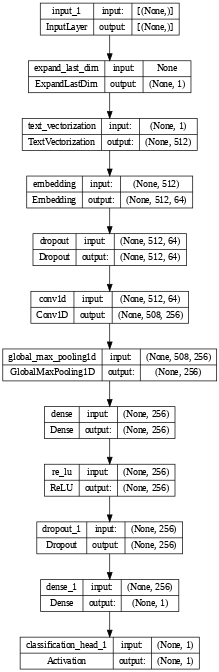

In [ ]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [ ]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [ ]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [ ]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[5.322052e-09]]
0


##### `not_targets_sample`

In [ ]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [ ]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9987092]]
1


##### `targets`

In [ ]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [ ]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 93.33%


In [ ]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [ ]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [ ]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 97.55%


In [ ]:
model_results['not_targets_train'] = true_count/len(pred)

In [ ]:
model_results['val_accuracy'] = 0.8346

#### Тестовые данные

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [ ]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [ ]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [ ]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [ ]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00019713]]
0


##### `test_not_targets_sample`

In [ ]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [ ]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9989586]]
1


##### `test_targets`

In [ ]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 71.52%


In [ ]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [ ]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 89.05%


In [ ]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [ ]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [ ]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [ ]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [ ]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00019713]]
0


##### `Headliner_test_not_targets_sample`

In [ ]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [ ]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9989586]]
1


##### `Headliner_test_targets`

In [ ]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [ ]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 51.82%


In [ ]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [ ]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [ ]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 94.12%


In [ ]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [ ]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [ ]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [ ]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [ ]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00194117]]
0


##### `Primavera_test_not_targets_sample`

In [ ]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [ ]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9999239]]
1


##### `Primavera_test_targets`

In [ ]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [ ]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 73.06%


In [ ]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [ ]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [ ]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 80.23%


In [ ]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [ ]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [ ]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [ ]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[8.7231334e-13]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [ ]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.8552532]]
1


##### `Paveletskaya_city_test_targets`

In [ ]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 83.44%


In [ ]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [ ]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.69%


In [ ]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [ ]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.24_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [ ]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.24_text_model.keras,0.933333,0.975502,0.8346,0.715217,0.890459,0.518182,0.941176,0.73057,0.802281,0.834395,0.876923


### `2023.10.25_text_model.keras`

In [ ]:
model_results = dict()

In [ ]:
model_results['model'] = '2023.10.25_text_model.keras'

#### Загрузка модели нейронной сети

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

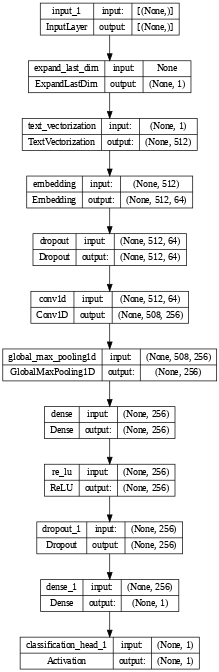

In [ ]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [ ]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [ ]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [ ]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [ ]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.2113878e-19]]
0


##### `not_targets_sample`

In [ ]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [ ]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99994856]]
1


##### `targets`

In [ ]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [ ]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 97.78%


In [ ]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [ ]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [ ]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.77%


In [ ]:
model_results['not_targets_train'] = true_count/len(pred)

In [ ]:
model_results['val_accuracy'] = 0.9974

#### Тестовые данные

In [ ]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [ ]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [ ]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [ ]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [ ]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.01173903]]
0


##### `test_not_targets_sample`

In [ ]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [ ]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99999976]]
1


##### `test_targets`

In [ ]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 82.83%


In [ ]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [ ]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 67.31%


In [ ]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [ ]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [ ]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [ ]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [ ]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.01173903]]
0


##### `Headliner_test_not_targets_sample`

In [ ]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [ ]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99999976]]
1


##### `Headliner_test_targets`

In [ ]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [ ]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 75.45%


In [ ]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [ ]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [ ]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 77.21%


In [ ]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [ ]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [ ]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [ ]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [ ]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.3810506e-13]]
0


##### `Primavera_test_not_targets_sample`

In [ ]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [ ]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Primavera_test_targets`

In [ ]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [ ]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 82.90%


In [ ]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [ ]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [ ]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 63.50%


In [ ]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [ ]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [ ]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [ ]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [ ]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [ ]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[6.084685e-22]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [ ]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9986182]]
1


##### `Paveletskaya_city_test_targets`

In [ ]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [ ]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.90%


In [ ]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [ ]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [ ]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [ ]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 53.85%


In [ ]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [ ]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.25_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [ ]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.25_text_model.keras,0.977778,0.877731,0.9974,0.828261,0.673145,0.754545,0.772059,0.829016,0.634981,0.878981,0.538462


### `2023.10.24_Headliner_text_model.keras`

In [7]:
model_results = dict()

In [8]:
model_results['model'] = '2023.10.24_Headliner_text_model.keras'

#### Загрузка модели нейронной сети

In [9]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

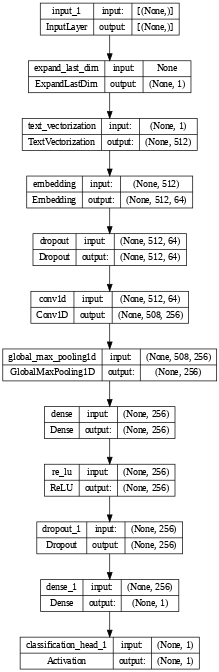

In [10]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [11]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [12]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [13]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [14]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [15]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [16]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.375426e-08]]
0


##### `not_targets_sample`

In [17]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [18]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `targets`

In [19]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [20]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [21]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 61.73%


In [22]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [23]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [24]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [25]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 94.81%


In [26]:
model_results['not_targets_train'] = true_count/len(pred)

In [27]:
model_results['val_accuracy'] = 0.8760

#### Тестовые данные

In [28]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [29]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [30]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [31]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [32]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [33]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00022785]]
0


##### `test_not_targets_sample`

In [34]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [35]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00034417]]
0


##### `test_targets`

In [36]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [37]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [38]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 52.61%


In [39]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [40]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [41]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [42]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 93.99%


In [43]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [44]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [45]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [46]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [47]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [48]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [49]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00022785]]
0


##### `Headliner_test_not_targets_sample`

In [50]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [51]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00034417]]
0


##### `Headliner_test_targets`

In [52]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [53]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [54]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 61.82%


In [55]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [56]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [57]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [58]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 94.30%


In [59]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [60]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [61]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [62]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [63]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [64]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [65]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.754817e-05]]
0


##### `Primavera_test_not_targets_sample`

In [66]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [67]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99992067]]
1


##### `Primavera_test_targets`

In [68]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [69]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [70]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 44.56%


In [71]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [72]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [73]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [74]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 91.25%


In [75]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [76]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [77]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [78]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [79]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [80]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [81]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00029482]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [82]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [83]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9941183]]
1


##### `Paveletskaya_city_test_targets`

In [84]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [85]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [86]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 56.05%


In [87]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [88]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [89]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [90]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 95.69%


In [91]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [92]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.24_Headliner_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [93]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.24_Headliner_text_model.keras,0.617344,0.948135,0.876,0.526087,0.939929,0.618182,0.943015,0.445596,0.912548,0.56051,0.956923


### `2023.10.25_Headliner_text_model.keras`

In [94]:
model_results = dict()

In [95]:
model_results['model'] = '2023.10.25_Headliner_text_model.keras'

#### Загрузка модели нейронной сети

In [96]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

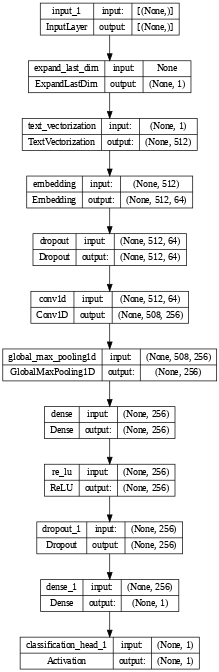

In [97]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [98]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [99]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [100]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [101]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [102]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [103]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[2.9335366e-25]]
0


##### `not_targets_sample`

In [104]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [105]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `targets`

In [106]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [107]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [108]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 65.80%


In [109]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [110]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [111]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [112]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 77.73%


In [113]:
model_results['not_targets_train'] = true_count/len(pred)

In [114]:
model_results['val_accuracy'] = 0.9984

#### Тестовые данные

In [115]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [116]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [117]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [118]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [119]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [120]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.6765825e-16]]
0


##### `test_not_targets_sample`

In [121]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [122]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `test_targets`

In [123]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [124]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [125]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 57.39%


In [126]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [127]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [128]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [129]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 67.84%


In [130]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [131]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [132]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [133]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [134]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [135]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [136]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.6765825e-16]]
0


##### `Headliner_test_not_targets_sample`

In [137]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [138]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Headliner_test_targets`

In [139]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [140]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [141]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 66.36%


In [142]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [143]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [144]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [145]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 71.69%


In [146]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [147]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [148]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [149]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [150]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [151]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [152]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.1224035e-06]]
0


##### `Primavera_test_not_targets_sample`

In [153]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [154]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Primavera_test_targets`

In [155]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [156]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [157]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 52.33%


In [158]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [159]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [160]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [161]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 75.29%


In [162]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [163]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [164]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [165]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [166]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [167]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [168]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.0210594e-13]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [169]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [170]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.48081845]]
0


##### `Paveletskaya_city_test_targets`

In [171]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [172]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [173]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 57.32%


In [174]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [175]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [176]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [177]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 55.38%


In [178]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [179]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.25_Headliner_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [180]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.25_Headliner_text_model.keras,0.657995,0.777312,0.9984,0.573913,0.678445,0.663636,0.716912,0.523316,0.752852,0.573248,0.553846


### `2023.10.24_Primavera_text_model.keras`

In [181]:
model_results = dict()

In [182]:
model_results['model'] = '2023.10.24_Primavera_text_model.keras'

#### Загрузка модели нейронной сети

In [183]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

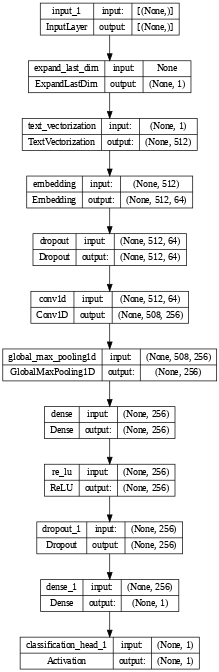

In [184]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [185]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [186]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [187]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [188]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [189]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [190]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9599265]]
1


##### `not_targets_sample`

In [191]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [192]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9998376]]
1


##### `targets`

In [193]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [194]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [195]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 83.96%


In [196]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [197]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [198]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [199]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 86.89%


In [200]:
model_results['not_targets_train'] = true_count/len(pred)

In [201]:
model_results['val_accuracy'] = 0.8005

#### Тестовые данные

In [202]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [203]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [204]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [205]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [206]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [207]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.13381736]]
0


##### `test_not_targets_sample`

In [208]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [209]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00046271]]
0


##### `test_targets`

In [210]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [211]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [212]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 74.78%


In [213]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [214]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [215]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [216]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 83.04%


In [217]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [218]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [219]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [220]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [221]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [222]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [223]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.13381736]]
0


##### `Headliner_test_not_targets_sample`

In [224]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [225]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.00046271]]
0


##### `Headliner_test_targets`

In [226]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [227]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [228]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 74.55%


In [229]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [230]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [231]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [232]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 83.82%


In [233]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [234]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [235]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [236]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [237]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [238]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [239]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.03213392]]
0


##### `Primavera_test_not_targets_sample`

In [240]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [241]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9998431]]
1


##### `Primavera_test_targets`

In [242]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [243]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [244]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 73.06%


In [245]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [246]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [247]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [248]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 80.61%


In [249]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [250]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [251]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [252]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [253]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [254]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [255]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.924955e-09]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [256]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [257]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9998526]]
1


##### `Paveletskaya_city_test_targets`

In [258]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [259]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [260]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 77.07%


In [261]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [262]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [263]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [264]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 83.69%


In [265]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [266]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.24_Primavera_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [267]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.24_Primavera_text_model.keras,0.839566,0.868903,0.8005,0.747826,0.830389,0.745455,0.838235,0.73057,0.806084,0.770701,0.836923


### `2023.10.25_Primavera_text_model.keras`

In [268]:
model_results = dict()

In [269]:
model_results['model'] = '2023.10.25_Primavera_text_model.keras'

#### Загрузка модели нейронной сети

In [270]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

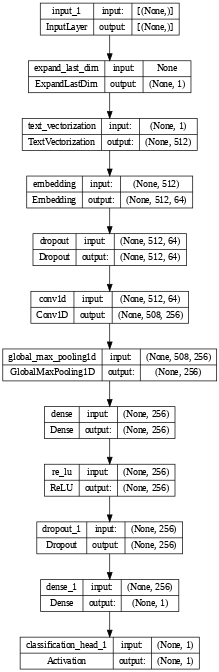

In [271]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [272]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [273]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [274]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [275]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [276]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [277]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[4.67166e-13]]
0


##### `not_targets_sample`

In [278]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [279]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.01018436]]
0


##### `targets`

In [280]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [281]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [282]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 93.22%


In [283]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [284]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [285]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [286]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 57.16%


In [287]:
model_results['not_targets_train'] = true_count/len(pred)

In [288]:
model_results['val_accuracy'] = 0.9976

#### Тестовые данные

In [289]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [290]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [291]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [292]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [293]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [294]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[2.4145817e-13]]
0


##### `test_not_targets_sample`

In [295]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [296]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.3004813e-28]]
0


##### `test_targets`

In [297]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [298]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [299]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 89.13%


In [300]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [301]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [302]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [303]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 44.61%


In [304]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [305]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [306]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [307]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [308]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [309]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [310]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[2.4145817e-13]]
0


##### `Headliner_test_not_targets_sample`

In [311]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [312]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.3004813e-28]]
0


##### `Headliner_test_targets`

In [313]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [314]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [315]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 92.73%


In [316]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [317]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [318]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [319]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 31.62%


In [320]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [321]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [322]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [323]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [324]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [325]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [326]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.808153e-08]]
0


##### `Primavera_test_not_targets_sample`

In [327]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [328]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Primavera_test_targets`

In [329]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [330]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [331]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 88.08%


In [332]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [333]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [334]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [335]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 60.46%


In [336]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [337]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [338]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [339]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [340]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [341]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [342]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[3.3025486e-30]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [343]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [344]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Paveletskaya_city_test_targets`

In [345]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [346]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [347]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.90%


In [348]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [349]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [350]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [351]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 53.54%


In [352]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [353]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.25_Primavera_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [354]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.25_Primavera_text_model.keras,0.932249,0.571618,0.9976,0.891304,0.446113,0.927273,0.316176,0.880829,0.604563,0.878981,0.535385


### `2023.10.24_Paveletskaya_city_text_model.keras`

In [355]:
model_results = dict()

In [356]:
model_results['model'] = '2023.10.24_Paveletskaya_city_text_model.keras'

#### Загрузка модели нейронной сети

In [357]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

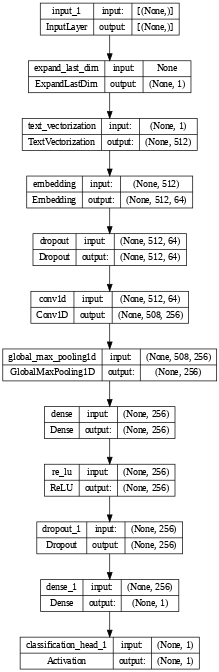

In [358]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [359]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [360]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [361]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [362]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [363]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [364]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.06663968]]
0


##### `not_targets_sample`

In [365]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [366]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99945545]]
1


##### `targets`

In [367]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [368]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [369]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 67.05%


In [370]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [371]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [372]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [373]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 93.07%


In [374]:
model_results['not_targets_train'] = true_count/len(pred)

In [375]:
model_results['val_accuracy'] = 0.8372

#### Тестовые данные

In [376]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [377]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [378]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [379]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [380]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [381]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99942195]]
1


##### `test_not_targets_sample`

In [382]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [383]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9991847]]
1


##### `test_targets`

In [384]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [385]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [386]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 59.13%


In [387]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [388]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [389]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [390]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 89.93%


In [391]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [392]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [393]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [394]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [395]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [396]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [397]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99942195]]
1


##### `Headliner_test_not_targets_sample`

In [398]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [399]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.9991847]]
1


##### `Headliner_test_targets`

In [400]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [401]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [402]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 44.55%


In [403]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [404]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [405]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [406]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 93.01%


In [407]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [408]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [409]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [410]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [411]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [412]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [413]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.5532769e-05]]
0


##### `Primavera_test_not_targets_sample`

In [414]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [415]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.99999523]]
1


##### `Primavera_test_targets`

In [416]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [417]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [418]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 54.40%


In [419]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [420]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [421]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [422]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 84.79%


In [423]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [424]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [425]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [426]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [427]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [428]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [429]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[3.2171127e-05]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [430]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [431]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.8149246]]
1


##### `Paveletskaya_city_test_targets`

In [432]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [433]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [434]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 75.16%


In [435]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [436]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [437]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [438]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 88.92%


In [439]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [440]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.24_Paveletskaya_city_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [441]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.24_Paveletskaya_city_text_model.keras,0.670461,0.9307,0.8372,0.591304,0.899293,0.445455,0.930147,0.544041,0.847909,0.751592,0.889231


### `2023.10.25_Paveletskaya_city_text_model.keras`

In [442]:
model_results = dict()

In [443]:
model_results['model'] = '2023.10.25_Paveletskaya_city_text_model.keras'

#### Загрузка модели нейронной сети

In [444]:
from tensorflow.keras.models import load_model
model = load_model(model_path + model_results['model'])

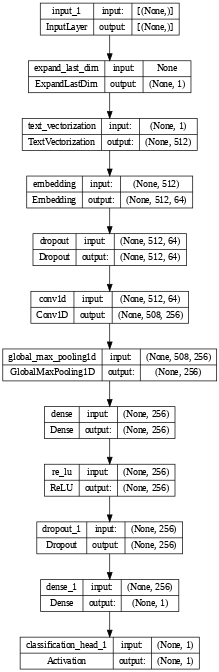

In [445]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True, dpi=50)

#### Данные, использованные в обучении нейронной сети

In [446]:
# Загрузка датафреймов
with open(df_path + 'total_targets_train_df.pkl', 'rb') as f:
  total_targets_train_df = pkl.load(f)

with open(df_path + 'total_not_targets_train_df.pkl', 'rb') as f:
  total_not_targets_train_df = pkl.load(f)

In [447]:
print(total_targets_train_df.shape)
print(total_not_targets_train_df.shape)

(1845, 79)
(4531, 79)


In [448]:
targets_sample = total_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
not_targets_sample = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].head(1).values
targets = total_targets_train_df['Текст whisper-транскрибации записи звонка'].values
not_targets = total_not_targets_train_df['Текст whisper-транскрибации записи звонка'].values

In [449]:
print(targets_sample.shape[0])
print(not_targets_sample.shape[0])
print(targets.shape[0])
print(not_targets.shape[0])

1
1
1845
4531


##### `targets_sample`

In [450]:
targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картрофт». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрофт». Татьяна, здравствуйте. Здравствуйте, Татьяна. Я Ирина. Звоню вам по квартире. Меня вот и почетно интересует. Жилом комплексе «Хэдлайнер» рассматриваете? Да. Хорошо. Соединю вас с менеджером. Минуту оставайтесь на линии. Хорошо. Твой комплекс «Хэдлайнер» внизу ответали. Здравствуйте. Здравствуйте. Здравствуйте, Наталья. Я Ирина. Звоню вам по объявлению. Вот меня интересует квартира. Однокомнатный жилой комплекс «Хэндлайнер». Да. Хорошо. Я на сайте смотрю варианты 30 квадратных метров. Сейчас у вас скидки. Вот я не пойму, просто тут написано, что вы просите. А, 17 миллионов 588. Да. Есть такой вариант. Это квартира в скромной широте дома. Сроком сдачи третьего квартала 2024 года выведешь в ключи. И конкретно вот эта квартира, она с видом на набережную Москвы-Рики. Ага. А по условиям там отделка какая-то будет в квартире? Квартира продаетс

In [451]:
pred = model.predict(targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.1181925e-11]]
0


##### `not_targets_sample`

In [452]:
not_targets_sample[0]

'Ахрилань, Нержавой комплекс, здравствуйте, Светлана. Здравствуйте, скажите, пожалуйста, автопараты КМН А-603. Ой, это вы ошибаетесь, нет-нет, вы позвонили в другую компанию, перезвоните. Угу.'

In [453]:
pred = model.predict(not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `targets`

In [454]:
targets[-1]

'Здравствуйте, Вы позвонили в компанию Эмергрупп. Пожалуйста дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Эмергрупп, меня зовут Татьяна, здравствуйте. Здравствуйте, Татьяна, вот у Вас есть ипотечный какой-то договор с банком, и сколько процентов? Господдержкой. Вас интересует покупка квартиры в комплексе Павелецкая сити, Вы поддерживаете? Да, да. Как я могу к Вам обращаться? Меня зовут Саджад. Саджад, все верно? Там СД, да, Саджад. Да, Саджад, очень приятно. Оставайтесь, пожалуйста, на линии, я соединю Вас с менеджером для консультации по комплексу. Хорошо. По окончании разговора, пожалуйста, оцените качество обслуживания. Здравствуйте, меня зовут Марина, менеджер отдела продаж Павелецкой сити, Саджад. Мне нужно знать, ипотечные кредиты, господдержка, можете помочь? Ипотека, ипотека господдержкой. Какой сам

In [455]:
pred = model.predict(targets, verbose=0)
len(pred)

1845

In [456]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")


Процент распознавания: 91.06%


In [457]:
model_results['targets_train'] = true_count/len(pred)

##### `not_targets`

In [458]:
not_targets[-1]

'Пожалуйста, дождитесь ответа нашего специалиста. Обращаем Ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, Вы соглашаетесь на обработку Ваших персональных данных. Компания Моргрупп, Александра, здравствуйте. Александра, здравствуйте. А скажите, пожалуйста, с кем можно связаться по поводу того, чтобы пропустили в квартиру меня и дизайнера? Можно какие-то пропуски заказывать, приложение какое-то левое. Это нужно в управляющую компанию обратиться. Это нужно в управляющую. Тогда подскажите, пожалуйста, какой объект у Вас? Повелетское щите, корпус ПРЭН. Так, номер телефона 8 800 500 01 69. Если они скажут, что к застройщику обратиться, тогда еще раз по этому номеру позвоните, куда сейчас обращаетесь с отделом заселения соединения Вас. Все, спасибо. Всего доброго.'

In [459]:
pred = model.predict(not_targets, verbose=0)
len(pred)

4531

In [460]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 82.03%


In [461]:
model_results['not_targets_train'] = true_count/len(pred)

In [462]:
model_results['val_accuracy'] = 0.9977

#### Тестовые данные

In [463]:
# Загрузка датафреймов
with open(df_path + 'total_targets_test_df.pkl', 'rb') as f:
  total_targets_test_df = pkl.load(f)

with open(df_path + 'total_not_targets_test_df.pkl', 'rb') as f:
  total_not_targets_test_df = pkl.load(f)

In [464]:
print(total_targets_test_df.shape)
print(total_not_targets_test_df.shape)

(460, 79)
(1132, 79)


In [465]:
test_targets_sample = total_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_not_targets_sample = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
test_targets = total_targets_test_df['Текст whisper-транскрибации записи звонка'].values
test_not_targets = total_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [466]:
print(test_targets_sample.shape[0])
print(test_not_targets_sample.shape[0])
print(test_targets.shape[0])
print(test_not_targets.shape[0])

1
1
460
1132


##### `test_targets_sample`

In [467]:
test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [468]:
pred = model.predict(test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[3.4967922e-08]]
0


##### `test_not_targets_sample`

In [469]:
test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [470]:
pred = model.predict(test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.08667685e-26]]
0


##### `test_targets`

In [471]:
test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [472]:
pred = model.predict(test_targets, verbose=0)
len(pred)

460

In [473]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 83.26%


In [474]:
model_results['targets_test'] = true_count/len(pred)

##### `test_not_targets`

In [475]:
test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [476]:
pred = model.predict(test_not_targets, verbose=0)
len(pred)

1132

In [477]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 73.94%


In [478]:
model_results['not_targets_test'] = true_count/len(pred)

#### Тестовые данные Headliner

In [479]:
# Загрузка датафреймов
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

In [480]:
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)

(110, 79)
(544, 79)


In [481]:
Headliner_test_targets_sample = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_not_targets_sample = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Headliner_test_targets = Headliner_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Headliner_test_not_targets = Headliner_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [482]:
print(Headliner_test_targets_sample.shape[0])
print(Headliner_test_not_targets_sample.shape[0])
print(Headliner_test_targets.shape[0])
print(Headliner_test_not_targets.shape[0])

1
1
110
544


##### `Headliner_test_targets_sample`

In [483]:
Headliner_test_targets_sample[0]

'Вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день. Группа компании «Картрос». Лилия. ЖК «Хэдлайнер». Здравствуйте. «Хэдлайнер», да, ЖК? Я бы хотела знать, что узнать. А у вас есть возможность показать готовые квартиры хотя бы? Или у вас еще вообще все на уровне только застройки? Нет, у нас есть уже сданные корпуса. Давайте я вас соединю с менеджером отдела продаж. Там шоурум есть, где посмотреть. Отлично, хорошо, давайте, соединяемся. Подскажите, как вас зовут? Динара. Я вас соединяю с менеджером. Отдай минуту. Динара, добрый день. Меня зовут Алена, менеджер проекта «Хэдлайнер». Чем могу вам помочь? Здравствуйте. А я могу сейчас подъехать к вам, и вы мне все покажете, что есть у вас? Да, вы можете приехать в офис продаж, Шмидтовский проезд, 39, корпус 1. А вы можете мне геолокацию скинуть на WhatsApp, на этот номер? Я просто сейчас уже буду выезжать, и там где какая парковка? Там на улице можно встать, правильно? Я 

In [484]:
pred = model.predict(Headliner_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[3.4967922e-08]]
0


##### `Headliner_test_not_targets_sample`

In [485]:
Headliner_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в группу компании «Картроф». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картроф». Меня зовут Любовь. Здравствуйте, Любовь. Меня зовут Татьяна. У меня уникальный клиент. Я бы хотела пообщаться с менеджером, которого вы прикрепили, но не могу дозвониться, у него абонент недоступен. Какой менеджер? Что за фамилия? Ванда Даев. Прикрепили этого. Так. Хорошо. Соединяю вас, Татьяна, с отделом продаж. Сейчас любой свободный менеджер пройти ситуацию. Оставайтесь на линии. Благодарю. Спасибо. Татьяна, добрый день. Меня зовут Антон. Слушаю вас. Чем могу помочь? Добрый день. Уникального клиента. Клиент уникальный. Хочу уточнить по квартире. У нас бюджет 20 миллионов. Ну, плюс-минус там 2 миллиона, да? Да. Нужна готовая квартира, но пойти ипотеки. Уже в готовом построенном доме? Да. Такое возможно? Нужно... Уточнить будет у отдела ипотеки. По готовым домам возможно пойти ипотеку или нет. Вот у нас осталась одна квартир

In [486]:
pred = model.predict(Headliner_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.08667685e-26]]
0


##### `Headliner_test_targets`

In [487]:
Headliner_test_targets[-1]

'Здравствуйте, вы позвонили в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Группа компании «Картрос». Татьяна, здравствуйте. Здравствуйте. Хочу купить квартиру в второй очереди в «Добаве мира». Хорошо, соединю вас с менеджером. Вас Михаил зовут, все верно? Все верно. Хорошо, минуту. Оставайтесь на линии. Михаил, добрый день. Антон, слушаю вас. Антон, добрый день. Я хотел уточнить по второй очереди. Я там уже рассмотрел. Там небольшие объекты, 40 квадратных метров. Мы говорим про вторую очередь, которая у нас уже построена. Там сейчас самая минимальная площадь. Это полноценная однокомнатная квартира. 43 метра на 19 этаже. С видом во двор и на реку. В том числе у нее цена идет 22 миллиона. Ясно. Но уж данный объект по семейной ипотеке мы проходим здесь, да? Слушайте, нужно будет уточнить. По-моему, действия программы такая. Надо подточнить. Там ДКП продает от собственника. А, нет. С визуальства точно. От застройщика. Там господдержка пройде

In [488]:
pred = model.predict(Headliner_test_targets, verbose=0)
len(pred)

110

In [489]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 65.45%


In [490]:
model_results['targets_test_Headliner'] = true_count/len(pred)

##### `Headliner_test_not_targets`

In [491]:
Headliner_test_not_targets[-1]

'Здравствуйте, вы по званию в группу компании «Картрос». Благодарим вас за звонок. Пожалуйста, дождитесь ответа оператора. Добрый день, группа компании «Картрос», Лилия. ЖК-проводник. Здравствуйте. Да, доброе... как у вас утро? Доброе утро, Лилия. У меня вот такой вопрос. Вчера был потерян ежедневник черный в восьмом корпусе. Никто там не находил, не передавали вниз к администраторам там, на пятнадцатом этаже. Я администрации не владею, я работаю на удаленке, меня там не отдают. Я не могу вам ответить на эти вопросы. Хорошо, я поняла, Лилия. А вы не подскажете номер телефона девочек, которые сидят внизу, там администратором работают? Нет, у меня нет. Это только внутренний номер менеджеров. Не могу вам подсказать совершенно. Так, а что там? Менеджеры отдела продаж. Я работаю в отделе продаж. Продаж, да. Менеджеры телефона, менеджеров отдела продаж. Не знаю, там, управляющая компания, могу телефон дать. Больше у меня контактов нет. Так, ну управляющая компания, тогда можно. Я просто в Ку

In [492]:
pred = model.predict(Headliner_test_not_targets, verbose=0)
len(pred)

544

In [493]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 76.10%


In [494]:
model_results['not_targets_test_Headliner'] = true_count/len(pred)

#### Тестовые данные Primavera

In [495]:
# Загрузка датафреймов
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [496]:
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)

(193, 79)
(263, 79)


In [497]:
Primavera_test_targets_sample = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_not_targets_sample = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Primavera_test_targets = Primavera_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Primavera_test_not_targets = Primavera_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [498]:
print(Primavera_test_targets_sample.shape[0])
print(Primavera_test_not_targets_sample.shape[0])
print(Primavera_test_targets.shape[0])
print(Primavera_test_not_targets.shape[0])

1
1
193
263


##### `Primavera_test_targets_sample`

In [499]:
Primavera_test_targets_sample[0]

'Клуб на городской реке Примавер, меня зовут Наталья, здрасте. Алло, здрасте, она меня зовут Альберт, я разрешу покупку квартиры в вашем зоном комплексе. Альберт, я вас соединю с менеджером отдела продаж для консультации, ранее с кем-нибудь общались из наших менеджеров? Еще раз. Ранее с кем-нибудь общались из наших менеджеров? Или с элитниками? Нет, не общался. Спасибо, оставайтесь пожалуйста на линии, я соединяюсь с менеджером. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Альберт, добрый день, меня зовут Юлия, менеджер проекта Клубный город на реке Примавер. Можно вас попросить, чем могу быть полезна? Здравствуйте, а интересует покупка недвижимости от квартиры? Хотел бы узнать, по площадям какие у вас есть. Интересует двухкомнатная. Я поняла вас. Две очереди у нас строительство. Первая очередь ключи середины следующего года, вторая очередь середины 2025 года. Вам как, поближе по срокам? Поближе, конечно. Тогда если поближе, смотрим квартал Р

In [500]:
pred = model.predict(Primavera_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.]]
0


##### `Primavera_test_not_targets_sample`

In [501]:
Primavera_test_not_targets_sample[0]

'В данный момент мы не можем ответить на ваш звонок. Перезвоните позже, и мы ответим на...'

In [502]:
pred = model.predict(Primavera_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[1.]]
1


##### `Primavera_test_targets`

In [503]:
Primavera_test_targets[-1]

'Клубно-город на реке Примаваре, меня зовут Ольга, здравствуйте. Ольга, здравствуйте. Подскажите, у вас офис вообще работает, нет? Да, работает. Я сейчас вас соединю с офисом продаж. Как я могу к вам обращаться? Константин. Очень приятно. Вы к нам первый раз обращаетесь? Да. Спасибо, соединяю, до минуты. Обращаем ваше внимание, что в целях контроля качества услуг разговор может быть записан. Примаваре, клубно-город на реке, меня Владимир зовут. Здравствуйте, Константин. Чем могу быть полезен? Подскажите, а вы вообще офис работает или у вас там обед? Да. Вы там на новом офисе продаж, да, ближе к столице? Да. Мы туда скоро будем переезжать, Константин. А сейчас время носит у нас на адресе Волоколамская, 61,1. Могу координаты оставить вам, чтобы вы доехали. Подскажите, коммерческие могут быть помещения, нет? У нас коммерция вся продана. Остался только большой ресторан. Большое помещение, там 600 метров. А вас только в Примаваре интересует коммерция? Или в целом в этом районе? Ну, может бы

In [504]:
pred = model.predict(Primavera_test_targets, verbose=0)
len(pred)

193

In [505]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 87.05%


In [506]:
model_results['targets_test_Primavera'] = true_count/len(pred)

##### `Primavera_test_not_targets`

In [507]:
Primavera_test_not_targets[-1]

'Город на реке Псимовэрн. Меня зовут Светлана. Здравствуйте. Пока что абонент разговаривает, но я передам ему ваш ответ. У вас к нему срочный вопрос?'

In [508]:
pred = model.predict(Primavera_test_not_targets, verbose=0)
len(pred)

263

In [509]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 63.12%


In [510]:
model_results['not_targets_test_Primavera'] = true_count/len(pred)

#### Тестовые данные Paveletskaya_city

In [511]:
# Загрузка датафреймов
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

In [512]:
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(157, 79)
(325, 79)


In [513]:
Paveletskaya_city_test_targets_sample = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_not_targets_sample = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].head(1).values
Paveletskaya_city_test_targets = Paveletskaya_city_targets_test_df['Текст whisper-транскрибации записи звонка'].values
Paveletskaya_city_test_not_targets = Paveletskaya_city_not_targets_test_df['Текст whisper-транскрибации записи звонка'].values

In [514]:
print(Paveletskaya_city_test_targets_sample.shape[0])
print(Paveletskaya_city_test_not_targets_sample.shape[0])
print(Paveletskaya_city_test_targets.shape[0])
print(Paveletskaya_city_test_not_targets.shape[0])

1
1
157
325


##### `Paveletskaya_city_test_targets_sample`

In [515]:
Paveletskaya_city_test_targets_sample[0]

'Компания МР Групп, меня зовут Татьяна, здравствуйте. Какая компания? Компания МР Групп. Угу. А, вы насчет квартиры? Рассматриваете жилой комплекс Павелецкая Сити? Да. Как я могу к вам обращаться? Иван. Очень приятно. Иван интересует покупку квартиры в комплексе Павелецкая Сити? Да. Оставайтесь, пожалуйста, на линии. Соединю вас с менеджером для консультации по комплексу. По окончании разговора, пожалуйста, оцените качество обслуживания. Иван, здравствуйте. Жилой комплекс Павелецкая Сити. Меня зовут Сергей. Вы передали, что вас заинтересовал проект, верно? Да. Скажите, по локации что-то знаете по срокам сдачи? Или еще не успели ознакомиться? Не успели ознакомиться. Но нам готовы студию какую-нибудь или одна комната, чтобы сейчас заехать. Угу. Вас понял. У нас есть готовые квартиры. Метраж у них от 41 до 43 квадратных метров. Вариантов осталось всего 4. И квартиры идут с начальным вариантом отделки. То есть там все черновые работы выполнены. Вам останется только финишный ремонт. Здесь н

In [516]:
pred = model.predict(Paveletskaya_city_test_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.]]
0


##### `Paveletskaya_city_test_not_targets_sample`

In [517]:
Paveletskaya_city_test_not_targets_sample[0]

'Здравствуйте! Вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных.'

In [518]:
pred = model.predict(Paveletskaya_city_test_not_targets_sample, verbose=0)
print(pred)
print(round(pred[0][0]))

[[0.75761884]]
1


##### `Paveletskaya_city_test_targets`

In [519]:
Paveletskaya_city_test_targets[-1]

'Здравствуйте, вы позвонили в компанию Эмергрупп. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества обслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания Эмергрупп, меня зовут Лариса, здравствуйте. Здравствуйте, Лариса, подскажите, пожалуйста, о ЖКТ Вильярдская Сити есть ли квартиры, которые можно посмотреть сегодня? Я вас сейчас переключу на менеджера Павелевской Сити, более подробно он расскажет. Как вас зовут? Кристина. Вы рассматриваете Кристину для себя или представляете агентство недвижимости? Нет, для себя. Благодарю, минуту. До встречи. По окончании разговора, пожалуйста, оцените качество обслуживания. Спасибо. Кристина, добрый день, меня зовут Дарья, менеджер в проекте Павелевской Сити. Чем могу быть вам полезна? Здравствуйте, Дарья, скажите, пожалуйста, есть ли возможность посмотреть квартиры сегодня в каком-либо из данных корпусов? Я так пони

In [520]:
pred = model.predict(Paveletskaya_city_test_targets, verbose=0)
len(pred)

157

In [521]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if not round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 91.08%


In [522]:
model_results['targets_test_Paveletskaya_city'] = true_count/len(pred)

##### `Paveletskaya_city_test_not_targets`



In [523]:
Paveletskaya_city_test_not_targets[-1]

'Здравствуйте! Вы позвонили в компанию MR Group. Пожалуйста, дождитесь ответа нашего специалиста. Обращаем ваше внимание, что в целях улучшения качества отслуживания клиентов все разговоры записываются. Продолжая разговор, вы соглашаетесь на обработку ваших персональных данных. Компания MR Group, меня зовут Лариса, здравствуйте. Здравствуйте, а оцените, пожалуйста, свой самопродаж по Велесской Сити. Хорошо, соединяю. Как вас зовут? Андрей. Андрей, вас интересует приобретение или вы уже приобрели? Нет, меня интересует приобретение, хотел посмотреть. Хорошо, минуту. По окончании разговора, пожалуйста, оцените качество отслуживания. Андрей, добрый вечер. Меня зовут Алена, я подражат Велесской Сити. Чем бы вы хотели? Здравствуйте, Алена. Я рядом с вами нахожусь, хотел бы подъехать поговорить, посмотреть. Да, конечно, приезжайте. Я уже здесь, на пройде, не знаю, я стою напротив комплекса, где у вас офис продаж. Там у вас какое-то заселение есть? Если вы едете от центра, от Садова, чуть-чуть

In [524]:
pred = model.predict(Paveletskaya_city_test_not_targets, verbose=0)
len(pred)

325

In [525]:
# Считаем процент распознавания
true_count = 0
for i in range(len(pred)):
  if round(pred[i][0]): true_count += 1
print(f"Процент распознавания: {true_count/len(pred):.2%}")

Процент распознавания: 79.08%


In [526]:
model_results['not_targets_test_Paveletskaya_city'] = true_count/len(pred)

#### Датафрейм с результатами тестирования модели

In [527]:
# Сохраняем model_results в pkl
with open(model_path + '2023.10.25_Paveletskaya_city_text_model_results.pkl', 'wb') as f:
  pkl.dump(model_results, f)

In [528]:
pd.DataFrame([model_results])

,model,targets_train,not_targets_train,val_accuracy,targets_test,not_targets_test,targets_test_Headliner,not_targets_test_Headliner,targets_test_Primavera,not_targets_test_Primavera,targets_test_Paveletskaya_city,not_targets_test_Paveletskaya_city
0,2023.10.25_Paveletskaya_city_text_model.keras,0.910569,0.820349,0.9977,0.832609,0.739399,0.654545,0.761029,0.870466,0.631179,0.910828,0.790769
